## **Problem Statement**
Lending platforms face significant credit risk when issuing loans to borrowers. Without an effective risk assessment system, the company may experience financial losses due to high default rates. The dataset shows loans with "Charged Off" status that need to be anticipated from the outset to minimize portfolio risk.

## **Goal**
Develop a predictive model that can identify borrower default risk and classify them into risk tiers to support better lending decisions and optimize portfolio performance.

## **Objectives**

1. Understand the distribution and characteristics of borrowers, identify patterns and factors correlated with default risk, and analyze relationships between key variables such as income, DTI, credit history, and loan amount.

2. Build a predictive model to estimate default probability, perform feature engineering and selection, compare multiple algorithms, and optimize model performance through hyperparameter tuning.

3. Convert probability scores into actionable risk tiers with optimal thresholds based on risk appetite, and provide recommendations for each tier such as auto-approve, manual review, or reject.

4. Calculate potential loss rate reduction using the model, provide actionable insights for portfolio management, and create visualizations for ongoing risk monitoring.

## **0. Setup**

In [ ]:
# Core
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from matplotlib.patches import Patch

# Statistics
from scipy.stats import chi2_contingency

# Google Colab (jika diperlukan)
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -q -O Poppins-Regular.ttf https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Regular.ttf
!wget -q -O Poppins-Bold.ttf https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Bold.ttf

fm.fontManager.addfont("Poppins-Regular.ttf")
fm.fontManager.addfont("Poppins-Bold.ttf")

mpl.rcParams['font.family'] = "Poppins"
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlecolor'] = '#808080'
mpl.rcParams['axes.labelcolor'] = '#808080'
mpl.rcParams['xtick.color'] = '#808080'
mpl.rcParams['ytick.color'] = '#808080'
mpl.rcParams['axes.edgecolor'] = '#808080'
mpl.rcParams['legend.labelcolor'] = '#808080'

mpl.rcParams['boxplot.boxprops.color'] = '#808080'
mpl.rcParams['boxplot.capprops.color'] = '#808080'
mpl.rcParams['boxplot.whiskerprops.color'] = '#808080'
mpl.rcParams['boxplot.medianprops.color'] = '#808080'
mpl.rcParams['boxplot.flierprops.color'] = '#808080'
mpl.rcParams['boxplot.meanprops.color'] = '#808080'

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.width', None)

## **1. Data Loading**

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Rakamin/PBI/PBI November 2025/Dataset/loan_data_2007_2014.csv")
display(df.head())

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                                    url  \
0  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## **2. Exploratory Data Analysis**

### **2.0. Seasonality Anaysis**

In [ ]:
# Categorize loan outcomes
default_status = ['Charged Off', 'Default', 'Late (31-120 days)']
non_default_status = ['Fully Paid', 'Current']

df_risk = df[df['loan_status'].isin(default_status + non_default_status)].copy()
df_risk['is_default'] = df_risk['loan_status'].isin(default_status).astype(int)

In [ ]:
# Extract date components
df_risk['issue_d'] = pd.to_datetime(df_risk['issue_d'], format='%b-%y')

df_risk['issue_year'] = df_risk['issue_d'].dt.year
df_risk['issue_month'] = df_risk['issue_d'].dt.month
df_risk['issue_quarter'] = df_risk['issue_d'].dt.quarter
df_risk['issue_month_name'] = df_risk['issue_d'].dt.strftime('%b')

DEFAULT RATE BY MONTH


total_defaults  total_loans  default_rate  total_amount  \
issue_month                                                            
1                      3338        27241        0.1225     393487625   
2                      3324        27557        0.1206     408412875   
3                      3516        30138        0.1167     438259050   
4                      4038        34225        0.1180     488531175   
5                      4259        35524        0.1199     501125025   
6                      4188        34788        0.1204     492451075   
7                      5259        48810        0.1077     692783400   
8                      4363        40071        0.1089     565051875   
9                      3806        33049        0.1152     461634625   
10                     5816        62507        0.0930     895573150   
11                     4682        49772        0.0941     717660775   
12                     3618        35490        0.1019     526125725   

             default_rate_pct  
issue_month                    
1                       12.25  
2                       12.06  
3                       11.67  
4                       11.80  
5                       11.99  
6                       12.04  
7                       10.77  
8                       10.89  
9                       11.52  
10                       9.30  
11                       9.41  
12                      10.19

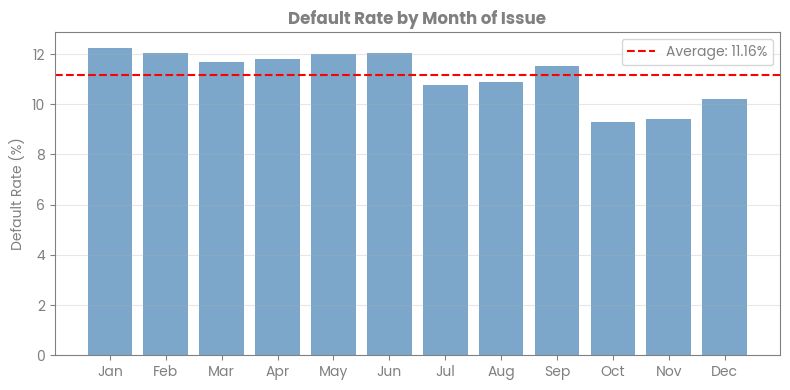

In [ ]:
# Analyze monthly performance
monthly_analysis = df_risk.groupby('issue_month').agg({
    'is_default': ['sum', 'count', 'mean'],
    'loan_amnt': 'sum'
}).round(4)

monthly_analysis.columns = ['total_defaults', 'total_loans', 'default_rate', 'total_amount']
monthly_analysis['default_rate_pct'] = (monthly_analysis['default_rate'] * 100).round(2)

print("DEFAULT RATE BY MONTH")
display(monthly_analysis)

plt.figure(figsize=(8, 4))

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_plot = df_risk.groupby('issue_month_name')['is_default'].mean() * 100
monthly_plot = monthly_plot.reindex(month_order)

plt.bar(range(12), monthly_plot.values, color='steelblue', alpha=0.7)
plt.xticks(range(12), month_order)
plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Month of Issue', fontweight='bold')
plt.axhline(y=monthly_plot.mean(), color='red', linestyle='--', label=f'Average: {monthly_plot.mean():.2f}%')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

DEFAULT RATE BY QUARTER


total_defaults  total_loans  default_rate  total_amount  \
issue_quarter                                                            
1                       10178        84936        0.1198    1240159550   
2                       12485       104537        0.1194    1482107275   
3                       13428       121930        0.1101    1719469900   
4                       14116       147769        0.0955    2139359650   

               default_rate_pct  
issue_quarter                    
1                         11.98  
2                         11.94  
3                         11.01  
4                          9.55

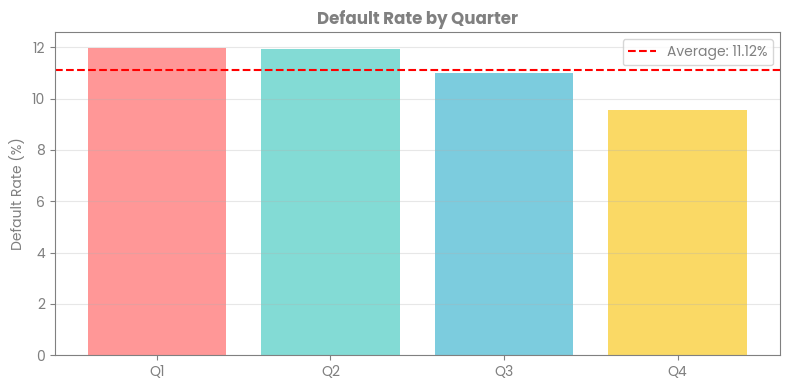

In [ ]:
# Analyze quarterly performance
quarterly_analysis = df_risk.groupby('issue_quarter').agg({
    'is_default': ['sum', 'count', 'mean'],
    'loan_amnt': 'sum'
}).round(4)

quarterly_analysis.columns = ['total_defaults', 'total_loans', 'default_rate', 'total_amount']
quarterly_analysis['default_rate_pct'] = (quarterly_analysis['default_rate'] * 100).round(2)

print("DEFAULT RATE BY QUARTER")
display(quarterly_analysis)

plt.figure(figsize=(8, 4))

quarterly_plot = df_risk.groupby('issue_quarter')['is_default'].mean() * 100
plt.bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_plot.values,color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24'], alpha=0.7)

plt.ylabel('Default Rate (%)')
plt.title('Default Rate by Quarter', fontweight='bold')
plt.axhline(y=quarterly_plot.mean(), color='red', linestyle='--', label=f'Average: {quarterly_plot.mean():.2f}%')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

YEAR-OVER-YEAR MONTHLY COMPARISON


defaults  loans  default_rate  default_rate_pct
issue_year issue_month                                                 
2007       6                   0      1        0.0000              0.00
           7                   0     30        0.0000              0.00
           8                   7     33        0.2121             21.21
           9                   3     18        0.1667             16.67
           10                 10     47        0.2128             21.28
           11                  7     37        0.1892             18.92
           12                 18     85        0.2118             21.18
2008       1                  31    171        0.1813             18.13
           2                  25    174        0.1437             14.37
           3                  40    236        0.1695             16.95
           4                  27    155        0.1742             17.42
           5                  10     71        0.1408             14.08
           6                   7     66        0.1061             10.61
           7                  17     83        0.2048             20.48
           8                   6     71        0.0845              8.45
           9                   5     32        0.1562             15.62
           10                 15     96        0.1562             15.62
           11                 31    184        0.1685             16.85
           12                 33    223        0.1480             14.80
2009       1                  28    239        0.1172             11.72
           2                  34    260        0.1308             13.08
           3                  31    276        0.1123             11.23
           4                  40    290        0.1379             13.79
           5                  42    319        0.1317             13.17
           6                  43    356        0.1208             12.08
           7                  47    374        0.1257             12.57
           8                  40    408        0.0980              9.80
           9                  57    449        0.1269             12.69
           10                 87    545        0.1596             15.96
           11                 83    602        0.1379             13.79
           12                 62    598        0.1037             10.37
2010       1                  76    589        0.1290             12.90
           2                  63    627        0.1005             10.05
           3                  69    737        0.0936              9.36
           4                  82    827        0.0992              9.92
           5                 125    920        0.1359             13.59
           6                 166   1029        0.1613             16.13
           7                 137   1119        0.1224             12.24
           8                 148   1078        0.1373             13.73
           9                 176   1087        0.1619             16.19
           10                162   1133        0.1430             14.30
           11                142   1121        0.1267             12.67
           12                143   1267        0.1129             11.29
2011       1                 186   1369        0.1359             13.59
           2                 169   1297        0.1303             13.03
           3                 210   1445        0.1453             14.53
           4                 221   1562        0.1415             14.15
           5                 289   1702        0.1698             16.98
           6                 268   1831        0.1464             14.64
           7                 277   1873        0.1479             14.79
           8                 270   1933        0.1397             13.97
           9                 306   2065        0.1482             14.82
           10                309   2114        0.1462             14.62
           11                334   2229        0.1498           

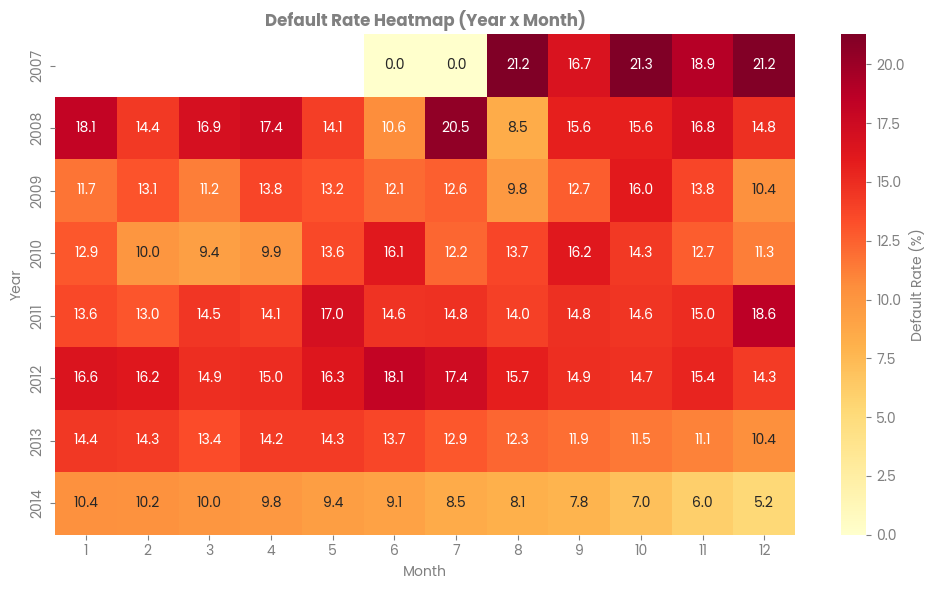

In [ ]:
# Compare monthly performance by year
yearly_monthly = df_risk.groupby(['issue_year', 'issue_month']).agg({
    'is_default': ['sum', 'count', 'mean']
}).round(4)

yearly_monthly.columns = ['defaults', 'loans', 'default_rate']
yearly_monthly['default_rate_pct'] = (yearly_monthly['default_rate'] * 100).round(2)

print("YEAR-OVER-YEAR MONTHLY COMPARISON")
display(yearly_monthly)

plt.figure(figsize=(10, 6))

pivot_default = df_risk.pivot_table(values='is_default', index='issue_year', columns='issue_month', aggfunc='mean') * 100
sns.heatmap(pivot_default, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Default Rate (%)'})

plt.title('Default Rate Heatmap (Year x Month)', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')

plt.tight_layout()
plt.show()

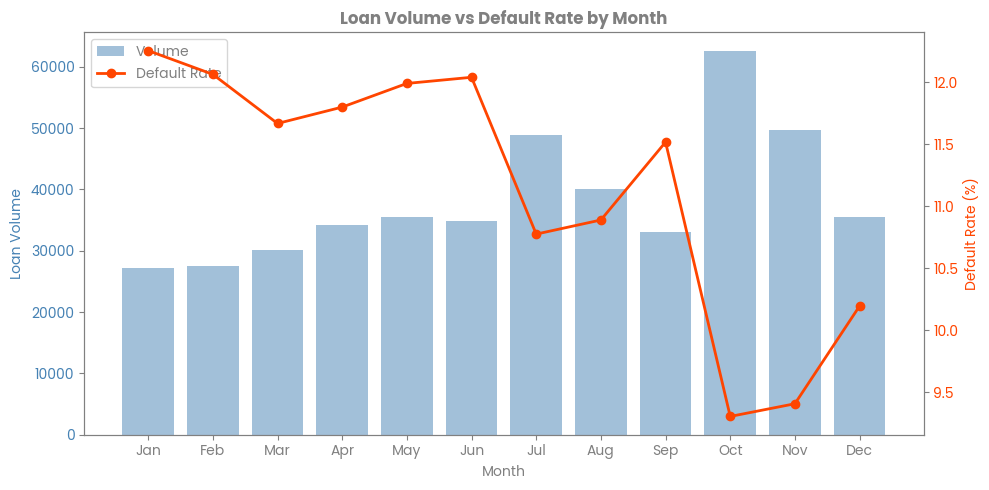

In [ ]:
# Volume & Default Rate by Month
plt.figure(figsize=(10, 5))
volume_by_month = df_risk.groupby('issue_month_name').size().reindex(month_order)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.bar(range(12), volume_by_month.values, color='steelblue', alpha=0.5, label='Volume')
ax1.set_xlabel('Month')
ax1.set_ylabel('Loan Volume', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_order)

ax2.plot(range(12), monthly_plot.values, color='orangered', marker='o', linewidth=2, label='Default Rate')
ax2.set_ylabel('Default Rate (%)', color='orangered')
ax2.tick_params(axis='y', labelcolor='orangered')

plt.title('Loan Volume vs Default Rate by Month', fontweight='bold')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Test seasonal significance
contingency_month = pd.crosstab(df_risk['issue_month'], df_risk['is_default'])
chi2_month, p_value_month, dof_month, expected_month = chi2_contingency(contingency_month)

contingency_quarter = pd.crosstab(df_risk['issue_quarter'], df_risk['is_default'])
chi2_quarter, p_value_quarter, dof_quarter, expected_quarter = chi2_contingency(contingency_quarter)

print("STATISTICAL SIGNIFICANCE TEST")
print(f"\nChi-Square Test - Monthly Seasonality:")
print(f"  Chi-Square Statistic: {chi2_month:.4f}")
print(f"  P-value: {p_value_month:.6f}")
print(f"  Result: {'Significant seasonality detected' if p_value_month < 0.05 else 'No significant seasonality'}")

print(f"\nChi-Square Test - Quarterly Seasonality:")
print(f"  Chi-Square Statistic: {chi2_quarter:.4f}")
print(f"  P-value: {p_value_quarter:.6f}")
print(f"  Result: {'Significant seasonality detected' if p_value_quarter < 0.05 else 'No significant seasonality'}")

STATISTICAL SIGNIFICANCE TEST

Chi-Square Test - Monthly Seasonality:
  Chi-Square Statistic: 534.1786
  P-value: 0.000000
  Result: Significant seasonality detected

Chi-Square Test - Quarterly Seasonality:
  Chi-Square Statistic: 495.5770
  P-value: 0.000000
  Result: Significant seasonality detected


In [ ]:
# Cohort analysis
print("COHORT ANALYSIS BY YEAR")

cohort_analysis = df_risk.groupby('issue_year').agg({
    'loan_amnt': ['sum', 'mean', 'count'],
    'is_default': ['sum', 'mean'],
    'int_rate': 'mean'
}).round(2)

cohort_analysis.columns = ['total_amount', 'avg_loan', 'total_loans', 'total_defaults', 'default_rate', 'avg_int_rate']
cohort_analysis['default_rate_pct'] = (cohort_analysis['default_rate'] * 100).round(2)
display(cohort_analysis)

COHORT ANALYSIS BY YEAR


total_amount  avg_loan  total_loans  total_defaults  default_rate  \
issue_year                                                                      
2007             2219275   8841.73          251              45          0.18   
2008            14390275   9212.72         1562             247          0.16   
2009            46436325   9846.55         4716             594          0.13   
2010           122094200  10585.59        11534            1489          0.13   
2011           261064525  12040.61        21682            3259          0.15   
2012           716026975  13444.75        53257            8334          0.16   
2013          1961288700  14695.92       133458           16798          0.13   
2014          3457576100  14857.75       232712           19441          0.08   

            avg_int_rate  default_rate_pct  
issue_year                                  
2007               10.32              18.0  
2008               11.16              16.0  
2009               12.19              13.0  
2010               11.75              13.0  
2011               12.22              15.0  
2012               13.63              16.0  
2013               14.51              13.0  
2014               13.75               8.0

#### **Seasonal Pattern Overview**

Our analysis reveals a distinct seasonal pattern in default rates across the year. The data shows a 2.95 percentage point variance between the highest and lowest months, representing a 24% relative difference in default risk. This pattern is statistically robust and consistent across multiple years of loan origination data.

#### **High-Risk Period (Q1-Q2)**

The highest risk period occurs during Q1-Q2 (January through June), where default rates range from 11.67% to 12.25%. January shows the peak default rate at 12.25%, likely driven by post-holiday spending strain and elevated debt-to-income ratios from year-end credit usage. This six-month period accounts for nearly half the calendar year but carries consistently elevated risk.

#### **Low-Risk Period (Q4)**

In contrast, Q4 demonstrates significantly lower default rates, ranging from 9.30% to 10.19%. October presents the lowest risk at 9.30%, followed closely by November at 9.41%. This 2.43 percentage point improvement compared to Q1 represents a 20% reduction in default probability, likely attributable to year-end employment stability, holiday bonuses, and improved borrower liquidity.

#### **Quarterly Dynamics**

The quarterly analysis reinforces this pattern with clear differentiation. Q1 and Q2 show nearly identical elevated rates (11.98% and 11.94% respectively), while Q3 begins to improve (11.01%), and Q4 delivers the strongest performance (9.55%). Despite Q4 having the highest loan volume (147,769 loans), it maintains the lowest default rate, indicating genuine risk reduction rather than volume-driven statistical noise.

#### **Statistical Validation**

This seasonality pattern has been validated through chi-square testing for both monthly (p < 0.001) and quarterly (p < 0.001) aggregations, confirming that the observed differences are highly statistically significant and not due to random variation.

#### Business Recommendations

1. **Dynamic Risk Pricing**
    * Q1-Q2 (High Risk):  Base Rate + 0.50% - 0.75%
    * Q3 (Moderate):      Base Rate + 0.25%
    * Q4 (Low Risk):      Base Rate (competitive)

2. **Seasonal Approval Strategy**
    * Q1-Q2: Increase minimum income requirement by 10%
    * Q3: Normal approval criteria
    * Q4: Focus on Grades A-B expansion


### **2.1. Portfolio Composition Analysis**

In [ ]:
print("BASIC PORTFOLIO STATISTICS")

# Convert issue_d to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Basic portfolio stats
print(f"Total Loans: {len(df):,}")
print(f"Total Loan Amount: ${df['loan_amnt'].sum():,.2f}")
print(f"Average Loan Amount: ${df['loan_amnt'].mean():,.2f}")
print(f"Median Loan Amount: ${df['loan_amnt'].median():,.2f}")
print(f"Date Range: {df['issue_d'].min().strftime('%B %Y')} to {df['issue_d'].max().strftime('%B %Y')}")

BASIC PORTFOLIO STATISTICS
Total Loans: 466,285
Total Loan Amount: $6,675,931,775.00
Average Loan Amount: $14,317.28
Median Loan Amount: $12,000.00
Date Range: June 2007 to December 2014


LOAN STATUS DISTRIBUTION
                                                      Count  Percentage
loan_status                                                            
Charged Off                                           42475        9.11
Current                                              224226       48.09
Default                                                 832        0.18
Does not meet the credit policy. Status:Charged Off     761        0.16
Does not meet the credit policy. Status:Fully Paid     1988        0.43
Fully Paid                                           184739       39.62
In Grace Period                                        3146        0.67
Late (16-30 days)                                      1218        0.26
Late (31-120 days)                                     6900        1.48





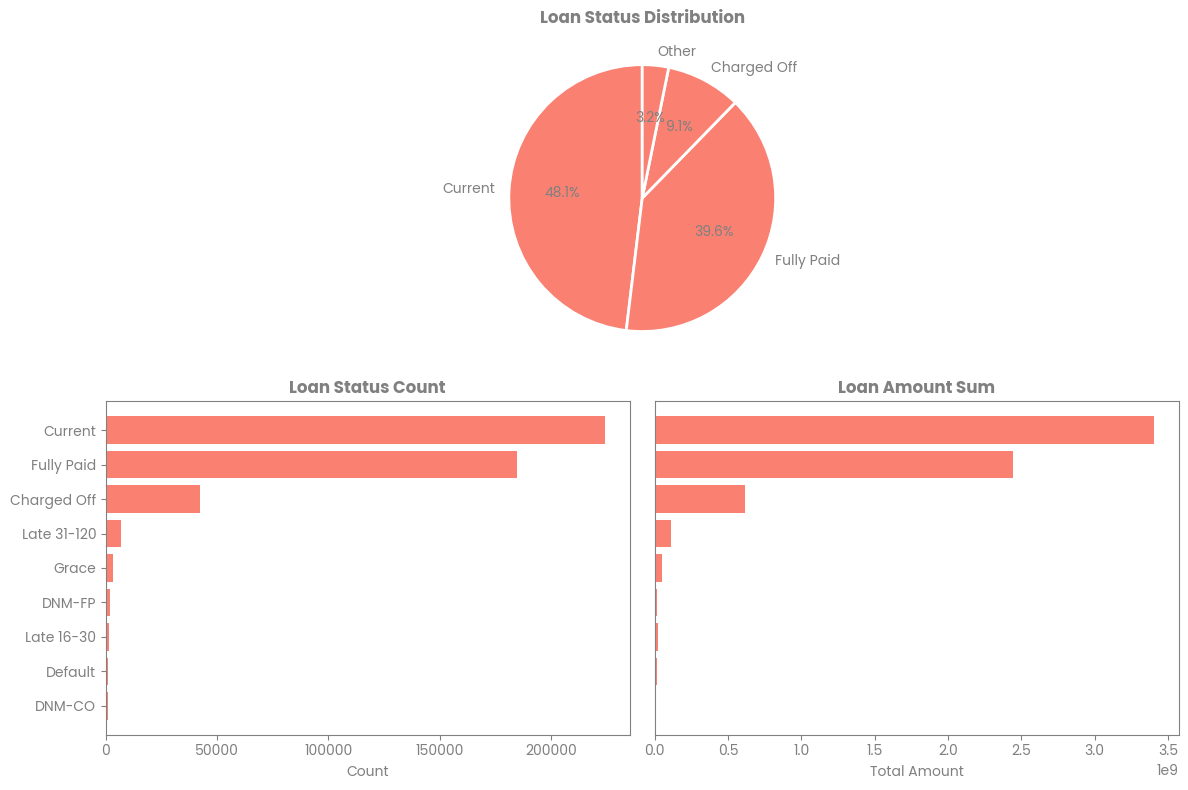

In [ ]:
# LOAN STATUS ANALYSIS
print("LOAN STATUS DISTRIBUTION")

# Status counts
short_map = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off',
    'Current': 'Current',
    'Default': 'Default',
    'Late (31-120 days)': 'Late 31-120',
    'Late (16-30 days)': 'Late 16-30',
    'In Grace Period': 'Grace',
    'Does not meet the credit policy. Status:Fully Paid': 'DNM-FP',
    'Does not meet the credit policy. Status:Charged Off': 'DNM-CO'
}

status_counts = df['loan_status'].value_counts().sort_values(ascending=True)
status_pct = (df['loan_status'].value_counts(normalize=True) * 100).round(2)
status_df = pd.DataFrame({'Count': status_counts, 'Percentage': status_pct})
print(status_df)
print('\n\n')

amount_sum = df.groupby('loan_status')['loan_amnt'].sum().loc[status_counts.index]

# Visualize
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
status_pct_full = (df['loan_status'].value_counts(normalize=True) * 100)
small_categories = status_pct_full[status_pct_full < 2]
large_categories = status_pct_full[status_pct_full >= 2]

pie_series = large_categories.copy()
if len(small_categories) > 0:
    pie_series["Other"] = small_categories.sum()

ax1.pie(pie_series, labels=pie_series.index, autopct='%1.1f%%', startangle=90, textprops={'color': '#808080'}, wedgeprops={'edgecolor': 'white', 'linewidth': 2}, colors=['salmon'] * len(pie_series))
ax1.set_title('Loan Status Distribution', fontweight='bold')

ax2 = plt.subplot2grid((2, 2), (1, 0))
short_index = status_counts.index.map(short_map)

ax2.barh(short_index, status_counts.values, color='salmon')
ax2.set_title('Loan Status Count', fontweight='bold')
ax2.set_xlabel('Count')

ax3 = plt.subplot2grid((2, 2), (1, 1))
amount_ordered = amount_sum.values
ax3.barh(range(len(amount_ordered)), amount_ordered, color='salmon')

ax3.set_yticks([])
ax3.set_title('Loan Amount Sum', fontweight='bold')
ax3.set_xlabel('Total Amount')

plt.tight_layout()
plt.show()

VOLUME & VALUE TRENDS OVER TIME

Yearly Statistics:
   year  loan_count  total_amount    avg_amount
0  2007         603       4977475   8254.519071
1  2008        2393      21119250   8825.428333
2  2009        5281      51928250   9833.033516
3  2010       12537     131992550  10528.240408
4  2011       21721     261683825  12047.503568
5  2012       53367     718411025  13461.709015
6  2013      134755    1981989225  14708.094134
7  2014      235628    3503830175  14870.177462

Overall Trends:
  - Average monthly loans: 5124
  - Average monthly amount: $73,361,888
  - Average loan size: $11,529



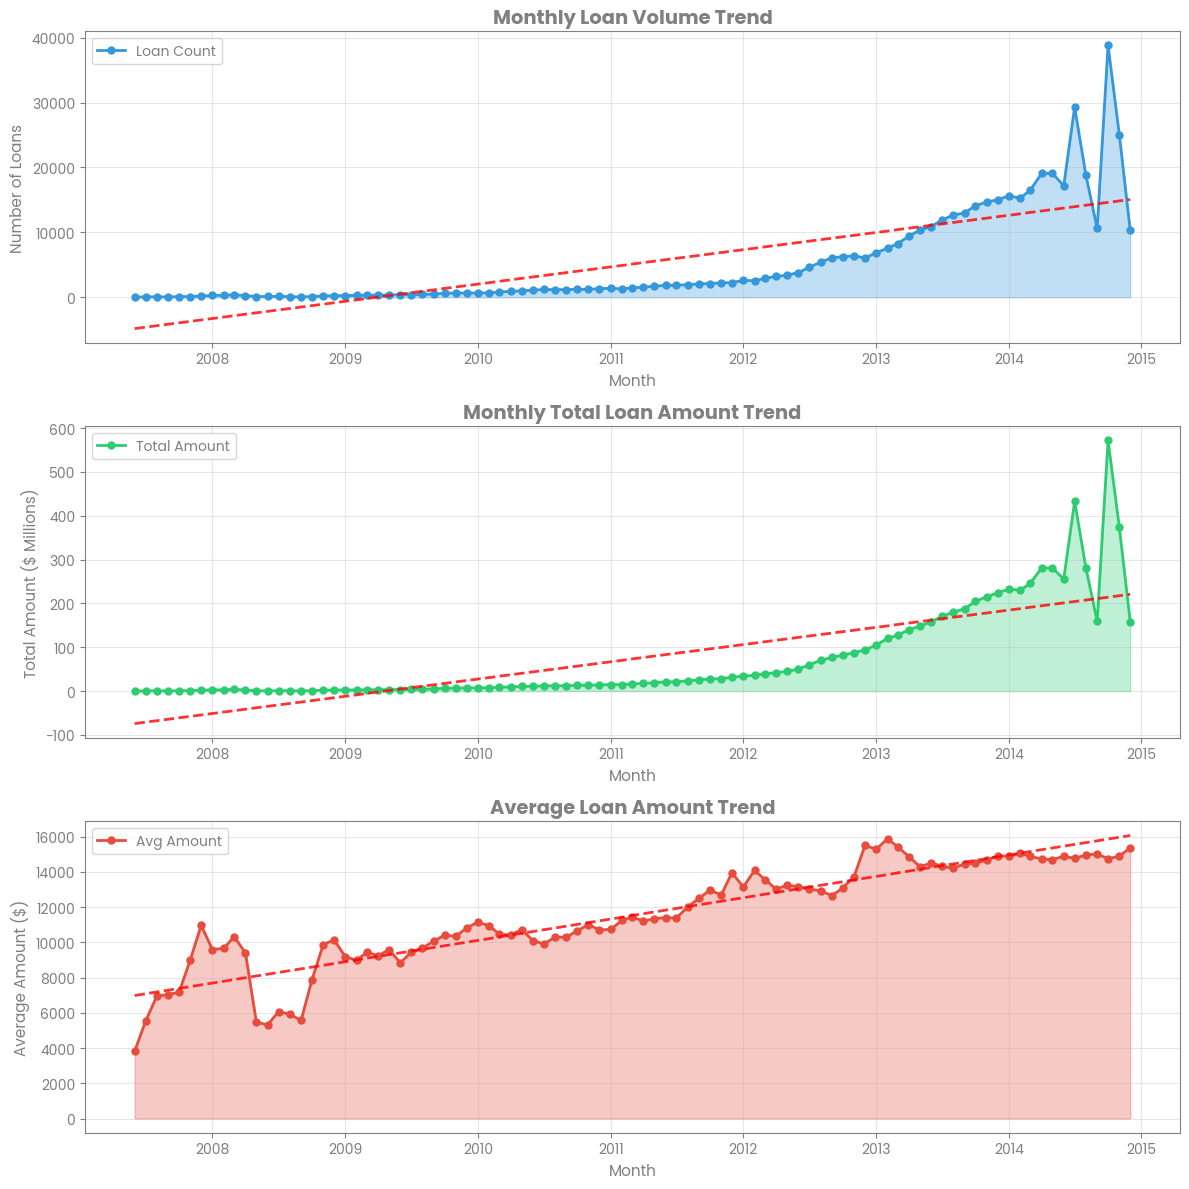

In [ ]:
# VOLUME & VALUE TRENDS OVER TIME
print("VOLUME & VALUE TRENDS OVER TIME")

# Yearly aggregation
df['year'] = df['issue_d'].dt.year
yearly_stats = df.groupby('year').agg({
    'id': 'count',
    'loan_amnt': ['sum', 'mean']
}).reset_index()

yearly_stats.columns = ['year', 'loan_count', 'total_amount', 'avg_amount']

print("\nYearly Statistics:")
print(yearly_stats)

# Monthly aggregation
df['year_month'] = df['issue_d'].dt.to_period('M')
monthly_stats = df.groupby('year_month').agg({
    'id': 'count',
    'loan_amnt': ['sum', 'mean']
}).reset_index()
monthly_stats.columns = ['year_month', 'loan_count', 'total_amount', 'avg_amount']
monthly_stats['year_month_dt'] = monthly_stats['year_month'].dt.to_timestamp()

print(f"\nOverall Trends:")
print(f"  - Average monthly loans: {monthly_stats['loan_count'].mean():.0f}")
print(f"  - Average monthly amount: ${monthly_stats['total_amount'].mean():,.0f}")
print(f"  - Average loan size: ${monthly_stats['avg_amount'].mean():,.0f}")
print()

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# 1. Monthly Loan Volume
ax1 = axes[0]
ax1.plot(monthly_stats['year_month_dt'], monthly_stats['loan_count'], marker='o', linewidth=2, markersize=5, color='#3498db', label='Loan Count')
ax1.fill_between(monthly_stats['year_month_dt'], monthly_stats['loan_count'], alpha=0.3, color='#3498db')
ax1.set_title('Monthly Loan Volume Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Number of Loans', fontsize=11)
ax1.tick_params(axis='x')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add trend line
z = np.polyfit(range(len(monthly_stats)), monthly_stats['loan_count'], 1)
p = np.poly1d(z)
ax1.plot(monthly_stats['year_month_dt'], p(range(len(monthly_stats))),  "--", color='red', alpha=0.8, linewidth=2, label='Trend')

# 2. Monthly Total Amount
ax2 = axes[1]
ax2.plot(monthly_stats['year_month_dt'], monthly_stats['total_amount'] / 1_000_000, marker='o', linewidth=2, markersize=5, color='#2ecc71', label='Total Amount')
ax2.fill_between(monthly_stats['year_month_dt'], monthly_stats['total_amount'] / 1_000_000, alpha=0.3, color='#2ecc71')
ax2.set_title('Monthly Total Loan Amount Trend', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Total Amount ($ Millions)', fontsize=11)
ax2.tick_params(axis='x')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Add trend line
z2 = np.polyfit(range(len(monthly_stats)), monthly_stats['total_amount'] / 1_000_000, 1)
p2 = np.poly1d(z2)
ax2.plot(monthly_stats['year_month_dt'], p2(range(len(monthly_stats))), "--", color='red', alpha=0.8, linewidth=2, label='Trend')

# 3. Average Loan Amount
ax3 = axes[2]
ax3.plot(monthly_stats['year_month_dt'], monthly_stats['avg_amount'], marker='o', linewidth=2, markersize=5, color='#e74c3c', label='Avg Amount')
ax3.fill_between(monthly_stats['year_month_dt'], monthly_stats['avg_amount'], alpha=0.3, color='#e74c3c')
ax3.set_title('Average Loan Amount Trend', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Average Amount ($)', fontsize=11)
ax3.tick_params(axis='x')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Add trend line
z3 = np.polyfit(range(len(monthly_stats)), monthly_stats['avg_amount'], 1)
p3 = np.poly1d(z3)
ax3.plot(monthly_stats['year_month_dt'], p3(range(len(monthly_stats))), "--", color='red', alpha=0.8, linewidth=2, label='Trend')

plt.tight_layout()
plt.show()

LOAN STATUS TRENDS OVER TIME

Loan Status by Year:


loan_status  Charged Off   Current  Default  \
year                                          
2007                45.0       0.0      0.0   
2008               247.0       0.0      0.0   
2009               594.0       0.0      0.0   
2010              1483.0       7.0      1.0   
2011              3205.0    1953.0      8.0   
2012              8084.0    3444.0     28.0   
2013             14836.0   60264.0    182.0   
2014             13981.0  158558.0    613.0   

loan_status  Does not meet the credit policy. Status:Charged Off  \
year                                                               
2007                                                       113.0   
2008                                                       249.0   
2009                                                       129.0   
2010                                                       270.0   
2011                                                         0.0   
2012                                                         0.0   
2013                                                         0.0   
2014                                                         0.0   

loan_status  Does not meet the credit policy. Status:Fully Paid  Fully Paid  \
year                                                                          
2007                                                      239.0       206.0   
2008                                                      582.0      1315.0   
2009                                                      436.0      4122.0   
2010                                                      731.0     10038.0   
2011                                                        0.0     16470.0   
2012                                                        0.0     41479.0   
2013                                                        0.0     56396.0   
2014                                                        0.0     54713.0   

loan_status  In Grace Period  Late (16-30 days)  Late (31-120 days)  
year                                                                 
2007                     0.0                0.0                 0.0  
2008                     0.0                0.0                 0.0  
2009                     0.0                0.0                 0.0  
2010                     0.0                2.0                 5.0  
2011                    28.0               11.0                46.0  
2012                    83.0               27.0               222.0  
2013                   977.0              320.0              1780.0  
2014                  2058.0              858.0              4847.0

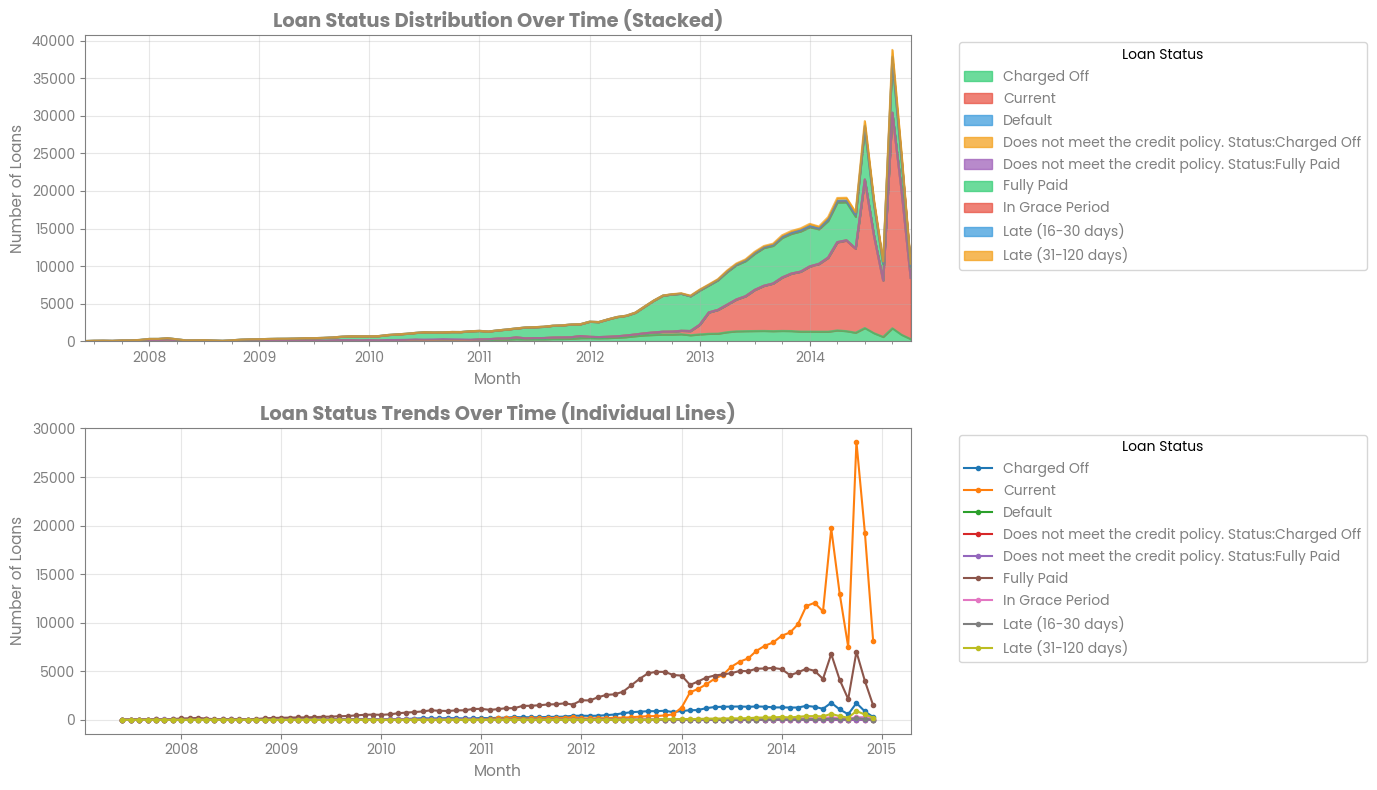

In [ ]:
# LOAN STATUS OVER TIME
print("LOAN STATUS TRENDS OVER TIME")

# Yearly status breakdown
yearly_status = df.groupby(['year', 'loan_status']).size().reset_index(name='count')
status_year_pivot = yearly_status.pivot(index='year', columns='loan_status', values='count').fillna(0)
print("\nLoan Status by Year:")
display(status_year_pivot)
print()

# Monthly status breakdown
monthly_status = df.groupby(['year_month', 'loan_status']).size().reset_index(name='count')
monthly_status['year_month_dt'] = monthly_status['year_month'].dt.to_timestamp()
status_pivot = monthly_status.pivot(index='year_month_dt', columns='loan_status', values='count').fillna(0)

# VISUALISASI: Status Over Time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# 1. Stacked Area Chart
ax1 = axes[0]
status_pivot.plot(kind='area', stacked=True, ax=ax1, alpha=0.7, color=['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6'])
ax1.set_title('Loan Status Distribution Over Time (Stacked)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Number of Loans', fontsize=11)
ax1.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Line Chart (Unstacked)
ax2 = axes[1]
for col in status_pivot.columns:
    ax2.plot(status_pivot.index, status_pivot[col], marker='o', linewidth=1.5, markersize=3, label=col)
ax2.set_title('Loan Status Trends Over Time (Individual Lines)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Number of Loans', fontsize=11)
ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

GEOGRAPHIC DISTRIBUTION

Top 15 States by Loan Count:
state  loan_count  total_amount   avg_amount
   CA       71450    1006821175 14091.269069
   NY       40242     568085425 14116.729412
   TX       36439     551412950 15132.494031
   FL       31637     425731575 13456.761861
   IL       18612     274638475 14755.989415
   NJ       18061     270726200 14989.546537
   PA       16424     229198175 13955.076413
   OH       15237     211544725 13883.620463
   GA       14975     217256500 14507.946578
   VA       14222     216272975 15206.931163
   NC       12682     179419200 14147.547705
   MI       11549     160407525 13889.299939
   MA       11072     170996125 15444.014180
   MD       10974     165070475 15041.960543
   AZ       10712     147783550 13796.074496

✓ Portfolio covers 50 states
✓ Top 5 states account for 42.5% of all loans
✓ Top state: CA with 71,450 loans



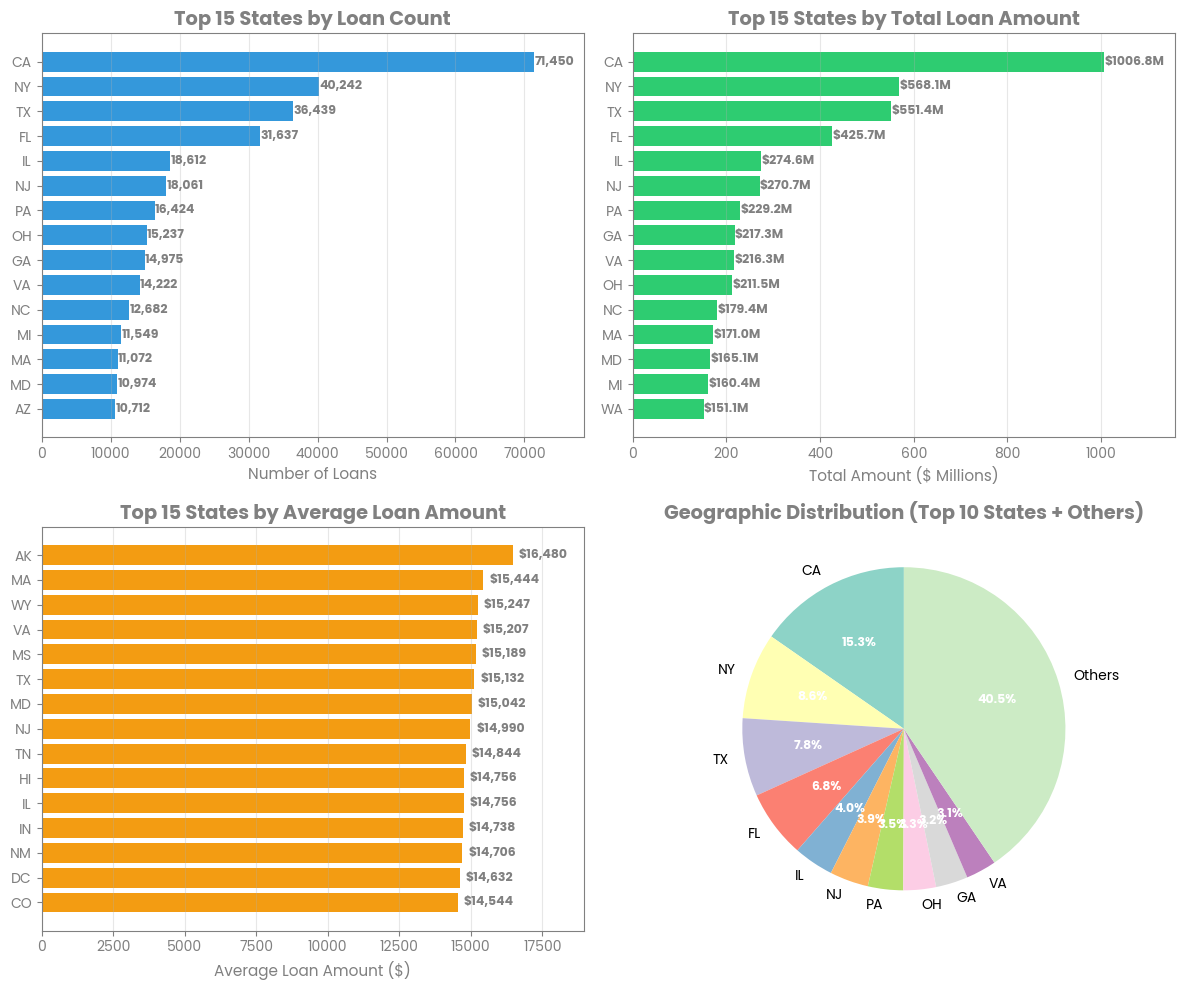

In [ ]:
# GEOGRAPHIC DISTRIBUTION
print("GEOGRAPHIC DISTRIBUTION")

# State-level analysis
state_stats = df.groupby('addr_state').agg({
    'id': 'count',
    'loan_amnt': ['sum', 'mean']
}).reset_index()
state_stats.columns = ['state', 'loan_count', 'total_amount', 'avg_amount']
state_stats = state_stats.sort_values('loan_count', ascending=False)

print("\nTop 15 States by Loan Count:")
print(state_stats.head(15).to_string(index=False))

print(f"\n✓ Portfolio covers {state_stats['state'].nunique()} states")
print(f"✓ Top 5 states account for {state_stats.head(5)['loan_count'].sum() / len(df) * 100:.1f}% of all loans")
print(f"✓ Top state: {state_stats.iloc[0]['state']} with {state_stats.iloc[0]['loan_count']:,.0f} loans\n")

# VISUALISASI: Geographic Distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Top 15 States by Count
ax1 = axes[0, 0]
top15_states = state_stats.head(15)
bars1 = ax1.barh(range(len(top15_states)), top15_states['loan_count'], color='#3498db')
ax1.set_yticks(range(len(top15_states)))
ax1.set_yticklabels(top15_states['state'])
ax1.invert_yaxis()
ax1.set_xlabel('Number of Loans', fontsize=11)
ax1.set_title('Top 15 States by Loan Count', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.margins(x=0.1)
for i, v in enumerate(top15_states['loan_count']):
    ax1.text(v + 20, i, f'{v:,}', va='center', fontweight='bold', fontsize=9, color='#808080')

# 2. Top 15 States by Total Amount
ax2 = axes[0, 1]
top15_amount = state_stats.nlargest(15, 'total_amount')
bars2 = ax2.barh(range(len(top15_amount)), top15_amount['total_amount'] / 1_000_000, color='#2ecc71')
ax2.set_yticks(range(len(top15_amount)))
ax2.set_yticklabels(top15_amount['state'])
ax2.invert_yaxis()
ax2.set_xlabel('Total Amount ($ Millions)', fontsize=11)
ax2.set_title('Top 15 States by Total Loan Amount', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.margins(x=0.15)
for i, v in enumerate(top15_amount['total_amount'] / 1_000_000):
    ax2.text(v + 0.5, i, f'${v:.1f}M', va='center', fontweight='bold', fontsize=9, color='#808080')

# 3. Top 15 States by Average Amount
ax3 = axes[1, 0]
top15_avg = state_stats.nlargest(15, 'avg_amount')
bars3 = ax3.barh(range(len(top15_avg)), top15_avg['avg_amount'], color='#f39c12')
ax3.set_yticks(range(len(top15_avg)))
ax3.set_yticklabels(top15_avg['state'])
ax3.invert_yaxis()
ax3.set_xlabel('Average Loan Amount ($)', fontsize=11)
ax3.set_title('Top 15 States by Average Loan Amount', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.margins(x=0.15)
for i, v in enumerate(top15_avg['avg_amount']):
    ax3.text(v + 200, i, f'${v:,.0f}', va='center', fontweight='bold', fontsize=9, color='#808080')

# 4. State distribution pie (Top 10 + Others)
ax4 = axes[1, 1]
top10_states = state_stats.head(10)
others_count = state_stats.iloc[10:]['loan_count'].sum()
pie_data = list(top10_states['loan_count']) + [others_count]
pie_labels = list(top10_states['state']) + ['Others']
colors_pie = plt.cm.Set3(range(len(pie_data)))
wedges, texts, autotexts = ax4.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', colors=colors_pie, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)
ax4.set_title('Geographic Distribution (Top 10 States + Others)', fontsize=14, fontweight='bold', color='#808080')

plt.tight_layout()
plt.show()

#### **Exponential Growth (2007-2014)**
The portfolio demonstrates remarkable expansion with loan volume growing 390x from 603 to 235,628 loans annually between 2007 and 2014. Alongside this volume surge, average loan sizes increased 80% from \$8,254 to \$14,870, reflecting a strategic shift toward more established borrowers with higher borrowing capacity. The most dramatic acceleration occurred during 2012-2013 when volumes more than doubled, marking a critical inflection point in platform adoption and market penetration.

#### **Portfolio Quality Concerns**
Early vintage loans (2007-2010) show significant credit policy issues, with 40% carrying "Does not meet credit policy" status, indicating substantial underwriting criteria revisions during the platform's formative years. Since 2011, the charged-off rate has stabilized at 5-10% annually, suggesting controlled but persistent credit risk. However, 67% of 2014 loans remain "Current", meaning the portfolio lacks sufficient maturity to accurately assess true default rates—creating uncertainty around actual long-term performance.

#### **Geographic Concentration Risk**
The portfolio exhibits substantial geographic concentration with 42.5% of all loans originating from just five states (CA, NY, TX, FL, IL). California alone accounts for 15.3% of total portfolio volume. Interestingly, average loan sizes vary significantly by geography, Virginia (\$15,207) and Massachusetts (\$15,444) command the highest average amounts despite lower volumes compared to California/New York, suggesting distinct borrower segments and potentially different risk-return profiles across markets.

#### **Strategic Implications**
1. **Maturity Risk**: Two-thirds of the portfolio originates from 2013-2014 and hasn't reached term maturity → high volatility potential in performance metrics
2. **Credit Evolution**: Underwriting improvements evident from elimination of "does not meet policy" loans post-2011
3. **Geographic Diversification**: Expansion beyond top 5 states necessary to mitigate concentration risk

### **2.2. Customer Profiling**

DEMOGRAPHICS - INCOME ANALYSIS

Annual Income Statistics:
count      $466,281.00
mean        $73,277.38
std         $54,963.57
min          $1,896.00
25%         $45,000.00
50%         $63,000.00
75%         $88,960.00
max      $7,500,000.00
Name: annual_inc, dtype: object

Income Percentiles:
   10th percentile: $34,000
   25th percentile: $45,000
   50th percentile: $63,000
   75th percentile: $88,960
   90th percentile: $120,000
   95th percentile: $150,000
   99th percentile: $244,000



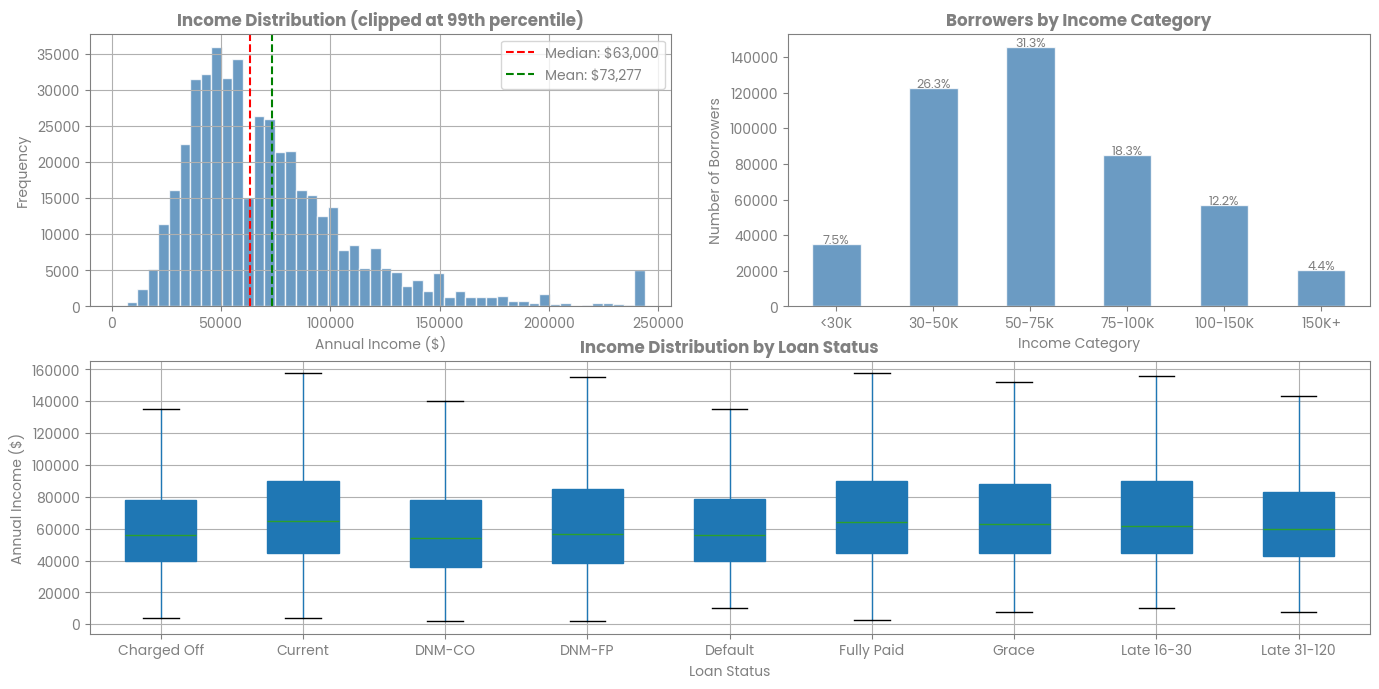

In [ ]:
# DEMOGRAPHICS - INCOME ANALYSIS
print("DEMOGRAPHICS - INCOME ANALYSIS")

short_map = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off',
    'Current': 'Current',
    'Default': 'Default',
    'Late (31-120 days)': 'Late 31-120',
    'Late (16-30 days)': 'Late 16-30',
    'In Grace Period': 'Grace',
    'Does not meet the credit policy. Status:Fully Paid': 'DNM-FP',
    'Does not meet the credit policy. Status:Charged Off': 'DNM-CO'
}

df['loan_status_short'] = df['loan_status'].map(short_map)

# Basic income statistics
print("\nAnnual Income Statistics:")
print(df['annual_inc'].describe().apply(lambda x: f"${x:,.2f}"))

percentiles = [10, 25, 50, 75, 90, 95, 99]
print("\nIncome Percentiles:")
for p in percentiles:
    val = df['annual_inc'].quantile(p/100)
    print(f"   {p}th percentile: ${val:,.0f}")
print()

fig = plt.figure(figsize=(16, 8))

# Histogram
ax1 = plt.subplot2grid((2, 2), (0, 0))
df['annual_inc'].clip(upper=df['annual_inc'].quantile(0.99)).hist(bins=50, ax=ax1, color='steelblue', edgecolor='white', alpha=0.8)
ax1.set_xlabel('Annual Income ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Income Distribution (clipped at 99th percentile)')
ax1.axvline(df['annual_inc'].median(), color='red', linestyle='--', label=f"Median: ${df['annual_inc'].median():,.0f}")
ax1.axvline(df['annual_inc'].mean(), color='green', linestyle='--', label=f"Mean: ${df['annual_inc'].mean():,.0f}")
ax1.legend()

# Income categories
ax3 = plt.subplot2grid((2, 2), (0, 1), colspan=2)
income_bins = [0, 30000, 50000, 75000, 100000, 150000, np.inf]
income_labels = ['<30K', '30-50K', '50-75K', '75-100K', '100-150K', '150K+']
df['income_category'] = pd.cut(df['annual_inc'], bins=income_bins, labels=income_labels)
income_dist = df['income_category'].value_counts().sort_index()

income_dist.plot(kind='bar', ax=ax3, color='steelblue', edgecolor='white', alpha=0.8)
ax3.set_xlabel('Income Category')
ax3.set_ylabel('Number of Borrowers')
ax3.set_title('Borrowers by Income Category')
ax3.tick_params(axis='x', rotation=0)

for i, (idx, val) in enumerate(income_dist.items()):
    pct = val / len(df) * 100
    ax3.text(i, val + 100, f'{pct:.1f}%', ha='center', fontsize=9, color='#808080')

# Boxplot (row 2, col 1–2)
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=3)
df.boxplot(column='annual_inc', by='loan_status_short', ax=ax2, showfliers=False, patch_artist=True)
ax2.set_xlabel('Loan Status')
ax2.set_ylabel('Annual Income ($)')
ax2.set_title('Income Distribution by Loan Status')

plt.tight_layout()
plt.suptitle('')
plt.show()

EMPLOYMENT ANALYSIS

Average Income by Employment Length:
             Mean Income  Median Income   Count
emp_length                                     
< 1 year    68301.848520        57000.0   36261
1 year      69023.265835        58000.0   29622
2 years     70951.243257        60000.0   41373
3 years     71749.489683        60000.0   36596
4 years     71573.293625        60000.0   28023
5 years     72330.766718        60000.0   30774
6 years     71982.835566        61000.0   26112
7 years     73108.203561        62000.0   26180
8 years     74064.827391        63300.0   22395
9 years     74385.958024        65000.0   17888
10+ years   80190.099830        70000.0  150049



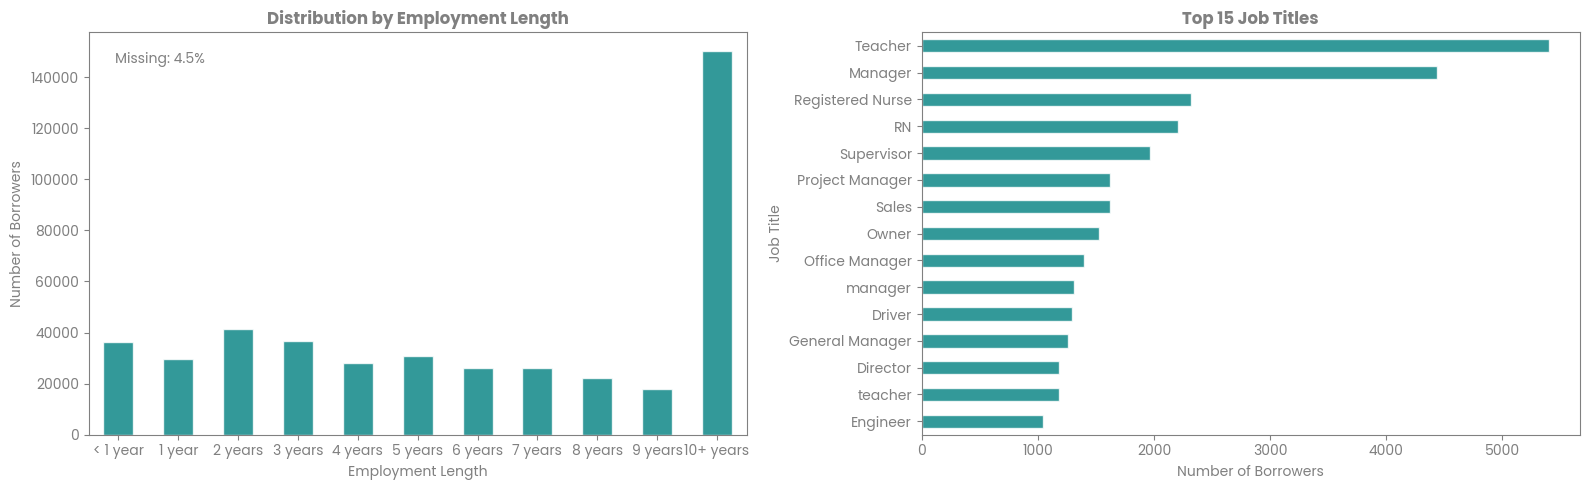

In [ ]:
# DEMOGRAPHICS - EMPLOYMENT ANALYSIS
print("EMPLOYMENT ANALYSIS")

# Employment length vs income
print("\nAverage Income by Employment Length:")
emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
emp_income = df.groupby('emp_length')['annual_inc'].agg(['mean', 'median', 'count'])
emp_income = emp_income.reindex(emp_order).dropna()
emp_income.columns = ['Mean Income', 'Median Income', 'Count']
print(emp_income.to_string())
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Employment length distribution
ax1 = axes[0]
emp_counts = df['emp_length'].value_counts().reindex(emp_order).dropna()
emp_counts.plot(kind='bar', ax=ax1, color='teal', edgecolor='white', alpha=0.8)
ax1.set_xlabel('Employment Length')
ax1.set_ylabel('Number of Borrowers')
ax1.set_title('Distribution by Employment Length')
ax1.tick_params(axis='x', rotation=0)

# Percentage of missing employment
emp_missing = df['emp_length'].isna().sum() / len(df) * 100
ax1.text(0.04, 0.95, f'Missing: {emp_missing:.1f}%', transform=ax1.transAxes, ha='left', va='top', fontsize=10, color='#808080')

# Top employers (job titles)
ax2 = axes[1]
top_employers = df['emp_title'].value_counts().head(15)
top_employers.plot(kind='barh', ax=ax2, color='teal', edgecolor='white', alpha=0.8)
ax2.set_xlabel('Number of Borrowers')
ax2.set_ylabel('Job Title')
ax2.set_title('Top 15 Job Titles')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

HOME OWNERSHIP ANALYSIS

Home Ownership Summary:
                Mean Income  Median Income  Mean Loan  Median Loan   Count
home_ownership                                                            
ANY                35680.00        35680.0    5000.00       5000.0       1
MORTGAGE           83435.40        72000.0   15990.03      15000.0  235875
NONE               63735.89        55750.0   13479.50      11100.0      50
OTHER              66667.02        58000.0   10810.16      10000.0     182
OWN                65762.51        55000.0   13500.52      12000.0   41704
RENT               62236.32        54000.0   12408.21      10500.0  188473



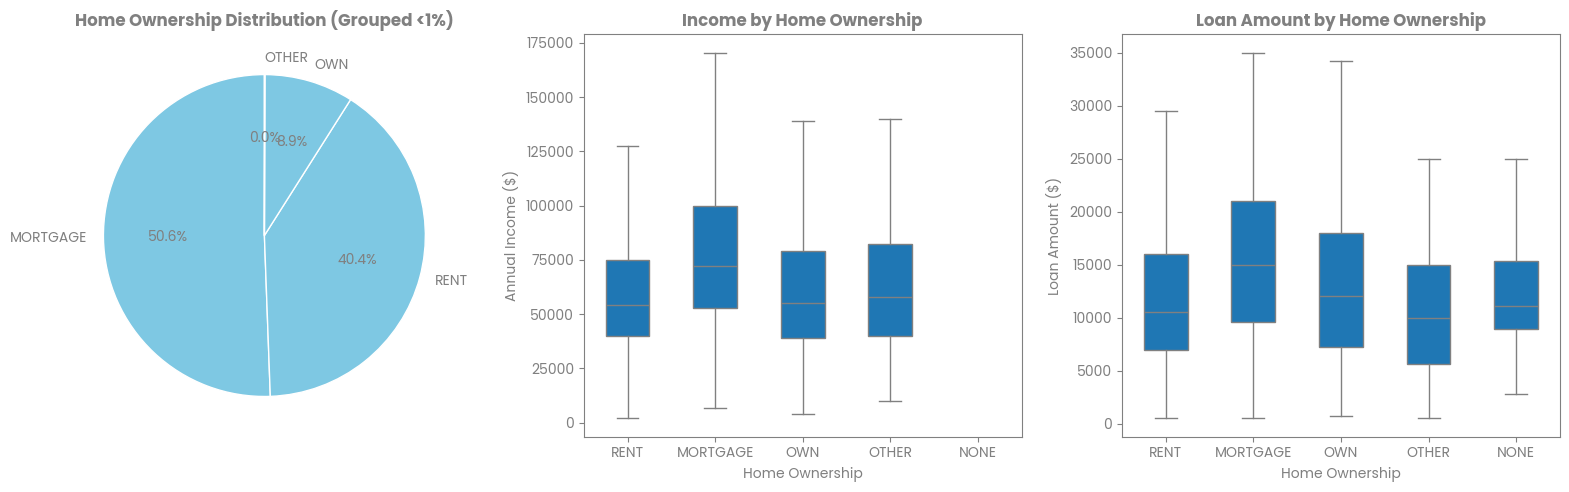

In [ ]:
# HOME OWNERSHIP ANALYSIS
print("HOME OWNERSHIP ANALYSIS")

print("\nHome Ownership Summary:")
home_summary = df.groupby('home_ownership').agg({
    'annual_inc': ['mean', 'median'],
    'loan_amnt': ['mean', 'median'],
    'id': 'count'
}).round(2)
home_summary.columns = ['Mean Income', 'Median Income', 'Mean Loan', 'Median Loan', 'Count']
print(home_summary.to_string())
print()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Home ownership distribution
home_dist_raw = df['home_ownership'].value_counts(normalize=True) * 100
major = home_dist_raw[home_dist_raw >= 1]
minor = home_dist_raw[home_dist_raw < 1]

if len(minor) > 0:
    major['OTHER'] = minor.sum()
home_dist = major

ax1 = axes[0]
explode = [0.02] * len(home_dist)
home_dist.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, textprops={'color': '#808080'}, colors=['#7EC8E3'] * len(home_dist), wedgeprops={'edgecolor': 'white', 'linewidth': 1})
ax1.set_ylabel('')
ax1.set_title('Home Ownership Distribution (Grouped <1%)')

home_order = ['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE']
home_order = [h for h in home_order if h in df['home_ownership'].unique()]

# Income by home ownership
ax2 = axes[1]
data_to_plot = [df[df['home_ownership'] == h]['annual_inc'] for h in home_order]
ax2.boxplot(data_to_plot, showfliers=False, patch_artist=True)
ax2.set_xticklabels(home_order)
ax2.set_xlabel('Home Ownership')
ax2.set_ylabel('Annual Income ($)')
ax2.set_title('Income by Home Ownership')

# Loan amount by home ownership
ax3 = axes[2]
data_to_plot_loan = [df[df['home_ownership'] == h]['loan_amnt'] for h in home_order]
ax3.boxplot(data_to_plot_loan, showfliers=False, patch_artist=True)
ax3.set_xticklabels(home_order)
ax3.set_xlabel('Home Ownership')
ax3.set_ylabel('Loan Amount ($)')
ax3.set_title('Loan Amount by Home Ownership')

plt.tight_layout()
plt.show()

CREDIT CHARACTERISTICS - GRADE ANALYSIS

Grade Summary Statistics:
       Avg Loan  Avg Rate  Median Income  Avg DTI   Count
grade                                                    
A      13399.36      7.54        72000.0    14.88   74867
B      13120.04     11.50        62000.0    16.67  136929
C      14197.55     14.63        60000.0    17.81  125293
D      15062.11     17.54        60000.0    18.45   76888
E      17534.30     20.49        62500.0    18.89   35757
F      18433.36     23.55        65000.0    18.58   13229
G      20610.79     24.84        72057.2    18.46    3322



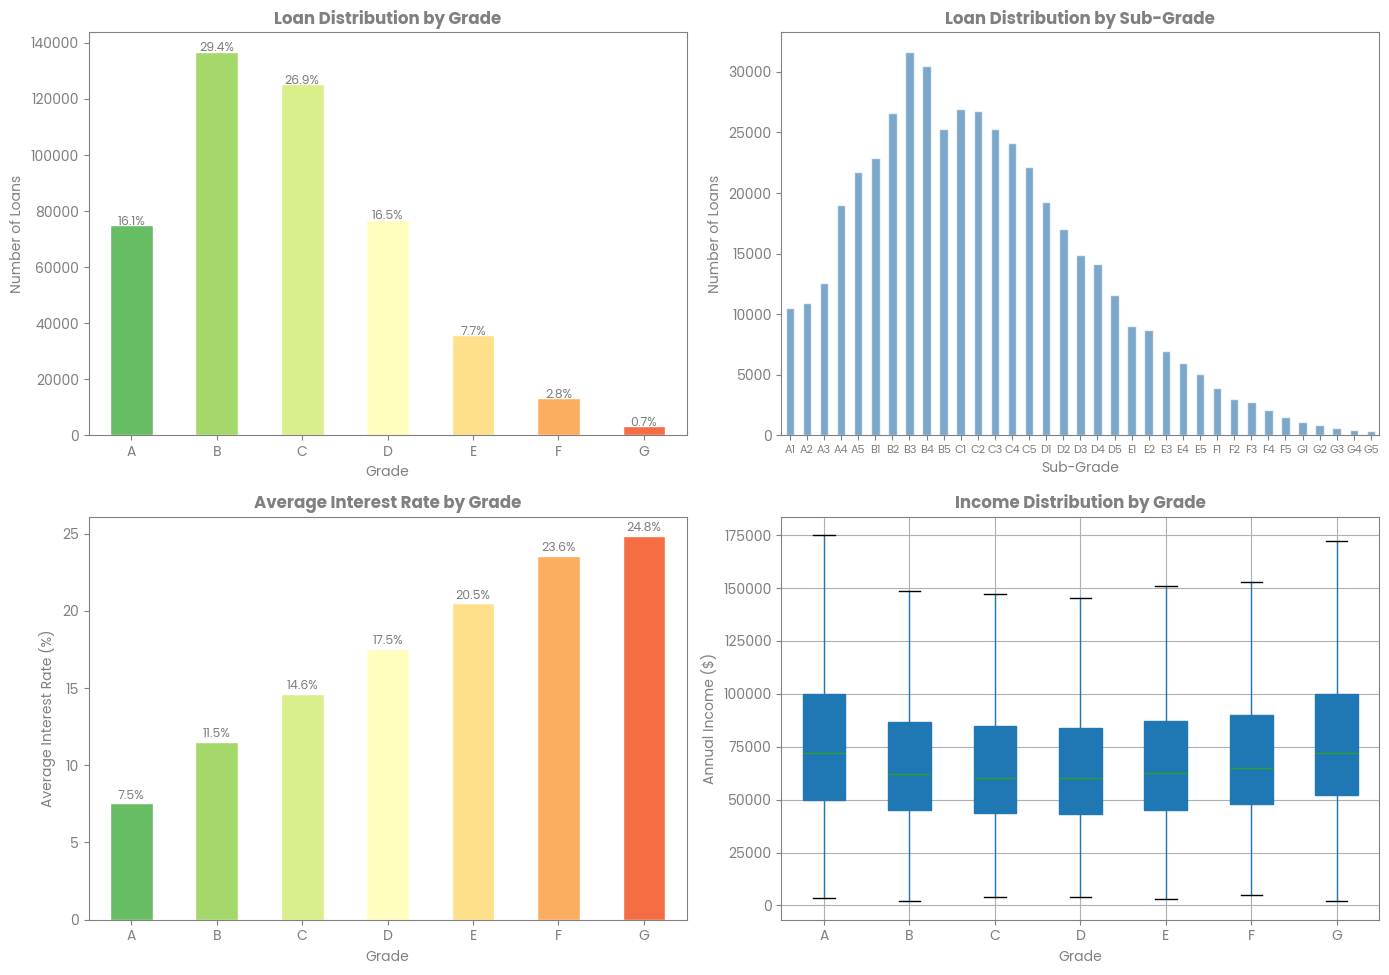

In [ ]:
# CREDIT CHARACTERISTICS - GRADE ANALYSIS
print("CREDIT CHARACTERISTICS - GRADE ANALYSIS")

print("\nGrade Summary Statistics:")
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_summary = df.groupby('grade').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'annual_inc': 'median',
    'dti': 'mean',
    'id': 'count'
}).reindex(grade_order).round(2)
grade_summary.columns = ['Avg Loan', 'Avg Rate', 'Median Income', 'Avg DTI', 'Count']
print(grade_summary.to_string())
print()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Grade distribution
ax1 = axes[0, 0]
grade_dist = df['grade'].value_counts().reindex(grade_order).dropna()
colors_grade = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(grade_dist)))
grade_dist.plot(kind='bar', ax=ax1, color=colors_grade, edgecolor='white')
ax1.set_xlabel('Grade')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Loan Distribution by Grade')
ax1.tick_params(axis='x', rotation=0)

for i, (idx, val) in enumerate(grade_dist.items()):
    pct = val / len(df) * 100
    ax1.text(i, val + 100, f'{pct:.1f}%', ha='center', fontsize=9, color='#808080')

# Sub-grade distribution
ax2 = axes[0, 1]
subgrade_dist = df['sub_grade'].value_counts().sort_index()
subgrade_dist.plot(kind='bar', ax=ax2, color='steelblue', edgecolor='white', alpha=0.7)
ax2.set_xlabel('Sub-Grade')
ax2.set_ylabel('Number of Loans')
ax2.set_title('Loan Distribution by Sub-Grade')
ax2.tick_params(axis='x', rotation=0, labelsize=8)

# Interest rate by grade
ax3 = axes[1, 0]
grade_int = df.groupby('grade')['int_rate'].mean().reindex(grade_order).dropna()
grade_int.plot(kind='bar', ax=ax3, color=colors_grade, edgecolor='white')
ax3.set_xlabel('Grade')
ax3.set_ylabel('Average Interest Rate (%)')
ax3.set_title('Average Interest Rate by Grade')
ax3.tick_params(axis='x', rotation=0)

for i, (idx, val) in enumerate(grade_int.items()):
    ax3.text(i, val + 0.3, f'{val:.1f}%', ha='center', fontsize=9, color='#808080')

# Income by grade
ax4 = axes[1, 1]
df.boxplot(column='annual_inc', by='grade', ax=ax4,
           showfliers=False, patch_artist=True)
ax4.set_xlabel('Grade')
ax4.set_ylabel('Annual Income ($)')
ax4.set_title('Income Distribution by Grade')
plt.suptitle('')

plt.tight_layout()
plt.show()

DTI (DEBT-TO-INCOME) ANALYSIS

DTI Statistics:
count    466285.000000
mean         17.218758
std           7.851121
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64



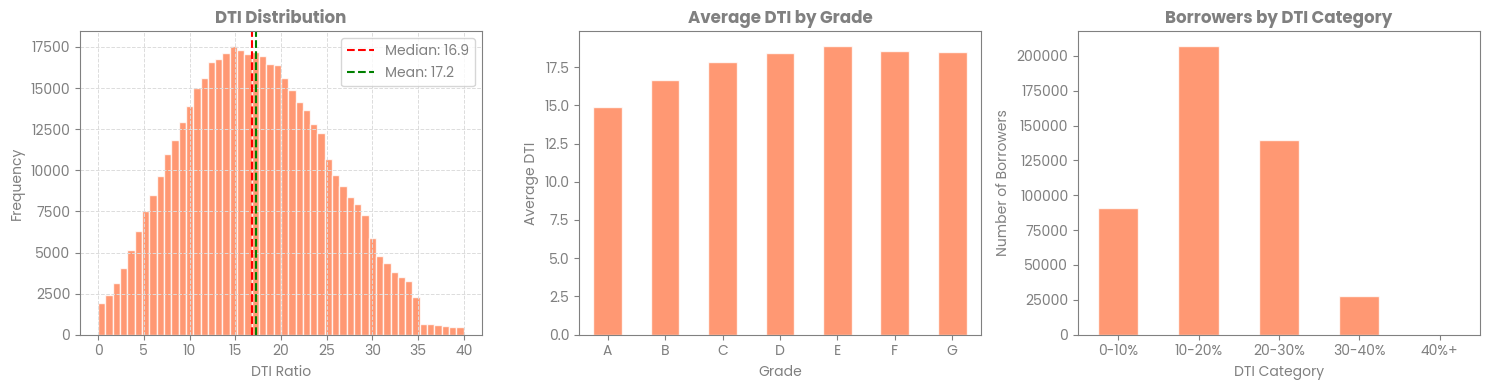

In [ ]:
# DTI (DEBT-TO-INCOME) ANALYSIS
print("DTI (DEBT-TO-INCOME) ANALYSIS")

print("\nDTI Statistics:")
print(df['dti'].describe())
print()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# DTI distribution
ax1 = axes[0]
df['dti'].clip(upper=50).hist(bins=50, ax=ax1, color='coral', edgecolor='white', alpha=0.8)
ax1.axvline(df['dti'].median(), color='red', linestyle='--', label=f"Median: {df['dti'].median():.1f}")
ax1.axvline(df['dti'].mean(), color='green', linestyle='--', label=f"Mean: {df['dti'].mean():.1f}")
ax1.set_xlabel('DTI Ratio')
ax1.set_ylabel('Frequency')
ax1.set_title('DTI Distribution')
ax1.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)
ax1.legend()

# DTI by grade
ax2 = axes[1]
dti_by_grade = df.groupby('grade')['dti'].mean().reindex(grade_order).dropna()
dti_by_grade.plot(kind='bar', ax=ax2, color='coral', edgecolor='white', alpha=0.8)
ax2.set_xlabel('Grade')
ax2.set_ylabel('Average DTI')
ax2.set_title('Average DTI by Grade')
ax2.tick_params(axis='x', rotation=0)

# DTI categories
ax3 = axes[2]
dti_bins = [0, 10, 20, 30, 40, np.inf]
dti_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40%+']
df['dti_category'] = pd.cut(df['dti'], bins=dti_bins, labels=dti_labels)
dti_dist = df['dti_category'].value_counts().sort_index()
dti_dist.plot(kind='bar', ax=ax3, color='coral', edgecolor='white', alpha=0.8)
ax3.set_xlabel('DTI Category')
ax3.set_ylabel('Number of Borrowers')
ax3.set_title('Borrowers by DTI Category')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

CREDIT HISTORY ANALYSIS

Credit History Length (Years):
count    466256.000000
mean         15.685943
std           7.885776
min         -60.000000
25%          11.000684
50%          14.496920
75%          19.501711
max          45.913758
Name: credit_history_years, dtype: float64

Credit Account Statistics:
        Metric      Mean  Median       Std
 Open Accounts 11.187069    10.0  4.987526
Total Accounts 25.064430    23.0 11.600141
Inquiries (6m)  0.804745     0.0  1.091598
 Delinq (2yrs)  0.284678     0.0  0.797365



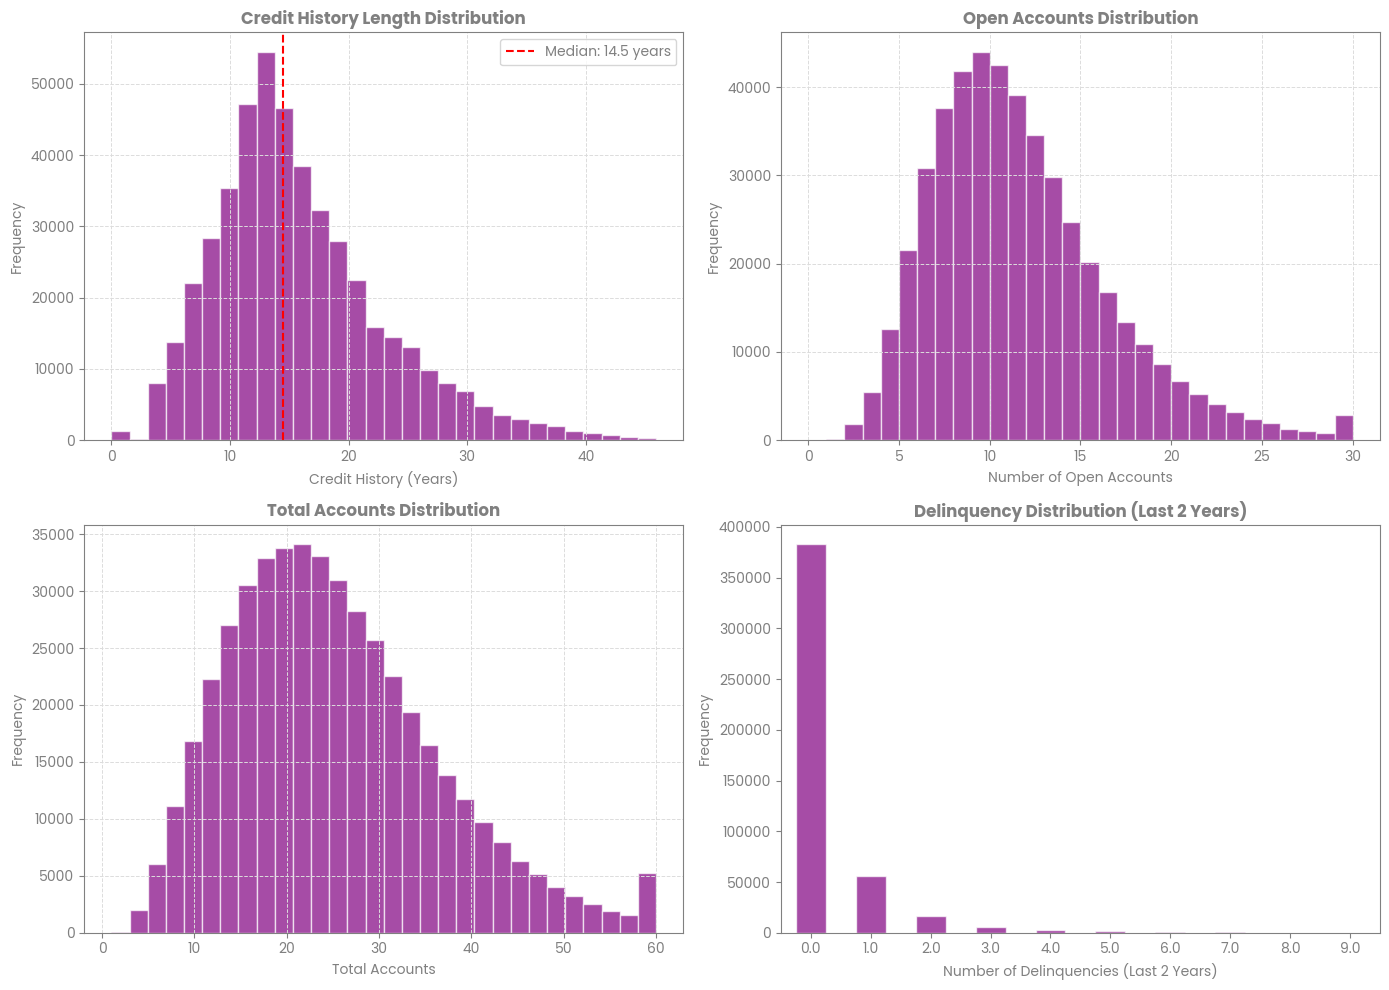

In [ ]:
# CREDIT HISTORY ANALYSIS
print("CREDIT HISTORY ANALYSIS")

df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y', errors='coerce')
df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y', errors='coerce')
df['credit_history_years'] = (df['issue_date'] - df['earliest_cr_line_date']).dt.days / 365.25

print("\nCredit History Length (Years):")
print(df['credit_history_years'].describe())

print("\nCredit Account Statistics:")
credit_stats = pd.DataFrame({
    'Metric': ['Open Accounts', 'Total Accounts', 'Inquiries (6m)', 'Delinq (2yrs)'],
    'Mean': [df['open_acc'].mean(), df['total_acc'].mean(), df['inq_last_6mths'].mean(), df['delinq_2yrs'].mean()],
    'Median': [df['open_acc'].median(), df['total_acc'].median(), df['inq_last_6mths'].median(), df['delinq_2yrs'].median()],
    'Std': [df['open_acc'].std(), df['total_acc'].std(), df['inq_last_6mths'].std(), df['delinq_2yrs'].std()]
})
print(credit_stats.to_string(index=False))
print()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Credit history distribution
ax1 = axes[0, 0]
df['credit_history_years'].clip(lower=0, upper=50).hist(bins=30, ax=ax1, color='purple', edgecolor='white', alpha=0.7)
ax1.set_xlabel('Credit History (Years)')
ax1.set_ylabel('Frequency')
ax1.set_title('Credit History Length Distribution')
ax1.axvline(df['credit_history_years'].median(), color='red', linestyle='--', label=f"Median: {df['credit_history_years'].median():.1f} years")
ax1.legend()
ax1.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

# Open accounts distribution
ax2 = axes[0, 1]
df['open_acc'].clip(upper=30).hist(bins=30, ax=ax2, color='purple', edgecolor='white', alpha=0.7)
ax2.set_xlabel('Number of Open Accounts')
ax2.set_ylabel('Frequency')
ax2.set_title('Open Accounts Distribution')
ax2.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

# Total accounts distribution
ax3 = axes[1, 0]
df['total_acc'].clip(upper=60).hist(bins=30, ax=ax3, color='purple', edgecolor='white', alpha=0.7)
ax3.set_xlabel('Total Accounts')
ax3.set_ylabel('Frequency')
ax3.set_title('Total Accounts Distribution')
ax3.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

# Delinquency in last 2 years
ax4 = axes[1, 1]
delinq_dist = df['delinq_2yrs'].value_counts().sort_index().head(10)
delinq_dist.plot(kind='bar', ax=ax4, color='purple', edgecolor='white', alpha=0.7)
ax4.set_xlabel('Number of Delinquencies (Last 2 Years)')
ax4.set_ylabel('Frequency')
ax4.set_title('Delinquency Distribution (Last 2 Years)')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

REVOLVING CREDIT ANALYSIS

Revolving Credit Statistics:
   Revolving Balance - Mean: $16,230, Median: $11,764
   Revolving Utilization - Mean: 56.2%, Median: 57.6%



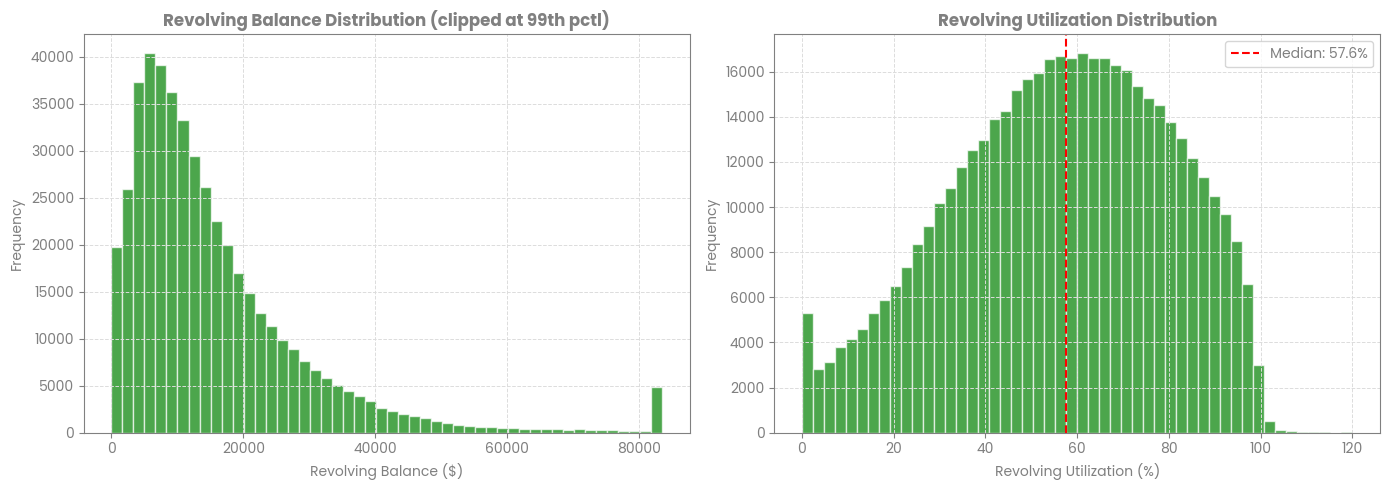

In [ ]:
# REVOLVING CREDIT ANALYSIS
print("REVOLVING CREDIT ANALYSIS")

print("\nRevolving Credit Statistics:")
print(f"   Revolving Balance - Mean: ${df['revol_bal'].mean():,.0f}, Median: ${df['revol_bal'].median():,.0f}")
print(f"   Revolving Utilization - Mean: {df['revol_util'].mean():.1f}%, Median: {df['revol_util'].median():.1f}%\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Revolving balance distribution
ax1 = axes[0]
df['revol_bal'].clip(upper=df['revol_bal'].quantile(0.99)).hist(bins=50, ax=ax1, color='green', edgecolor='white', alpha=0.7)
ax1.set_xlabel('Revolving Balance ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Revolving Balance Distribution (clipped at 99th pctl)')
ax1.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

# Revolving utilization
ax2 = axes[1]
df['revol_util'].dropna().clip(upper=120).hist(bins=50, ax=ax2, color='green', edgecolor='white', alpha=0.7)
ax2.set_xlabel('Revolving Utilization (%)')
ax2.set_ylabel('Frequency')
ax2.set_title('Revolving Utilization Distribution')
ax2.axvline(df['revol_util'].median(), color='red', linestyle='--', label=f"Median: {df['revol_util'].median():.1f}%")
ax2.legend()
ax2.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

BORROWING BEHAVIOR - LOAN AMOUNT

Loan Amount Statistics:
count    $466,285.00
mean      $14,317.28
std        $8,286.51
min          $500.00
25%        $8,000.00
50%       $12,000.00
75%       $20,000.00
max       $35,000.00
Name: loan_amnt, dtype: object



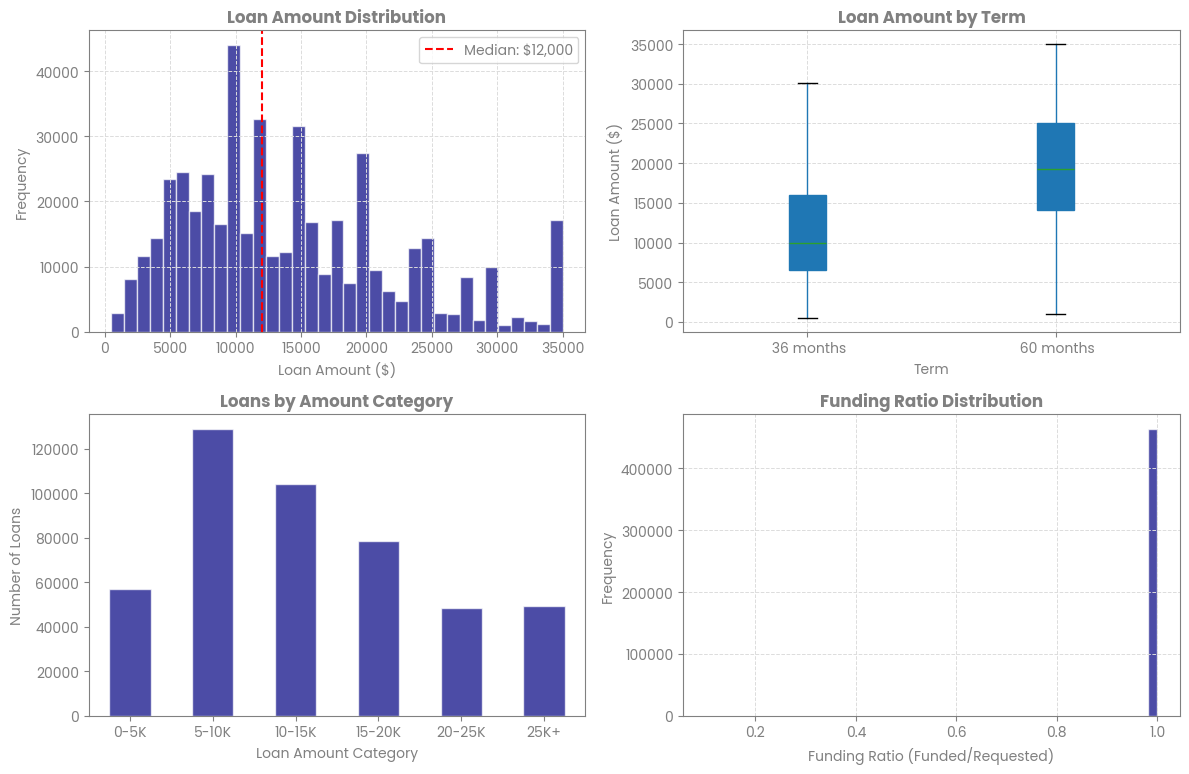

In [ ]:
# BORROWING BEHAVIOR - LOAN AMOUNT
print("BORROWING BEHAVIOR - LOAN AMOUNT")

print("\nLoan Amount Statistics:")
print(df['loan_amnt'].describe().apply(lambda x: f"${x:,.2f}"))
print()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loan amount distribution
ax1 = axes[0, 0]
df['loan_amnt'].hist(bins=35, ax=ax1, color='navy', edgecolor='white', alpha=0.7)
ax1.set_xlabel('Loan Amount ($)')
ax1.set_ylabel('Frequency')
ax1.set_title('Loan Amount Distribution')
ax1.axvline(df['loan_amnt'].median(), color='red', linestyle='--', label=f"Median: ${df['loan_amnt'].median():,.0f}")
ax1.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)
ax1.legend()

# Loan amount by term
ax2 = axes[0, 1]
df.boxplot(column='loan_amnt', by='term', ax=ax2, patch_artist=True, showfliers=False)
ax2.set_xlabel('Term')
ax2.set_ylabel('Loan Amount ($)')
ax2.set_title('Loan Amount by Term')
ax2.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)
plt.suptitle('')

# Loan amount categories
ax3 = axes[1, 0]
loan_bins = [0, 5000, 10000, 15000, 20000, 25000, np.inf]
loan_labels = ['0-5K', '5-10K', '10-15K', '15-20K', '20-25K', '25K+']
df['loan_category'] = pd.cut(df['loan_amnt'], bins=loan_bins, labels=loan_labels)
loan_dist = df['loan_category'].value_counts().sort_index()
loan_dist.plot(kind='bar', ax=ax3, color='navy', edgecolor='white', alpha=0.7)
ax3.set_xlabel('Loan Amount Category')
ax3.set_ylabel('Number of Loans')
ax3.set_title('Loans by Amount Category')
ax3.tick_params(axis='x', rotation=0)

# Funded amount ratio
ax4 = axes[1, 1]
df['funding_ratio'] = df['funded_amnt'] / df['loan_amnt']
df['funding_ratio'].hist(bins=50, ax=ax4, color='navy', edgecolor='white', alpha=0.7)
ax4.set_xlabel('Funding Ratio (Funded/Requested)')
ax4.set_ylabel('Frequency')
ax4.set_title('Funding Ratio Distribution')
ax4.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

LOAN PURPOSE ANALYSIS

Purpose Summary:
                    Avg Loan  Total Volume   Count  Avg Rate
purpose                                                     
debt_consolidation  15129.76    4148505450  274195     14.12
credit_card         14738.59    1535127525  104157     12.56
home_improvement    13911.13     369159675   26537     13.57
other                9519.84     225524900   23690     15.67
major_purchase      10494.24     103137425    9828     12.83
small_business      15313.76     107395425    7013     15.98
car                  8122.06      43834775    5397     12.13
medical              8851.22      40733325    4602     15.27
moving               7550.03      22604800    2994     16.03
vacation             6077.10      15113750    2487     15.06
wedding             10471.44      24534575    2343     14.15
house               14959.96      33944150    2269     15.26
educational          6626.54       2796400     422     12.12
renewable_energy    10027.35       3519600   

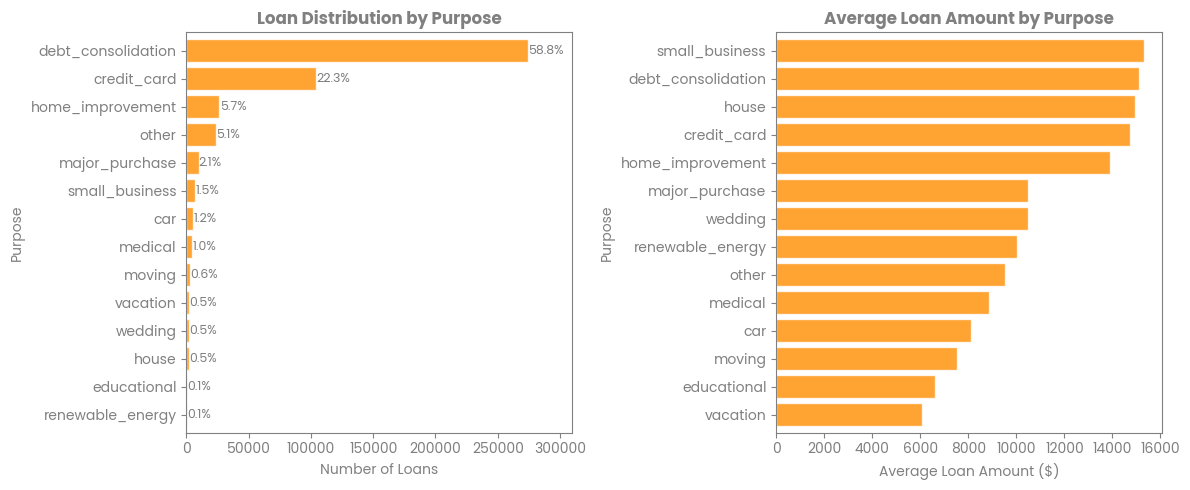

In [ ]:
# BORROWING BEHAVIOR - PURPOSE ANALYSIS
print("LOAN PURPOSE ANALYSIS")

print("\nPurpose Summary:")
purpose_summary = df.groupby('purpose').agg({
    'loan_amnt': ['mean', 'sum', 'count'],
    'int_rate': 'mean'
}).round(2)
purpose_summary.columns = ['Avg Loan', 'Total Volume', 'Count', 'Avg Rate']
purpose_summary = purpose_summary.sort_values('Count', ascending=False)
print(purpose_summary.to_string())
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Purpose distribution
ax1 = axes[0]
purpose_dist = df['purpose'].value_counts()
purpose_dist.plot(kind='barh', ax=ax1, color='darkorange', edgecolor='white', alpha=0.8, width=0.8)
ax1.set_xlabel('Number of Loans')
ax1.set_ylabel('Purpose')
ax1.set_xlim(0, 310_000)
ax1.set_title('Loan Distribution by Purpose')
ax1.invert_yaxis()

# Add percentage
for i, (idx, val) in enumerate(purpose_dist.items()):
    pct = val / len(df) * 100
    ax1.text(val + 100, i, f'{pct:.1f}%', va='center', fontsize=9, color='#808080')

# Average loan amount by purpose
ax2 = axes[1]
purpose_loan = df.groupby('purpose')['loan_amnt'].mean().sort_values(ascending=True)
purpose_loan.plot(kind='barh', ax=ax2, color='darkorange', edgecolor='white', alpha=0.8, width=0.8)
ax2.set_xlabel('Average Loan Amount ($)')
ax2.set_ylabel('Purpose')
ax2.set_title('Average Loan Amount by Purpose')

plt.tight_layout()
plt.show()

LOAN TERM ANALYSIS

Term Comparison:
           Avg Loan  Avg Rate  Median Income  Avg DTI   Count
term                                                         
36 months  12209.02     12.64        60000.0    16.77  337953
60 months  19869.23     16.96        70000.0    18.39  128332



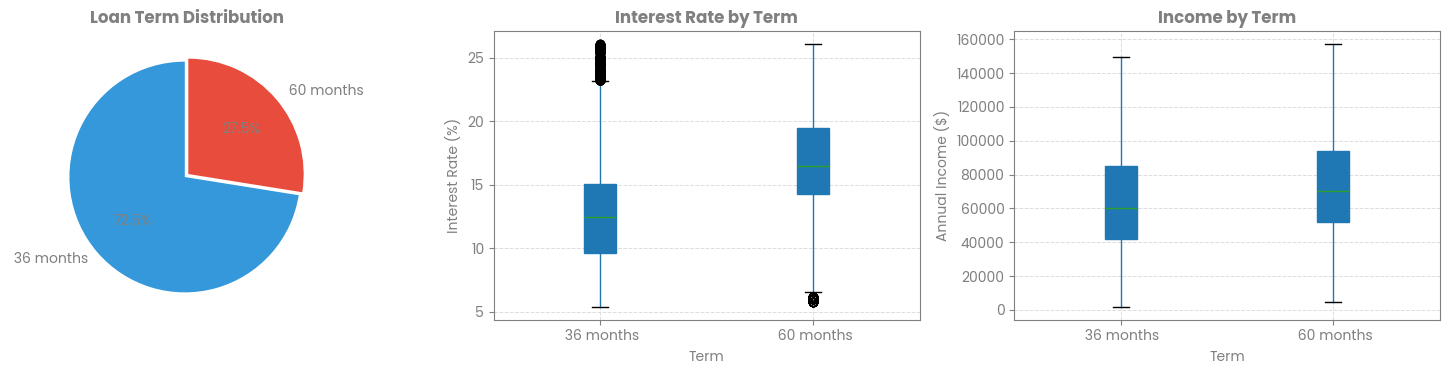

In [ ]:
# BORROWING BEHAVIOR - TERM ANALYSIS
print("LOAN TERM ANALYSIS")

print("\nTerm Comparison:")
term_summary = df.groupby('term').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'annual_inc': 'median',
    'dti': 'mean',
    'id': 'count'
}).round(2)
term_summary.columns = ['Avg Loan', 'Avg Rate', 'Median Income', 'Avg DTI', 'Count']
print(term_summary.to_string())
print()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Term distribution
ax1 = axes[0]
term_dist = df['term'].value_counts()
term_dist.plot(kind='pie', ax=ax1, autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90, explode=[0.02, 0.02], textprops={'color': '#808080'})
ax1.set_ylabel('')
ax1.set_title('Loan Term Distribution')

# Interest rate by term
ax2 = axes[1]
df.boxplot(column='int_rate', by='term', ax=ax2, patch_artist=True)
ax2.set_xlabel('Term')
ax2.set_ylabel('Interest Rate (%)')
ax2.set_title('Interest Rate by Term')
ax2.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)
plt.suptitle('')

# Income by term
ax3 = axes[2]
df.boxplot(column='annual_inc', by='term', ax=ax3, patch_artist=True, showfliers=False)
ax3.set_xlabel('Term')
ax3.set_ylabel('Annual Income ($)')
ax3.set_title('Income by Term')
ax3.grid(True, color='#dcdcdc', linestyle='--', linewidth=0.7)
plt.suptitle('')

plt.tight_layout()
plt.show()

GEOGRAPHIC DISTRIBUTION



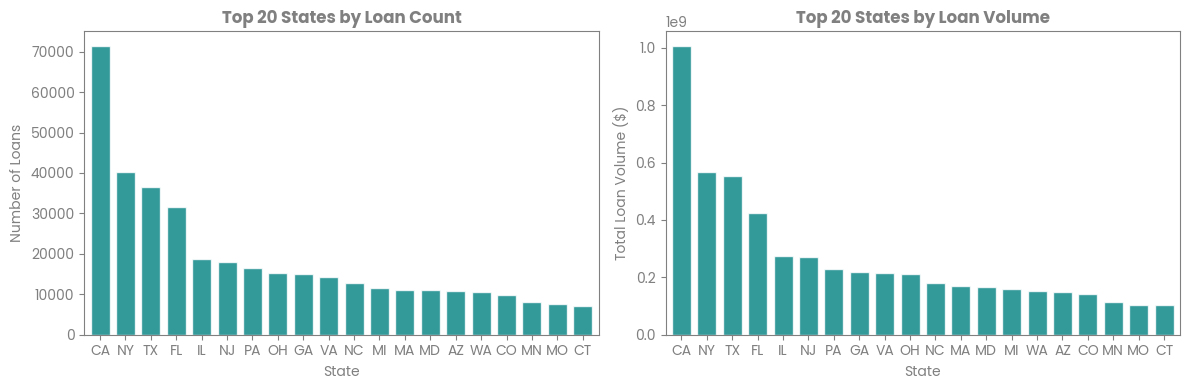

In [ ]:
# GEOGRAPHIC DISTRIBUTION
print("GEOGRAPHIC DISTRIBUTION")
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Top states by count
ax1 = axes[0]
state_dist = df['addr_state'].value_counts().head(20)
state_dist.plot(kind='bar', ax=ax1, color='teal', edgecolor='white', alpha=0.8, width=0.75)
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Top 20 States by Loan Count')
ax1.tick_params(axis='x', rotation=0)

# Top states by volume
ax2 = axes[1]
state_volume = df.groupby('addr_state')['loan_amnt'].sum().sort_values(ascending=False).head(20)
state_volume.plot(kind='bar', ax=ax2, color='teal', edgecolor='white', alpha=0.8, width=0.75)
ax2.set_xlabel('State')
ax2.set_ylabel('Total Loan Volume ($)')
ax2.set_title('Top 20 States by Loan Volume')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

FEATURE CORRELATIONS

Top Feature Correlations (absolute value > 0.3):
  Feature 1   Feature 2  Correlation
  loan_amnt installment     0.949666
   open_acc   total_acc     0.682114
  loan_amnt  annual_inc     0.370893
installment  annual_inc     0.368145
 annual_inc   revol_bal     0.332316
  loan_amnt   revol_bal     0.331423
   int_rate  revol_util     0.323365
installment   revol_bal     0.320239
        dti    open_acc     0.303914



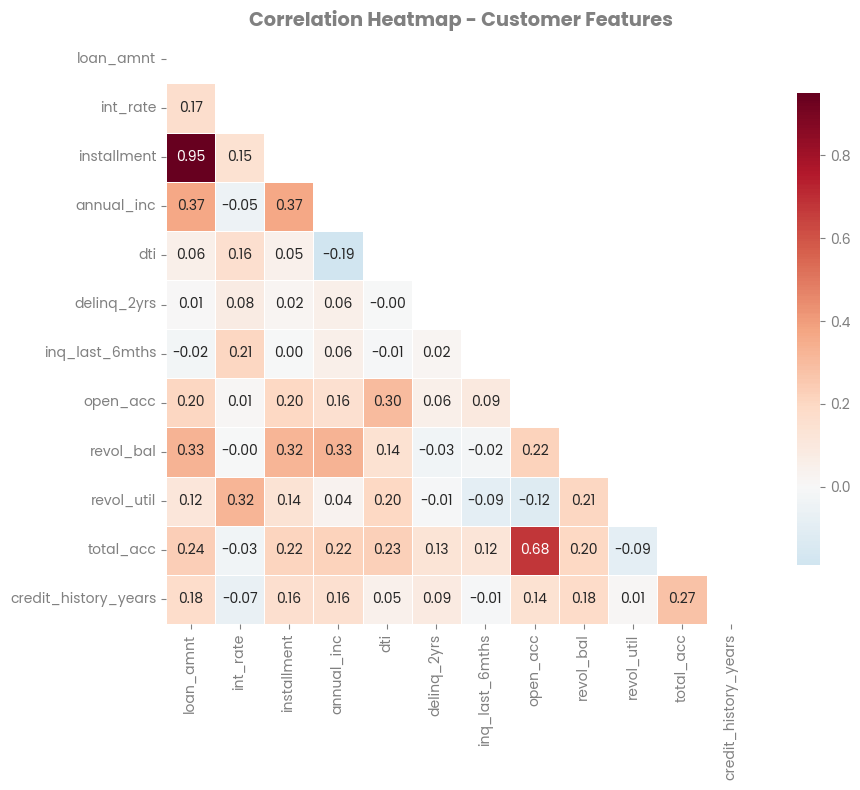

In [ ]:
# CORRELATION HEATMAP - CUSTOMER FEATURES
print("FEATURE CORRELATIONS")

customer_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'credit_history_years']
available_features = [f for f in customer_features if f in df.columns]
corr_matrix = df[available_features].corr()

# Top correlations
print("\nTop Feature Correlations (absolute value > 0.3):")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', key=abs, ascending=False)
print(corr_df.to_string(index=False))
print()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - Customer Features', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Income Distribution and Employment Stability**
The borrower base demonstrates a middle-income profile with a median annual income of \$63,000, though the mean of \$73,277 suggests positive skew from high earners (max \$7.5M). Income concentration is evident with 50% of borrowers earning between \$45,000-\$88,960 annually. Employment tenure shows a clear income progression, with 10+ year veterans earning 17% more (median \$70,000) than newcomers (median \$57,000). However, borrowers with less than 5 years employment still represent a substantial 36% of the portfolio, indicating meaningful exposure to less established workers who may face higher income volatility.

#### **Home Ownership as Income Proxy**
Home ownership status reveals sharp income segmentation: mortgage holders earn 34% more (median \$72,000) than renters (median \$54,000) yet borrow 28% larger amounts (\$15,990 vs \$12,408). This correlation is critical as mortgage holders comprise 50.6% of the portfolio—their elevated debt service obligations (mortgage + personal loan) could amplify default risk during economic downturns despite higher income levels.

#### **Credit Grade Paradox**
An unexpected pattern emerges where riskier grades (E-G) command larger loan amounts despite higher interest rates—Grade G borrowers take 54% larger loans than Grade A (\$20,611 vs \$13,399) at 3x the interest rate (24.84% vs 7.54%). This suggests either: (1) higher-risk borrowers have fewer alternatives and accept worse terms for larger amounts, or (2) platform pricing hasn't fully calibrated loan size limits to risk tiers. Notably, lower grades show higher median incomes (Grade F/G: \$65,000-\$72,000 vs Grade A: \$72,000), indicating that income alone is insufficient for credit quality—behavioral factors dominate the risk profile.

#### **Debt Burden and Credit Behavior**
The portfolio carries moderate leverage with median DTI of 16.87% and mean revolving utilization of 56.2%, though utilization's median of 57.6% shows this isn't driven by outliers—borrowers genuinely run high credit card balances. The 15.7-year average credit history with 11 open accounts suggests experienced credit users, yet 28% have delinquencies in the past 2 years, revealing a cohort with established but imperfect credit management. Recent credit-seeking behavior is modest with 0.8 inquiries per borrower in 6 months, indicating the platform isn't capturing primarily desperate credit shoppers.

#### **Purpose-Driven Borrowing Patterns**
Debt consolidation dominates at 58.8% of total volume (\$4.1B), nearly 3x larger than the next category (credit cards at \$1.5B). These borrowers take 20% larger loans than average (\$15,130 vs \$14,317) at higher rates (14.12%), suggesting they're refinancing expensive debt but remain in the higher-risk spectrum. The small business category shows concerning signals: highest average rates (15.98%) despite relatively large loans (\$15,314), indicating perceived risk that pricing may not fully compensate for. Conversely, credit card and car loans command the lowest rates (12.56% and 12.13%), possibly due to clearer collateral or payoff verification.

#### **Term Structure Risk Concentration**
The 72.5% concentration in 36-month terms creates reinvestment risk as these loans mature faster, but also limits exposure to long-duration credit risk. The 60-month cohort is fundamentally different: they borrow 63% more (\$19,869 vs \$12,209) at 340 basis points higher rates (16.96% vs 12.64%) with elevated DTI (18.39% vs 16.77%), suggesting this segment represents borrowers stretched to their capacity who need extended terms to afford payments.

#### **Strategic Implications**
1. **Income-Debt Mismatch**: Mortgage holders' dual obligations need stress-testing under recession scenarios
2. **Grade Recalibration**: Inverse relationship between risk grade and loan size warrants review of underwriting limits
3. **Consolidation Dependency**: 59% portfolio reliance on debt consolidation creates vulnerability if consumer debt levels decline
4. **Term Segmentation**: 60-month borrowers show compounded risk factors—consider enhanced monitoring or tighter origination

### **2.3. Loan Characteristic**

INTEREST RATE ANALYSIS

Interest Rate Statistics:
  Mean     : 13.83%
  Median   : 13.66%
  Min      : 5.42%
  Max      : 26.06%
  Std Dev  : 4.36%

Interest Rate by Grade:
        mean  median    min    max   count
grade                                     
A       7.54    7.69   5.42   9.63   74867
B      11.50   11.67   6.00  14.09  136929
C      14.63   14.49   6.00  17.27  125293
D      17.54   17.57   6.00  20.31   76888
E      20.49   20.50   6.00  23.40   35757
F      23.55   23.76   6.00  25.57   13229
G      24.84   25.80  16.59  26.06    3322



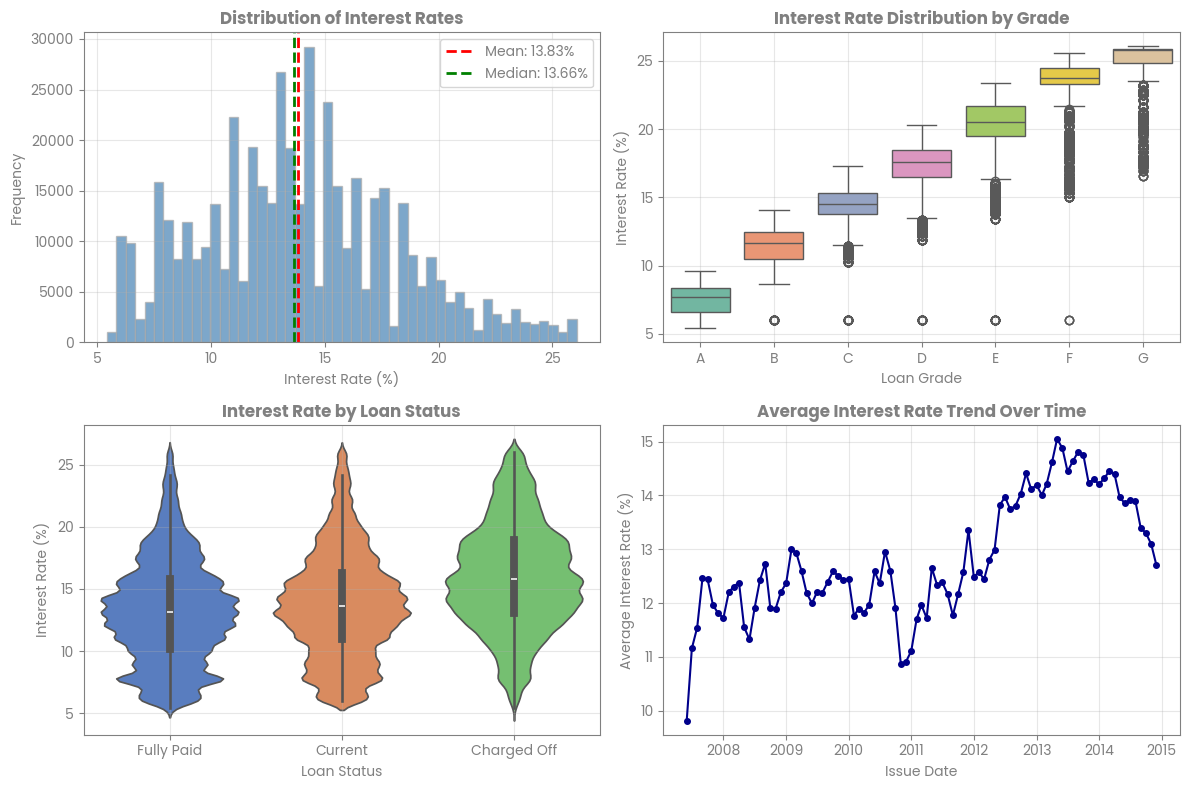

In [ ]:
# INTEREST RATE DISTRIBUTION
print("INTEREST RATE ANALYSIS")

df['int_rate_num'] = pd.to_numeric(df['int_rate'], errors='coerce')

print(f"\nInterest Rate Statistics:")
print(f"  Mean     : {df['int_rate_num'].mean():.2f}%")
print(f"  Median   : {df['int_rate_num'].median():.2f}%")
print(f"  Min      : {df['int_rate_num'].min():.2f}%")
print(f"  Max      : {df['int_rate_num'].max():.2f}%")
print(f"  Std Dev  : {df['int_rate_num'].std():.2f}%")

# Interest rate by grade
print("\nInterest Rate by Grade:")
int_rate_by_grade = df.groupby('grade')['int_rate_num'].agg(['mean', 'median', 'min', 'max', 'count'])
print(int_rate_by_grade.round(2))
print()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Distribution of interest rates
axes[0, 0].hist(df['int_rate_num'], bins=50, edgecolor='#acacac', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df['int_rate_num'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["int_rate_num"].mean():.2f}%')
axes[0, 0].axvline(df['int_rate_num'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["int_rate_num"].median():.2f}%')
axes[0, 0].set_xlabel('Interest Rate (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Interest Rates', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Boxplot by grade
grade_order = sorted(df['grade'].unique())
sns.boxplot(data=df, x='grade', y='int_rate_num', order=grade_order, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_xlabel('Loan Grade')
axes[0, 1].set_ylabel('Interest Rate (%)')
axes[0, 1].set_title('Interest Rate Distribution by Grade', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Violin plot by loan status
status_order = ['Fully Paid', 'Current', 'Charged Off']
status_data = df[df['loan_status'].isin(status_order)]
sns.violinplot(data=status_data, x='loan_status', y='int_rate_num', order=status_order, ax=axes[1, 0], palette='muted')
axes[1, 0].set_xlabel('Loan Status')
axes[1, 0].set_ylabel('Interest Rate (%)')
axes[1, 0].set_title('Interest Rate by Loan Status', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(True, alpha=0.3)

# Average interest rate over time
df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
int_rate_time = df.groupby(df['issue_date'].dt.to_period('M'))['int_rate_num'].mean().reset_index()
int_rate_time['issue_date'] = int_rate_time['issue_date'].dt.to_timestamp()
axes[1, 1].plot(int_rate_time['issue_date'], int_rate_time['int_rate_num'], marker='o', linewidth=1.5, markersize=4, color='darkblue')
axes[1, 1].set_xlabel('Issue Date')
axes[1, 1].set_ylabel('Average Interest Rate (%)')
axes[1, 1].set_title('Average Interest Rate Trend Over Time', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

LOAN AMOUNT & TERM PATTERNS

Loan Amount Statistics:
  Mean     : $14,317.28
  Median   : $12,000.00
  Min      : $500.00
  Max      : $35,000.00
  Total    : $6,675,931,775.00

Loan Term Distribution:
   36 months  : 337,953 loans (72.48%)
   60 months  : 128,332 loans (27.52%)

Average Loan Amount by Term:
                   mean   median   count
term                                    
36 months  12209.018044  10000.0  337953
60 months  19869.225914  19225.0  128332

Average Loan Amount by Grade:
           mean   median   count
grade                           
A      13399.36  12000.0   74867
B      13120.04  12000.0  136929
C      14197.55  12000.0  125293
D      15062.11  13375.0   76888
E      17534.30  16500.0   35757
F      18433.36  18000.0   13229
G      20610.79  20000.0    3322



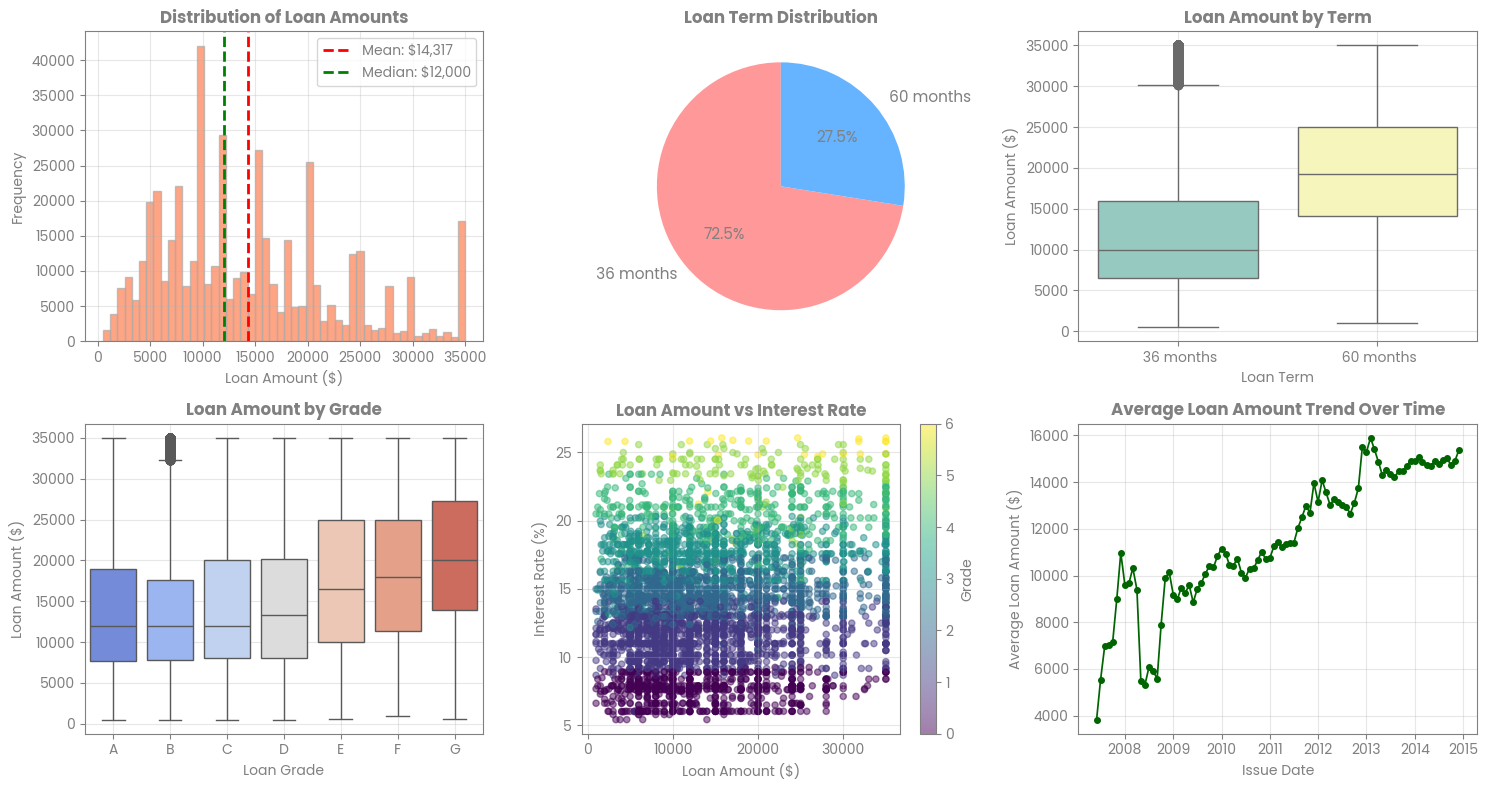

In [ ]:
# LOAN AMOUNT & TERM PATTERNS
print("LOAN AMOUNT & TERM PATTERNS")

print(f"\nLoan Amount Statistics:")
print(f"  Mean     : ${df['loan_amnt'].mean():,.2f}")
print(f"  Median   : ${df['loan_amnt'].median():,.2f}")
print(f"  Min      : ${df['loan_amnt'].min():,.2f}")
print(f"  Max      : ${df['loan_amnt'].max():,.2f}")
print(f"  Total    : ${df['loan_amnt'].sum():,.2f}")

# Term distribution
print("\nLoan Term Distribution:")
term_dist = df['term'].value_counts().sort_index()
term_pct = (term_dist / len(df) * 100).round(2)
for term, count in term_dist.items():
    print(f"  {term:12s}: {count:,} loans ({term_pct[term]}%)")

# Amount by term
print("\nAverage Loan Amount by Term:")
amt_by_term = df.groupby('term')['loan_amnt'].agg(['mean', 'median', 'count'])
print(amt_by_term)

# Amount by grade
print("\nAverage Loan Amount by Grade:")
amt_by_grade = df.groupby('grade')['loan_amnt'].agg(['mean', 'median', 'count'])
print(amt_by_grade.round(2))
print()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Loan amount distribution
axes[0, 0].hist(df['loan_amnt'], bins=50, edgecolor='#acacac', alpha=0.7, color='coral')
axes[0, 0].axvline(df['loan_amnt'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["loan_amnt"].mean():,.0f}')
axes[0, 0].axvline(df['loan_amnt'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["loan_amnt"].median():,.0f}')
axes[0, 0].set_xlabel('Loan Amount ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Loan Amounts', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Term distribution pie chart
term_counts = df['term'].value_counts()
colors_term = ['#ff9999', '#66b3ff']
axes[0, 1].pie(term_counts.values, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_term, textprops={'fontsize': 11, 'color':'#808080'})
axes[0, 1].set_title('Loan Term Distribution', fontsize=12, fontweight='bold')

# Boxplot amount by term
sns.boxplot(data=df, x='term', y='loan_amnt', ax=axes[0, 2], palette='Set3')
axes[0, 2].set_xlabel('Loan Term')
axes[0, 2].set_ylabel('Loan Amount ($)')
axes[0, 2].set_title('Loan Amount by Term', fontsize=12, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# Amount by grade
sns.boxplot(data=df, x='grade', y='loan_amnt', order=grade_order, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_xlabel('Loan Grade')
axes[1, 0].set_ylabel('Loan Amount ($)')
axes[1, 0].set_title('Loan Amount by Grade', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Scatter: loan amount vs interest rate
scatter_sample = df.sample(min(5000, len(df)))
scatter = axes[1, 1].scatter(scatter_sample['loan_amnt'], scatter_sample['int_rate_num'], c=scatter_sample['grade'].astype('category').cat.codes, cmap='viridis', alpha=0.5, s=20)
axes[1, 1].set_xlabel('Loan Amount ($)')
axes[1, 1].set_ylabel('Interest Rate (%)')
axes[1, 1].set_title('Loan Amount vs Interest Rate', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[1, 1])
cbar.set_label('Grade')

# Average loan amount over time
amt_time = df.groupby(df['issue_date'].dt.to_period('M'))['loan_amnt'].mean().reset_index()
amt_time['issue_date'] = amt_time['issue_date'].dt.to_timestamp()
axes[1, 2].plot(amt_time['issue_date'], amt_time['loan_amnt'], marker='o', linewidth=1.25, markersize=4, color='darkgreen')
axes[1, 2].set_xlabel('Issue Date')
axes[1, 2].set_ylabel('Average Loan Amount ($)')
axes[1, 2].set_title('Average Loan Amount Trend Over Time', fontsize=12, fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=0)
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

LOAN PURPOSE ANALYSIS

Loan Purposes:
   1. debt_consolidation       : 274,195 loans (58.80%)
   2. credit_card              : 104,157 loans (22.34%)
   3. home_improvement         : 26,537 loans ( 5.69%)
   4. other                    : 23,690 loans ( 5.08%)
   5. major_purchase           :  9,828 loans ( 2.11%)
   6. small_business           :  7,013 loans ( 1.50%)
   7. car                      :  5,397 loans ( 1.16%)
   8. medical                  :  4,602 loans ( 0.99%)
   9. moving                   :  2,994 loans ( 0.64%)
  10. vacation                 :  2,487 loans ( 0.53%)
  11. wedding                  :  2,343 loans ( 0.50%)
  12. house                    :  2,269 loans ( 0.49%)
  13. educational              :    422 loans ( 0.09%)
  14. renewable_energy         :    351 loans ( 0.08%)

Loan Characteristics by Purpose:
                    Avg_Amount   Count  Avg_Rate
purpose                                         
debt_consolidation    15129.76  274195     14.12
credit_ca

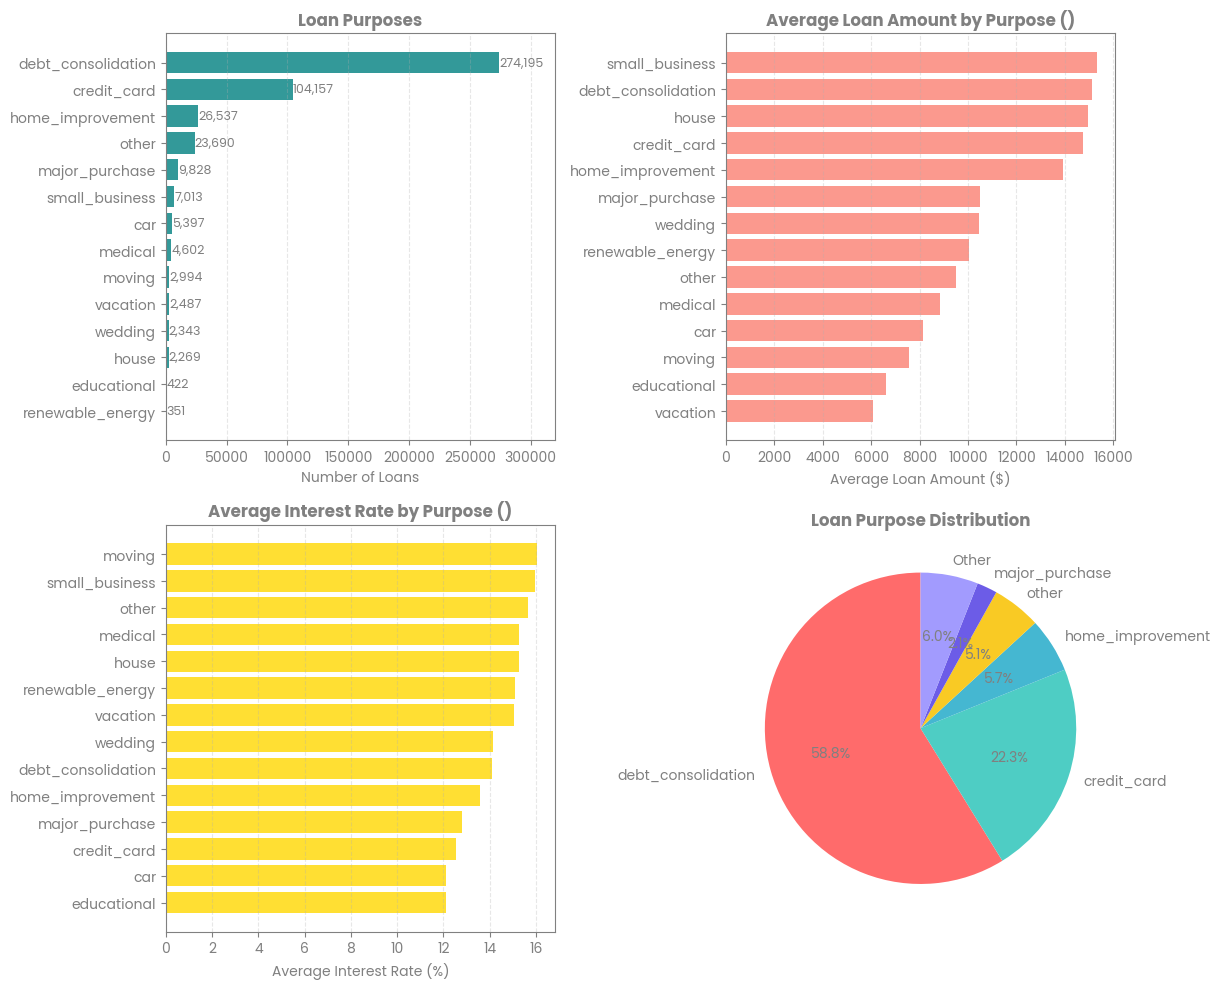

In [ ]:
# LOAN PURPOSE ANALYSIS
print("LOAN PURPOSE ANALYSIS")

# Purpose distribution
purpose_dist = df['purpose'].value_counts().head(15)
purpose_pct = (purpose_dist / len(df) * 100).round(2)

print("\nLoan Purposes:")
for i, (purpose, count) in enumerate(purpose_dist.items(), 1):
    print(f"  {i:2d}. {purpose:25s}: {count:6,} loans ({purpose_pct[purpose]:5.2f}%)")

# Amount and interest rate by purpose
print("\nLoan Characteristics by Purpose:")
purpose_stats = df.groupby('purpose').agg({
    'loan_amnt': ['mean', 'count'],
    'int_rate_num': 'mean'
}).round(2)
purpose_stats.columns = ['Avg_Amount', 'Count', 'Avg_Rate']
purpose_stats = purpose_stats.sort_values('Count', ascending=False)
print(purpose_stats)
print()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#  purposes
top_purposes = df['purpose'].value_counts()
axes[0, 0].barh(range(len(top_purposes)), top_purposes.values, color='teal', alpha=0.8)
axes[0, 0].set_yticks(range(len(top_purposes)))
axes[0, 0].set_yticklabels(top_purposes.index)
axes[0, 0].set_xlabel('Number of Loans')
axes[0, 0].set_title('Loan Purposes', fontsize=12, fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(True, alpha=0.3, axis='x', linestyle='--')
axes[0, 0].set_xlim(0, 320_000)

for i, v in enumerate(top_purposes.values):
    axes[0, 0].text(v + 50, i, f'{v:,}', va='center', fontsize=9, color='#808080')

# Average amount by purpose ()
top_10_purposes = df['purpose'].value_counts().index
purpose_amt = df[df['purpose'].isin(top_10_purposes)].groupby('purpose')['loan_amnt'].mean().sort_values(ascending=False)
axes[0, 1].barh(range(len(purpose_amt)), purpose_amt.values, color='salmon', alpha=0.8)
axes[0, 1].set_yticks(range(len(purpose_amt)))
axes[0, 1].set_yticklabels(purpose_amt.index)
axes[0, 1].set_xlabel('Average Loan Amount ($)')
axes[0, 1].set_title('Average Loan Amount by Purpose ()', fontsize=12, fontweight='bold')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(True, alpha=0.3, axis='x', linestyle='--')

# Average interest rate by purpose
purpose_rate = df[df['purpose'].isin(top_10_purposes)].groupby('purpose')['int_rate_num'].mean().sort_values(ascending=False)
axes[1, 0].barh(range(len(purpose_rate)), purpose_rate.values, color='gold', alpha=0.8)
axes[1, 0].set_yticks(range(len(purpose_rate)))
axes[1, 0].set_yticklabels(purpose_rate.index)
axes[1, 0].set_xlabel('Average Interest Rate (%)')
axes[1, 0].set_title('Average Interest Rate by Purpose ()', fontsize=12, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(True, alpha=0.3, axis='x', linestyle='--')

# Purpose distribution pie chart
top_5_purposes = df['purpose'].value_counts().head(5)
other_count = df['purpose'].value_counts()[5:].sum()
purpose_pie = pd.concat([top_5_purposes, pd.Series({'Other': other_count})])

colors_purpose = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24', '#6c5ce7', '#a29bfe']
axes[1, 1].pie(purpose_pie.values, labels=purpose_pie.index, autopct='%1.1f%%', startangle=90, colors=colors_purpose, textprops={'fontsize': 10, 'color':'#808080'})
axes[1, 1].set_title('Loan Purpose Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

INSTALLMENT (MONTHLY PAYMENT) ANALYSIS

Monthly Installment Statistics:
  Mean     : $432.06
  Median   : $379.89
  Min      : $15.67
  Max      : $1,409.99

Average Installment by Term:
             mean  median    min      max
term                                     
36 months  408.11  342.78  15.67  1409.99
60 months  495.14  468.59  19.87  1049.17



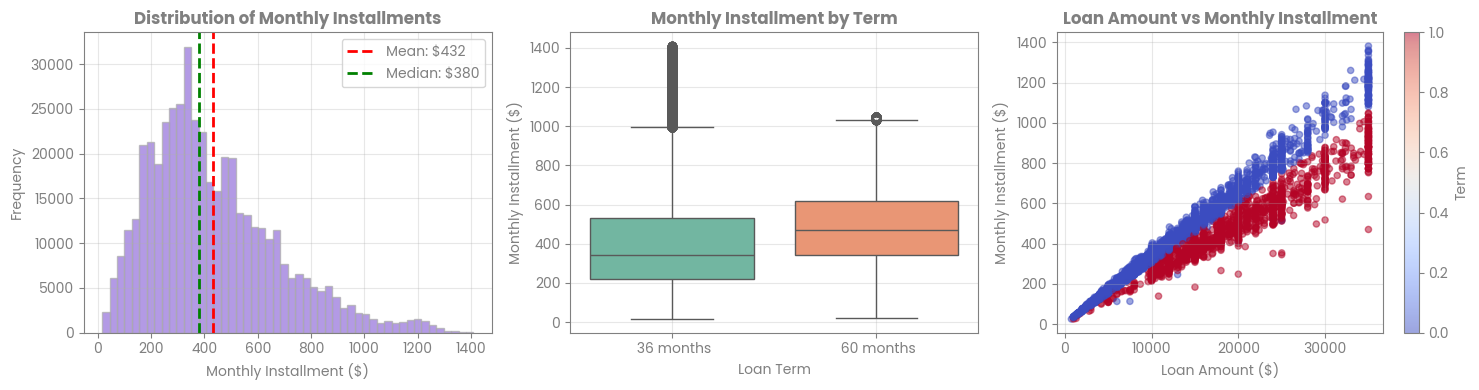

In [ ]:
# INSTALLMENT ANALYSIS
print("INSTALLMENT (MONTHLY PAYMENT) ANALYSIS")

print(f"\nMonthly Installment Statistics:")
print(f"  Mean     : ${df['installment'].mean():,.2f}")
print(f"  Median   : ${df['installment'].median():,.2f}")
print(f"  Min      : ${df['installment'].min():,.2f}")
print(f"  Max      : ${df['installment'].max():,.2f}")

# Installment by term
print("\nAverage Installment by Term:")
inst_by_term = df.groupby('term')['installment'].agg(['mean', 'median', 'min', 'max'])
print(inst_by_term.round(2))
print()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Installment distribution
axes[0].hist(df['installment'], bins=50, edgecolor='#acacac', alpha=0.7, color='mediumpurple')
axes[0].axvline(df['installment'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["installment"].mean():,.0f}')
axes[0].axvline(df['installment'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["installment"].median():,.0f}')
axes[0].set_xlabel('Monthly Installment ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Monthly Installments', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Installment by term
sns.boxplot(data=df, x='term', y='installment', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Loan Term')
axes[1].set_ylabel('Monthly Installment ($)')
axes[1].set_title('Monthly Installment by Term', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Scatter: amount vs installment
scatter_sample = df.sample(min(5000, len(df)))
scatter = axes[2].scatter(scatter_sample['loan_amnt'], scatter_sample['installment'], c=scatter_sample['term'].astype('category').cat.codes, cmap='coolwarm', alpha=0.5, s=20)
axes[2].set_xlabel('Loan Amount ($)')
axes[2].set_ylabel('Monthly Installment ($)')
axes[2].set_title('Loan Amount vs Monthly Installment', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[2])
cbar.set_label('Term')

plt.tight_layout()
plt.show()

#### **Risk-Based Pricing Effectiveness**
The platform demonstrates well-calibrated risk-based pricing with 350 basis points spread between consecutive grades (A: 7.54% → G: 24.84%), creating a clear 4.6x rate differential across the risk spectrum. Grade boundaries show tight clustering—median rates within each grade vary by only 15-50 basis points from the mean—indicating consistent pricing execution. However, the minimum rate of 6.00% appears across grades B through F, suggesting either promotional pricing or legacy loans that predate current risk frameworks, potentially creating adverse selection where safest borrowers within risky grades lock in rates below their true risk level.

#### **Term Structure Creates Dual Product Lines**
The portfolio effectively operates as two distinct products: 36-month loans (72.5% of volume) averaging \$12,209 at 12.64% serve as the core offering for middle-market borrowers, while 60-month loans represent a premium product for stretched borrowers taking 63% larger amounts (\$19,869) at 340 bps higher rates (16.96%). This bifurcation is rational—longer terms offset higher payment risk, but also concentrate \$2.6B (39% of total portfolio value) in extended-maturity high-risk loans despite representing only 27.5% of loan count. The 60-month median loan of \$19,225 approaches the portfolio's 75th percentile, indicating these borrowers are selecting maximum available loan sizes.

#### **Purpose-Based Pricing Reveals Risk Perception Gaps**
Despite debt consolidation dominating at 58.8% of volume, its average rate of 14.12% sits in the middle of the range, not reflecting the inherent refinancing risk where borrowers already demonstrated credit stress. More concerning, small business loans command only 15.98% rates despite financing ventures with high failure rates—this 140 bps premium over debt consolidation seems insufficient for entrepreneurial risk. In contrast, seemingly safer purposes show rate anomalies: moving (16.03%) and vacation (15.06%) loans carry rates comparable to small business, suggesting behavioral risk pricing where discretionary/unstable purposes face penalties regardless of borrower creditworthiness. The platform appears to price purpose risk separately from credit risk.

#### **Payment Burden Analysis Reveals Affordability Stress**
Monthly installments averaging \$432 (median \$379) represent approximately 8.2% of median borrower income (\$63,000 annual = \$5,250 monthly), which appears manageable. However, 60-month borrowers face 21% higher payments (\$495 vs \$408) despite already carrying elevated DTI (18.39% vs 16.77%), meaning their total debt service likely exceeds 25% of gross income when including existing obligations. The maximum installment of \$1,410 could consume 27% of median income, indicating some borrowers operate at extreme leverage. This payment-to-income ratio becomes critical during economic stress when income volatility increases.

#### **Strategic Implications**
1. **Rate Floor Review**: Investigate 6.00% minimum rates in grades B-F, ensure no systematic mispricing of best-in-grade borrowers
2. **Term-Based Capital Allocation**: 60-month loans punch above their weight in dollar exposure (39% of value, 27.5% of count), require higher capital reserves
3. **Purpose Risk Recalibration**: Small business rates appear underpriced relative to default risk; consider higher floors or tighter underwriting
4. **Payment Shock Monitoring**: 60-month cohort's elevated payment burden warrants enhanced delinquency tracking, early warning system for payment stress

### **2.4. Risk Analysis**

In [ ]:
# DATA PREPARATION FOR RISK ANALYSIS
print("DATA PREPARATION")

default_status = ['Charged Off', 'Default', 'Late (31-120 days)']
non_default_status = ['Fully Paid', 'Current']

df_risk = df[df['loan_status'].isin(default_status + non_default_status)].copy()
df_risk['is_default'] = df_risk['loan_status'].isin(default_status).astype(int)

print(f"\nTotal loans for analysis: {len(df_risk):,}")
print(f"Default loans: {df_risk['is_default'].sum():,}")
print(f"Non-default loans: {(df_risk['is_default']==0).sum():,}")
print(f"Overall Default Rate: {df_risk['is_default'].mean()*100:.2f}%")

DATA PREPARATION

Total loans for analysis: 459,172
Default loans: 50,207
Non-default loans: 408,965
Overall Default Rate: 10.93%


DEFAULT RATE BY LOAN STATUS

Loan Status Distribution:
loan_status
Current               224226
Fully Paid            184739
Charged Off            42475
Late (31-120 days)      6900
Default                  832
Name: count, dtype: int64



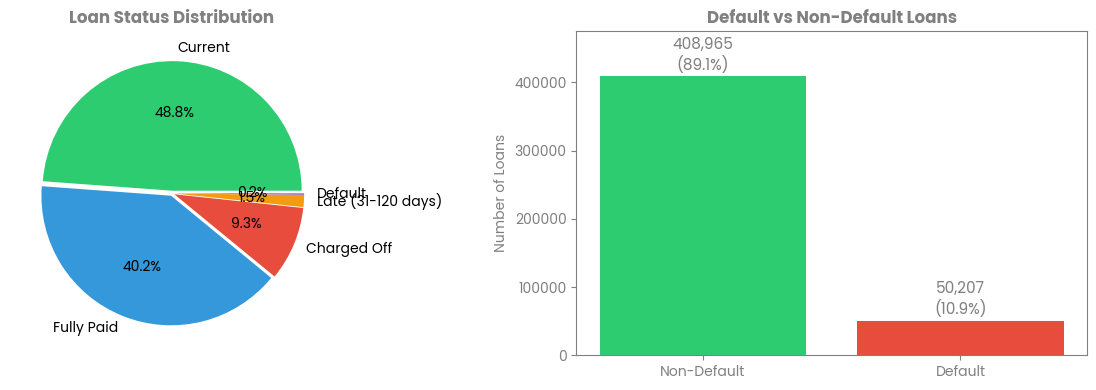

In [ ]:
# DEFAULT RATE ANALYSIS BY LOAN STATUS
print("DEFAULT RATE BY LOAN STATUS")

status_dist = df_risk['loan_status'].value_counts()
print("\nLoan Status Distribution:")
print(status_dist)
print()

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart - Status distribution
colors_pie = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']
axes[0].pie(status_dist.values, labels=status_dist.index, autopct='%1.1f%%', colors=colors_pie[:len(status_dist)], explode=[0.02]*len(status_dist))
axes[0].set_title('Loan Status Distribution', fontweight='bold')

# Bar chart - Default vs Non-Default
default_counts = df_risk['is_default'].value_counts()
bars = axes[1].bar(['Non-Default', 'Default'], default_counts.values, color=['#2ecc71', '#e74c3c'], linewidth=1.2)
axes[1].set_title('Default vs Non-Default Loans', fontweight='bold')
axes[1].set_ylabel('Number of Loans')
axes[1].set_ylim(0, 475_000)
for bar, val in zip(bars, default_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10_000, f'{val:,}\n({val/len(df_risk)*100:.1f}%)', ha='center', fontsize=11, color='#808080')

plt.tight_layout()
plt.show()

DEFAULT RATE BY LOAN GRADE

Default Rate by Grade:
       total_loans  default_count  default_rate  avg_int_rate  avg_loan_amt
grade                                                                      
A            74535           2889        0.0388        7.5372    13404.2923
B           135645          10674        0.0787       11.5048    13124.9524
C           123405          14236        0.1154       14.6434    14215.1307
D            75200          11651        0.1549       17.5680    15109.9172
E            34604           6806        0.1967       20.5600    17653.2034
F            12723           3099        0.2436       23.6685    18521.9917
G             3060            852        0.2784       25.1955    21131.5523



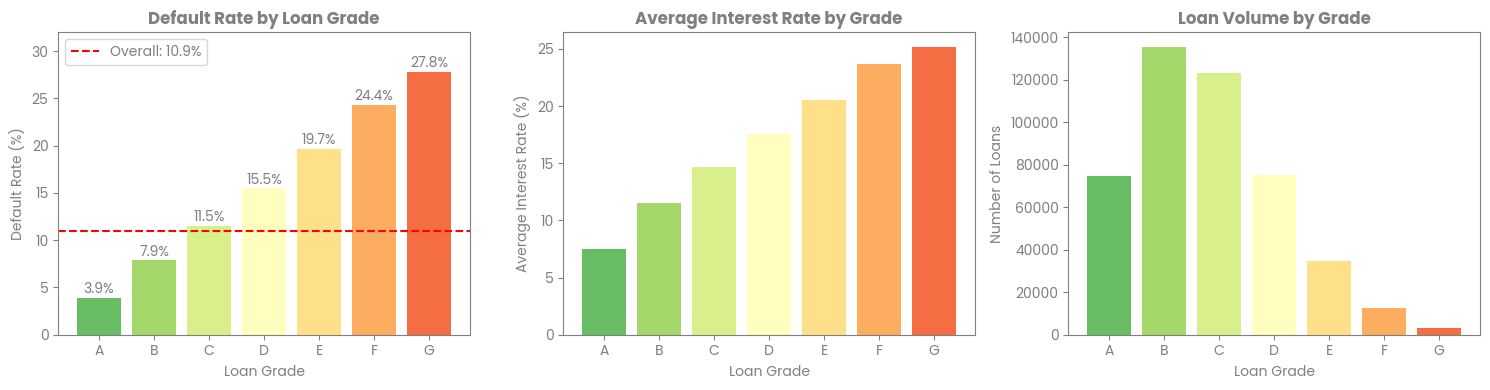

In [ ]:
# DEFAULT RATE BY LOAN GRADE
print("DEFAULT RATE BY LOAN GRADE")

grade_default = df_risk.groupby('grade').agg(
    total_loans=('is_default', 'count'),
    default_count=('is_default', 'sum'),
    default_rate=('is_default', 'mean'),
    avg_int_rate=('int_rate', 'mean'),
    avg_loan_amt=('loan_amnt', 'mean')
).round(4)
grade_default = grade_default.sort_index()

print("\nDefault Rate by Grade:")
print(grade_default)
print()

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Default rate by grade
colors_grade = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(grade_default)))
bars1 = axes[0].bar(grade_default.index, grade_default['default_rate']*100, color=colors_grade, linewidth=1)
axes[0].set_xlabel('Loan Grade')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Loan Grade', fontweight='bold')
axes[0].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()
axes[0].set_ylim(0, 32)
for bar, rate in zip(bars1, grade_default['default_rate']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{rate*100:.1f}%', ha='center', fontsize=10, color='#808080')

# Interest rate by grade
axes[1].bar(grade_default.index, grade_default['avg_int_rate'], color=colors_grade, linewidth=1)
axes[1].set_xlabel('Loan Grade')
axes[1].set_ylabel('Average Interest Rate (%)')
axes[1].set_title('Average Interest Rate by Grade', fontweight='bold')

# Loan count by grade
axes[2].bar(grade_default.index, grade_default['total_loans'], color=colors_grade, linewidth=1)
axes[2].set_xlabel('Loan Grade')
axes[2].set_ylabel('Number of Loans')
axes[2].set_title('Loan Volume by Grade', fontweight='bold')

plt.tight_layout()
plt.show()

DEFAULT RATE BY SUB-GRADE

Top 10 Highest Default Rate Sub-Grades:
           default_rate  loan_count
sub_grade                          
G1             0.296296        1053
F5             0.293711        1447
G3             0.287293         543
G5             0.285714         322
G2             0.266753         776
F4             0.254518        1992
F3             0.252017        2603
F2             0.235090        2884
G4             0.232240         366
E5             0.224486        4909


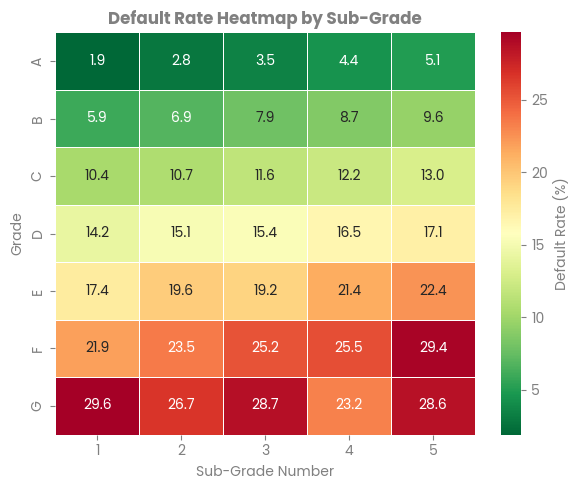

In [ ]:
# DEFAULT RATE BY SUB-GRADE (Heatmap)
print("DEFAULT RATE BY SUB-GRADE")

subgrade_default = df_risk.groupby('sub_grade')['is_default'].agg(['mean', 'count'])
subgrade_default.columns = ['default_rate', 'loan_count']
subgrade_default = subgrade_default.sort_index()

print("\nTop 10 Highest Default Rate Sub-Grades:")
print(subgrade_default.nlargest(10, 'default_rate'))

# Reshape untuk heatmap
subgrade_default['grade'] = subgrade_default.index.str[0]
subgrade_default['sub'] = subgrade_default.index.str[1]

pivot_default = subgrade_default.pivot(index='grade', columns='sub', values='default_rate')

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(pivot_default * 100, annot=True, fmt='.1f', cmap='RdYlGn_r', linewidths=0.5, ax=ax, cbar_kws={'label': 'Default Rate (%)'})
ax.set_title('Default Rate Heatmap by Sub-Grade', fontweight='bold')
ax.set_xlabel('Sub-Grade Number')
ax.set_ylabel('Grade')
plt.tight_layout()
plt.show()

DEFAULT RATE BY INCOME SEGMENTS

Default Rate by Income Segment:
                total_loans  default_rate  avg_loan_amt
income_segment                                         
<30K                  34343        0.1472     6497.2891
30-50K               120697        0.1311    10513.3429
50-75K               143720        0.1105    14208.2835
75-100K               83894        0.0908    17481.7514
100-150K              56283        0.0779    19849.8054
>150K                 20235        0.0713    22890.8265



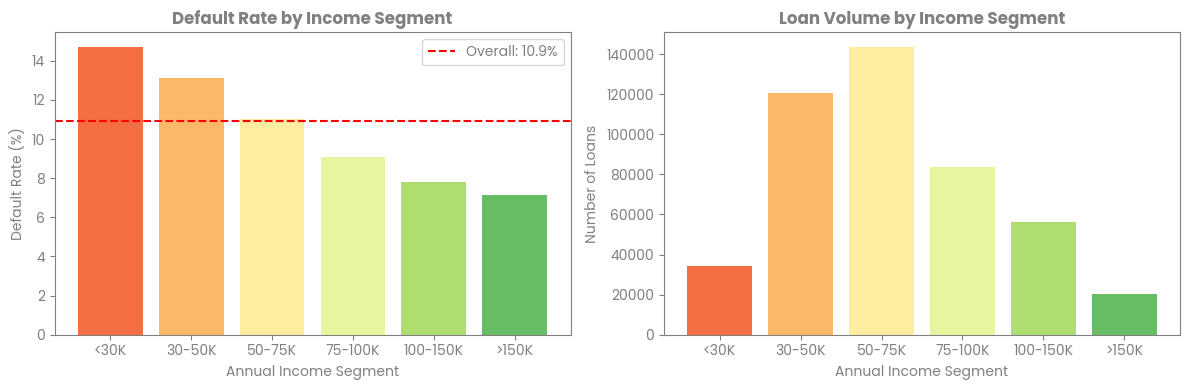

In [ ]:
# DEFAULT RATE BY INCOME SEGMENTS
print("DEFAULT RATE BY INCOME SEGMENTS")

df_risk['income_segment'] = pd.cut(df_risk['annual_inc'], bins=[0, 30000, 50000, 75000, 100000, 150000, np.inf], labels=['<30K', '30-50K', '50-75K', '75-100K', '100-150K', '>150K'])
income_default = df_risk.groupby('income_segment').agg(total_loans=('is_default', 'count'), default_rate=('is_default', 'mean'), avg_loan_amt=('loan_amnt', 'mean')).round(4)

print("\nDefault Rate by Income Segment:")
print(income_default)
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Default rate by income
colors_income = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(income_default)))
bars2 = axes[0].bar(income_default.index.astype(str), income_default['default_rate']*100, color=colors_income, linewidth=1)
axes[0].set_xlabel('Annual Income Segment')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Income Segment', fontweight='bold')
axes[0].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=0)

# Loan count by income
axes[1].bar(income_default.index.astype(str), income_default['total_loans'], color=colors_income, linewidth=1)
axes[1].set_xlabel('Annual Income Segment')
axes[1].set_ylabel('Number of Loans')
axes[1].set_title('Loan Volume by Income Segment', fontweight='bold')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

DEFAULT RATE BY DTI RATIO

Default Rate by DTI Segment:
             total_loans  default_rate
dti_segment                           
0-10               89638        0.0879
10-15              99975        0.0969
15-20             104231        0.1094
20-25              84747        0.1245
25-30              52621        0.1319
>30                27621        0.1339



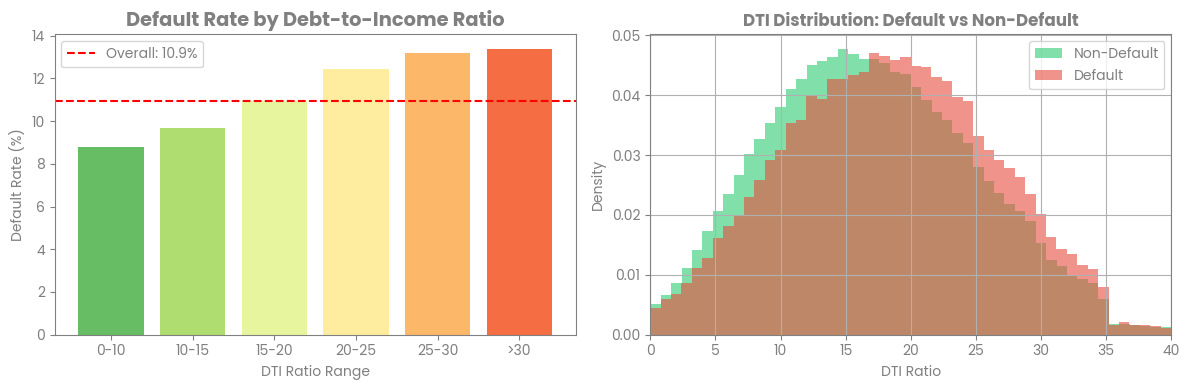

In [ ]:
# DEFAULT RATE BY DTI (Debt-to-Income Ratio)
print("DEFAULT RATE BY DTI RATIO")

df_risk['dti_segment'] = pd.cut(df_risk['dti'], bins=[0, 10, 15, 20, 25, 30, np.inf], labels=['0-10', '10-15', '15-20', '20-25', '25-30', '>30'])
dti_default = df_risk.groupby('dti_segment').agg(total_loans=('is_default', 'count'), default_rate=('is_default', 'mean')).round(4)

print("\nDefault Rate by DTI Segment:")
print(dti_default)
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors_dti = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(dti_default)))
bars3 = axes[0].bar(dti_default.index.astype(str), dti_default['default_rate']*100, color=colors_dti, linewidth=1)
axes[0].set_xlabel('DTI Ratio Range')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Debt-to-Income Ratio', fontsize=14, fontweight='bold')
axes[0].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()

# Distribution of DTI for Default vs Non-Default
df_risk[df_risk['is_default']==0]['dti'].hist(ax=axes[1], bins=50, alpha=0.6, label='Non-Default', color='#2ecc71', density=True)
df_risk[df_risk['is_default']==1]['dti'].hist(ax=axes[1], bins=50, alpha=0.6, label='Default', color='#e74c3c', density=True)
axes[1].set_xlabel('DTI Ratio')
axes[1].set_ylabel('Density')
axes[1].set_title('DTI Distribution: Default vs Non-Default', fontweight='bold')
axes[1].legend()
axes[1].set_xlim(0, 40)

plt.tight_layout()
plt.show()

DEFAULT RATE BY LOAN PURPOSE

Default Rate by Loan Purpose:
                    total_loans  default_rate  avg_loan_amt
purpose                                                    
small_business             6775        0.2127    15325.8635
educational                 325        0.1723     6810.4615
renewable_energy            345        0.1536    10038.4058
moving                     2925        0.1511     7565.6496
house                      2203        0.1394    15109.9637
other                     23054        0.1365     9555.0729
medical                    4504        0.1319     8883.4092
wedding                    2284        0.1191    10539.9628
vacation                   2441        0.1176     6065.4547
debt_consolidation       270352        0.1138    15135.2013
home_improvement          26063        0.0972    13920.0677
major_purchase             9618        0.0952    10504.3486
car                        5310        0.0881     8123.0132
credit_card              102973        0

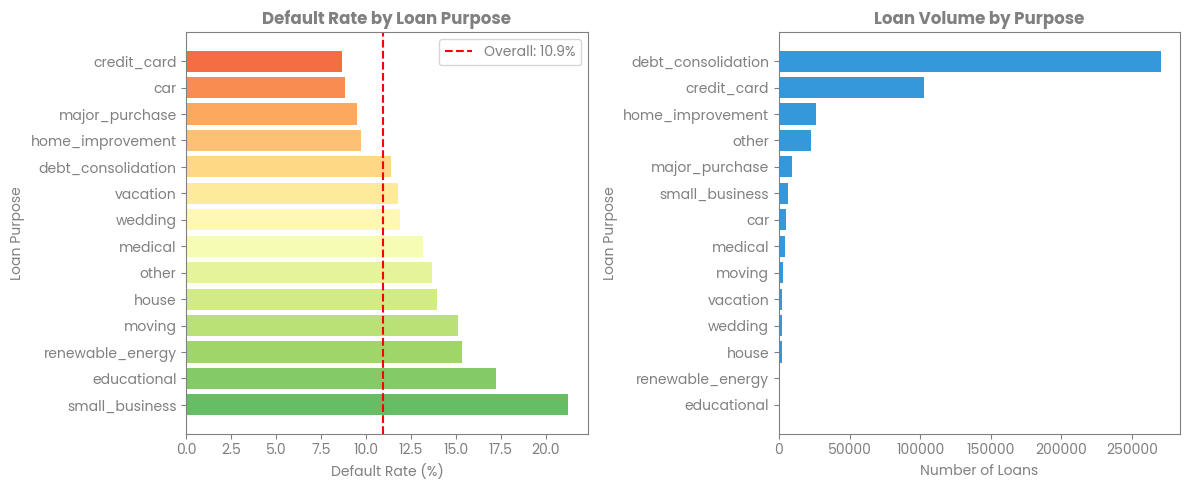

In [ ]:
# DEFAULT RATE BY LOAN PURPOSE
print("DEFAULT RATE BY LOAN PURPOSE")

purpose_default = df_risk.groupby('purpose').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    avg_loan_amt=('loan_amnt', 'mean')
).sort_values('default_rate', ascending=False).round(4)

print("\nDefault Rate by Loan Purpose:")
print(purpose_default)
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Default rate by purpose
colors_purpose = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(purpose_default)))
bars4 = axes[0].barh(purpose_default.index, purpose_default['default_rate']*100, color=colors_purpose, linewidth=0.5)
axes[0].set_xlabel('Default Rate (%)')
axes[0].set_ylabel('Loan Purpose')
axes[0].set_title('Default Rate by Loan Purpose', fontweight='bold')
axes[0].axvline(x=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()

# Loan count by purpose (sorted by count)
purpose_by_count = purpose_default.sort_values('total_loans', ascending=True)
axes[1].barh(purpose_by_count.index, purpose_by_count['total_loans'], color='#3498db', linewidth=0.5)
axes[1].set_xlabel('Number of Loans')
axes[1].set_ylabel('Loan Purpose')
axes[1].set_title('Loan Volume by Purpose', fontweight='bold')

plt.tight_layout()
plt.show()

DEFAULT RATE BY LOAN TERM

Default Rate by Loan Term:
           total_loans  default_rate  avg_int_rate  avg_loan_amt
term                                                            
36 months       332767        0.0966       12.6157    12225.9373
60 months       126405        0.1428       16.9467    19878.2319



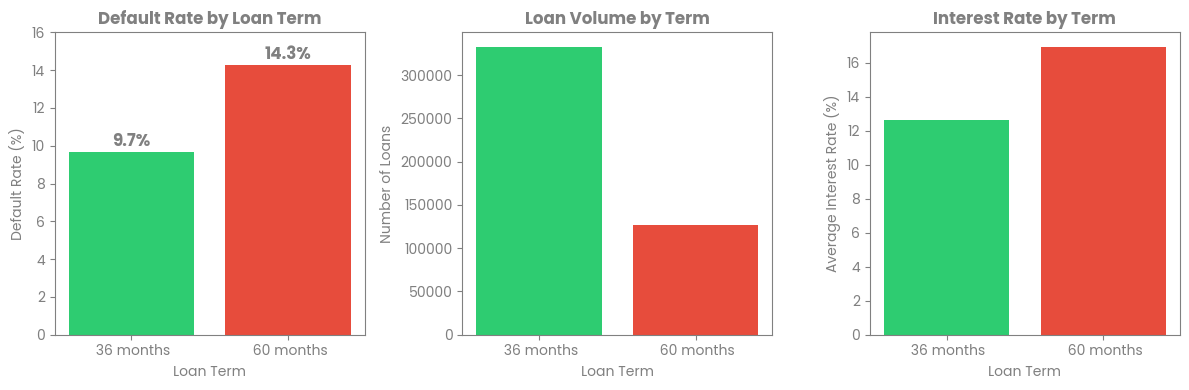

In [ ]:
# DEFAULT RATE BY LOAN TERM
print("DEFAULT RATE BY LOAN TERM")

term_default = df_risk.groupby('term').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    avg_int_rate=('int_rate', 'mean'),
    avg_loan_amt=('loan_amnt', 'mean')
).round(4)

print("\nDefault Rate by Loan Term:")
print(term_default)
print()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Default rate by term
colors_term = ['#2ecc71', '#e74c3c']
bars5 = axes[0].bar(term_default.index, term_default['default_rate']*100, color=colors_term, linewidth=1.5)
axes[0].set_xlabel('Loan Term')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Loan Term', fontweight='bold')
axes[0].set_ylim(0, 16)
for bar, rate in zip(bars5, term_default['default_rate']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{rate*100:.1f}%', ha='center', fontsize=12, fontweight='bold', color='#808080')

# Loan count by term
axes[1].bar(term_default.index, term_default['total_loans'], color=colors_term, linewidth=1.5)
axes[1].set_xlabel('Loan Term')
axes[1].set_ylabel('Number of Loans')
axes[1].set_title('Loan Volume by Term', fontweight='bold')

# Average interest rate by term
axes[2].bar(term_default.index, term_default['avg_int_rate'], color=colors_term, linewidth=1.5)
axes[2].set_xlabel('Loan Term')
axes[2].set_ylabel('Average Interest Rate (%)')
axes[2].set_title('Interest Rate by Term', fontweight='bold')

plt.tight_layout()
plt.show()

DEFAULT RATE BY HOME OWNERSHIP

Default Rate by Home Ownership:
                total_loans  default_rate  avg_income
home_ownership                                       
OTHER                   144        0.1875  68374.1806
NONE                     45        0.1556  63552.2444
RENT                 185351        0.1263  62289.3089
OWN                   41080        0.1087  65752.9945
MORTGAGE             232551        0.0959  83385.8485
ANY                       1        0.0000  35680.0000



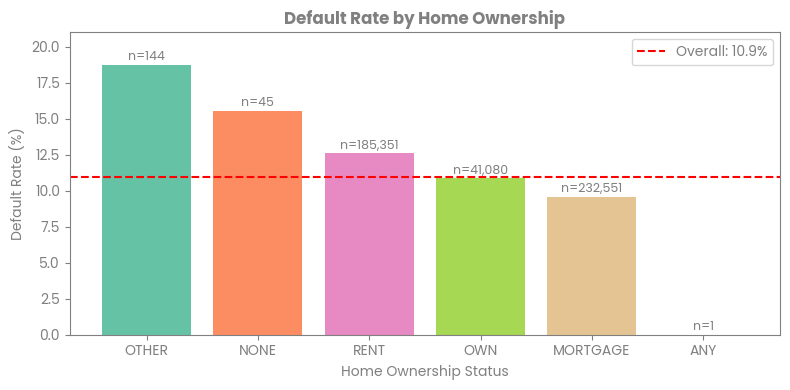

In [ ]:
# DEFAULT RATE BY HOME OWNERSHIP
print("DEFAULT RATE BY HOME OWNERSHIP")

home_default = df_risk.groupby('home_ownership').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    avg_income=('annual_inc', 'mean')
).sort_values('default_rate', ascending=False).round(4)

print("\nDefault Rate by Home Ownership:")
print(home_default)
print()

fig, ax = plt.subplots(figsize=(8, 4))

colors_home = plt.cm.Set2(np.linspace(0, 1, len(home_default)))
bars6 = ax.bar(home_default.index, home_default['default_rate']*100, color=colors_home, linewidth=1)
ax.set_xlabel('Home Ownership Status')
ax.set_ylabel('Default Rate (%)')
ax.set_title('Default Rate by Home Ownership', fontweight='bold')
ax.axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
ax.legend()
ax.set_ylim(0, 21)

for bar, count in zip(bars6, home_default['total_loans']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'n={count:,}', ha='center', fontsize=9, color='#808080')

plt.tight_layout()
plt.show()

DEFAULT RATE BY VERIFICATION STATUS

Default Rate by Verification Status:
                     total_loans  default_rate  avg_loan_amt
verification_status                                         
Verified                  165735        0.1281    17406.5338
Source Verified           148064        0.1049    15133.9547
Not Verified              145373        0.0924    10011.6984



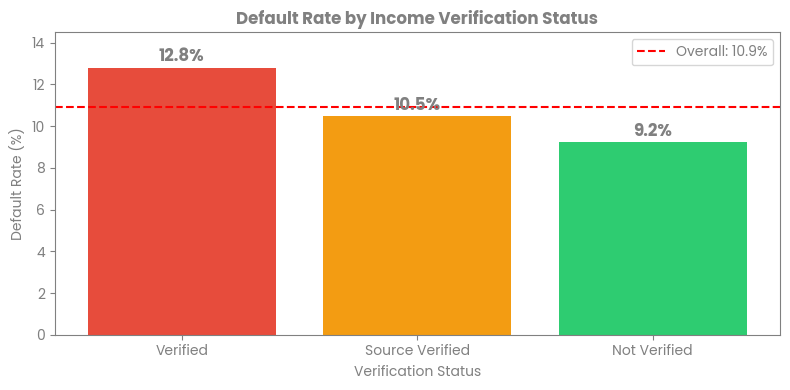

In [ ]:
# DEFAULT RATE BY VERIFICATION STATUS
print("DEFAULT RATE BY VERIFICATION STATUS")

verify_default = df_risk.groupby('verification_status').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    avg_loan_amt=('loan_amnt', 'mean')
).sort_values('default_rate', ascending=False).round(4)

print("\nDefault Rate by Verification Status:")
print(verify_default)
print()

fig, ax = plt.subplots(figsize=(8, 4))

colors_verify = ['#e74c3c', '#f39c12', '#2ecc71']
bars7 = ax.bar(verify_default.index, verify_default['default_rate']*100, color=colors_verify, linewidth=1.5)
ax.set_xlabel('Verification Status')
ax.set_ylabel('Default Rate (%)')
ax.set_title('Default Rate by Income Verification Status', fontweight='bold')
ax.axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
ax.legend()
ax.set_ylim(0, 14.5)

for bar, rate in zip(bars7, verify_default['default_rate']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, f'{rate*100:.1f}%', ha='center', fontsize=12, fontweight='bold', color='#808080')

plt.tight_layout()
plt.show()

CORRELATION ANALYSIS OF RISK FACTORS

Correlation with Default:
is_default        1.000000
int_rate          0.175556
inq_last_6mths    0.065316
revol_util        0.051834
dti               0.050774
installment       0.016579
loan_amnt         0.014571
delinq_2yrs       0.002223
open_acc         -0.004908
pub_rec          -0.008887
revol_bal        -0.020795
total_acc        -0.022292
annual_inc       -0.050359
Name: is_default, dtype: float64



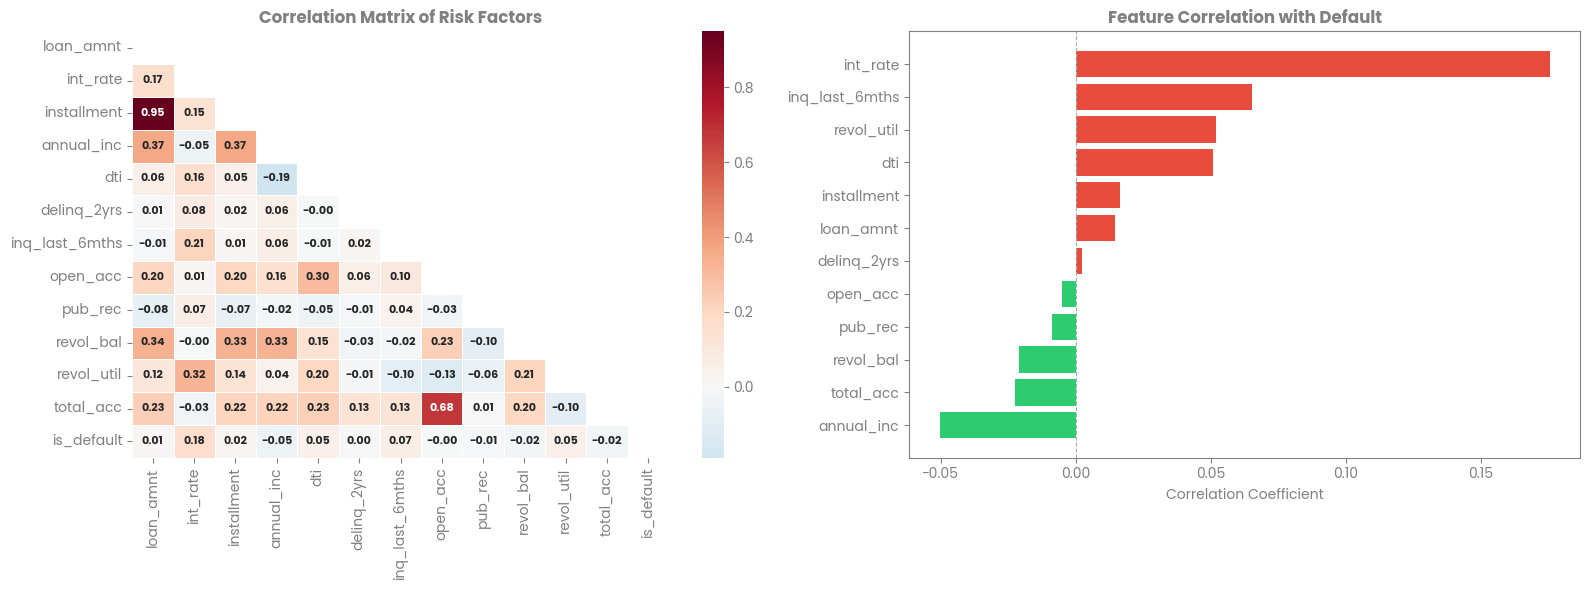

In [ ]:
# MULTIVARIATE ANALYSIS: RISK FACTOR CORRELATION
print("CORRELATION ANALYSIS OF RISK FACTORS")

risk_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'is_default']
corr_df = df_risk[risk_cols].dropna()
correlation = corr_df.corr()

print("\nCorrelation with Default:")
print(correlation['is_default'].sort_values(ascending=False))
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, ax=axes[0], linewidths=0.5, annot_kws={'size': 8, 'fontweight':'bold'})
axes[0].set_title('Correlation Matrix of Risk Factors', fontweight='bold')

corr_with_default = correlation['is_default'].drop('is_default').sort_values()
colors_corr = ['#e74c3c' if x > 0 else '#2ecc71' for x in corr_with_default]
axes[1].barh(corr_with_default.index, corr_with_default.values, color=colors_corr, linewidth=0.5)
axes[1].set_xlabel('Correlation Coefficient')
axes[1].set_title('Feature Correlation with Default', fontweight='bold')
axes[1].axvline(x=0, color='#acacac', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

DEFAULTER vs NON-DEFAULTER PROFILE

Defaulter vs Non-Defaulter Profile:
                Non-Defaulter  Defaulter  Diff (%)
loan_amnt            14290.65   14673.70       2.7
int_rate                13.54      15.99      18.1
annual_inc           74254.70   65392.22     -11.9
dti                     17.08      18.36       7.5
revol_util              55.71      59.65       7.1
inq_last_6mths           0.76       0.98      28.9
delinq_2yrs              0.28       0.29       3.6
open_acc                11.20      11.12      -0.7
pub_rec                  0.16       0.15      -6.3



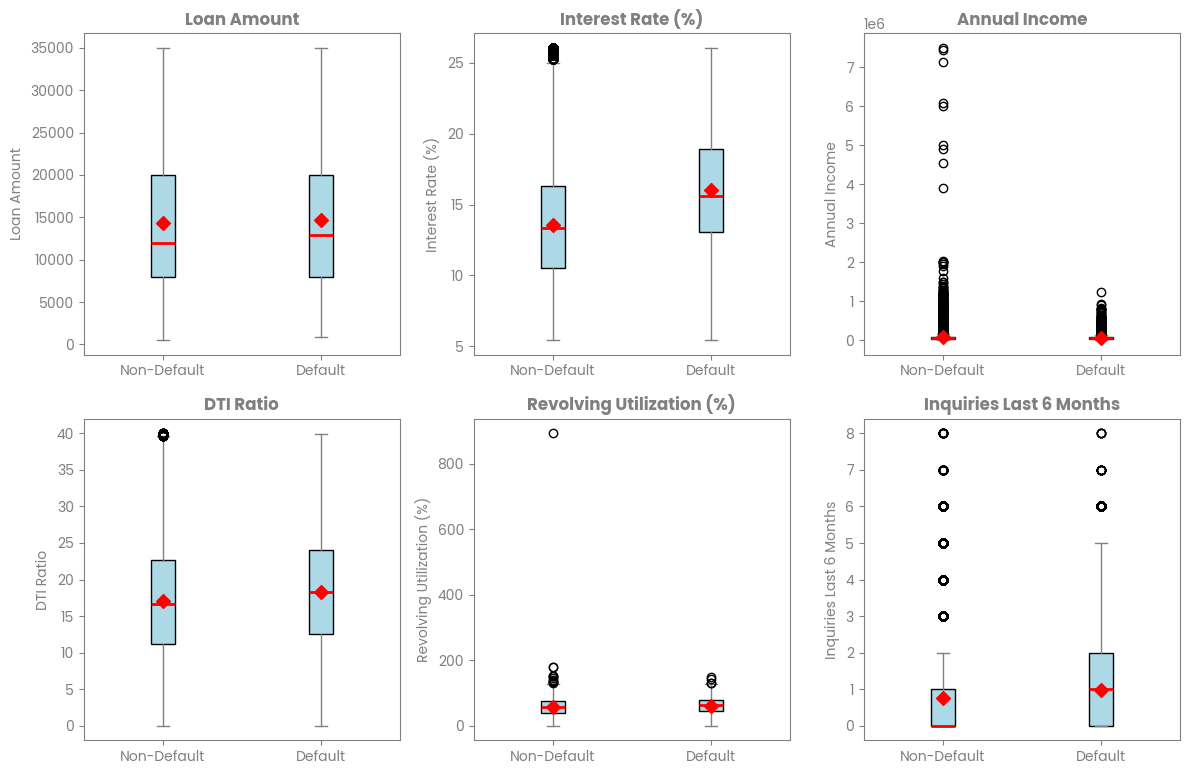

In [ ]:
# DEFAULTER PROFILE: WHAT DIFFERENTIATES THEM?
print("DEFAULTER vs NON-DEFAULTER PROFILE")

# Compare statistics
profile_comparison = df_risk.groupby('is_default').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'annual_inc': 'mean',
    'dti': 'mean',
    'revol_util': 'mean',
    'inq_last_6mths': 'mean',
    'delinq_2yrs': 'mean',
    'open_acc': 'mean',
    'pub_rec': 'mean'
}).round(2)

profile_comparison.index = ['Non-Defaulter', 'Defaulter']
profile_comparison = profile_comparison.T

# Calculate difference
profile_comparison['Diff (%)'] = ((profile_comparison['Defaulter'] - profile_comparison['Non-Defaulter']) / profile_comparison['Non-Defaulter'] * 100).round(1)

print("\nDefaulter vs Non-Defaulter Profile:")
print(profile_comparison)
print()

# Visualisasi
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

compare_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'inq_last_6mths']
titles = ['Loan Amount', 'Interest Rate (%)', 'Annual Income', 'DTI Ratio', 'Revolving Utilization (%)', 'Inquiries Last 6 Months']

for i, (feat, title) in enumerate(zip(compare_features, titles)):
    data_0 = df_risk[df_risk['is_default']==0][feat].dropna()
    data_1 = df_risk[df_risk['is_default']==1][feat].dropna()

    axes[i].boxplot([data_0, data_1], labels=['Non-Default', 'Default'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(title, fontsize=12, fontweight='bold')
    axes[i].set_ylabel(title)

    # Add mean values
    mean_0, mean_1 = data_0.mean(), data_1.mean()
    axes[i].scatter([1, 2], [mean_0, mean_1], color='red', marker='D', s=50, zorder=5, label='Mean')

plt.suptitle('', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

DEFAULT RATE BY EMPLOYMENT LENGTH

Default Rate by Employment Length:
            total_loans  default_rate
emp_length                           
< 1 year          35445        0.1186
1 year            29000        0.1111
2 years           40628        0.1097
3 years           35945        0.1095
4 years           27577        0.1093
5 years           30329        0.1150
6 years           25714        0.1173
7 years           25830        0.1116
8 years           22073        0.1102
9 years           17605        0.1127
10+ years        148223        0.0998



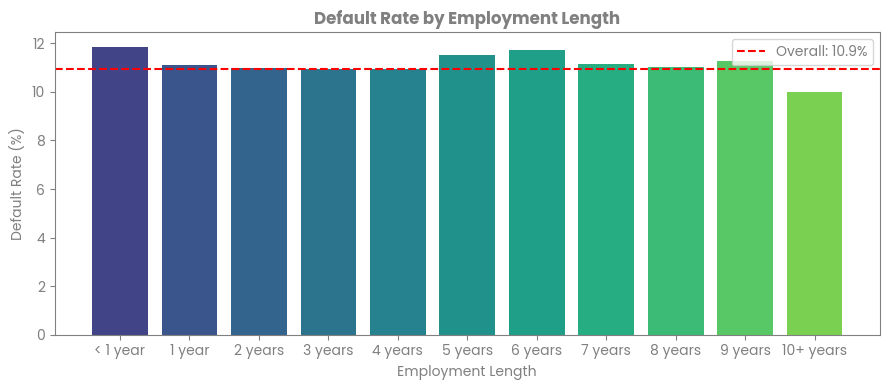

In [ ]:
# DEFAULT RATE BY EMPLOYMENT LENGTH
print("DEFAULT RATE BY EMPLOYMENT LENGTH")

emp_default = df_risk.groupby('emp_length').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean')
).round(4)

emp_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
emp_default = emp_default.reindex([e for e in emp_order if e in emp_default.index])

print("\nDefault Rate by Employment Length:")
print(emp_default)
print()

# Visualisasi
fig, ax = plt.subplots(figsize=(9, 4))

colors_emp = plt.cm.viridis(np.linspace(0.2, 0.8, len(emp_default)))
bars9 = ax.bar(range(len(emp_default)), emp_default['default_rate']*100, color=colors_emp, linewidth=1)
ax.set_xticks(range(len(emp_default)))
ax.set_xticklabels(emp_default.index, rotation=0)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Default Rate (%)')
ax.set_title('Default Rate by Employment Length', fontweight='bold')
ax.axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
ax.legend()

plt.tight_layout()
plt.show()

DEFAULT RATE BY LOAN AMOUNT SEGMENTS

Default Rate by Loan Amount Segment:
                  total_loans  default_rate  avg_int_rate
loan_amt_segment                                         
0-5K                    55722        0.1049       13.7047
5-10K                  127036        0.1046       12.9282
10-15K                 102723        0.1062       13.5741
15-20K                  77286        0.1155       14.0224
20-25K                  47668        0.1126       14.2636
>25K                    48737        0.1205       15.9263



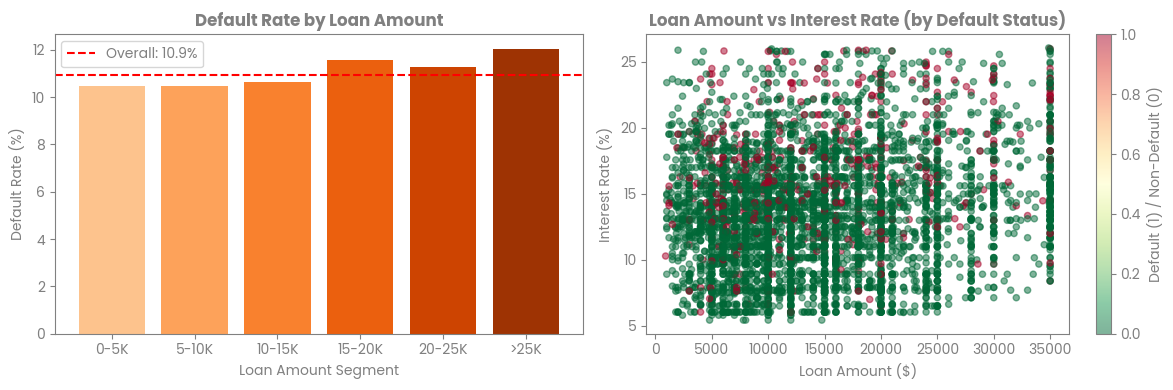

In [ ]:
# DEFAULT RATE BY LOAN AMOUNT SEGMENTS
print("DEFAULT RATE BY LOAN AMOUNT SEGMENTS")

df_risk['loan_amt_segment'] = pd.cut(df_risk['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000, np.inf], labels=['0-5K', '5-10K', '10-15K', '15-20K', '20-25K', '>25K'])

loan_amt_default = df_risk.groupby('loan_amt_segment').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    avg_int_rate=('int_rate', 'mean')
).round(4)

print("\nDefault Rate by Loan Amount Segment:")
print(loan_amt_default)
print()

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors_amt = plt.cm.Oranges(np.linspace(0.3, 0.9, len(loan_amt_default)))
bars10 = axes[0].bar(loan_amt_default.index.astype(str), loan_amt_default['default_rate']*100, color=colors_amt, linewidth=1)
axes[0].set_xlabel('Loan Amount Segment')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Loan Amount', fontweight='bold')
axes[0].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()

# Loan Amount vs Interest Rate
sample = df_risk.sample(min(5000, len(df_risk)), random_state=42)
scatter = axes[1].scatter(sample['loan_amnt'], sample['int_rate'], c=sample['is_default'], cmap='RdYlGn_r', alpha=0.5, s=20)
axes[1].set_xlabel('Loan Amount ($)')
axes[1].set_ylabel('Interest Rate (%)')
axes[1].set_title('Loan Amount vs Interest Rate (by Default Status)', fontweight='bold')
cbar = plt.colorbar(scatter, ax=axes[1])
cbar.set_label('Default (1) / Non-Default (0)')

plt.tight_layout()
plt.show()

DEFAULT RATE BY STATE (TOP & BOTTOM)

Top 10 States with Highest Default Rate (min 100 loans):
            total_loans  default_rate  total_value
addr_state                                        
NV                 6446        0.1362     87499475
HI                 2452        0.1272     36237325
FL                31115        0.1251    419620475
AL                 5741        0.1245     82432250
LA                 5406        0.1175     77782850
NY                39522        0.1175    558212275
OK                 4052        0.1165     58248150
NM                 2547        0.1162     37507250
NC                12512        0.1157    177236050
NJ                17729        0.1150    266304550

Top 10 States with Lowest Default Rate (min 100 loans):
            total_loans  default_rate  total_value
addr_state                                        
DC                 1410        0.0674     20654150
WY                 1118        0.0742     17069800
WV                 2382        0

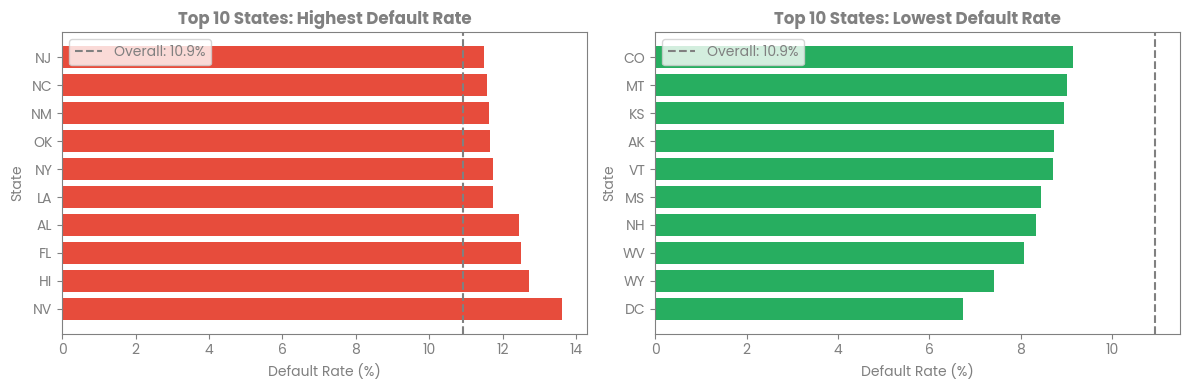

In [ ]:
# DEFAULT RATE BY GEOGRAPHIC (STATE)
print("DEFAULT RATE BY STATE (TOP & BOTTOM)")

state_default = df_risk.groupby('addr_state').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean'),
    total_value=('loan_amnt', 'sum')
).round(4)

state_default_filtered = state_default[state_default['total_loans'] >= 100]

print("\nTop 10 States with Highest Default Rate (min 100 loans):")
print(state_default_filtered.nlargest(10, 'default_rate'))

print("\nTop 10 States with Lowest Default Rate (min 100 loans):")
print(state_default_filtered.nsmallest(10, 'default_rate'))
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Top 10 highest
top10_high = state_default_filtered.nlargest(10, 'default_rate')
bars11 = axes[0].barh(top10_high.index, top10_high['default_rate']*100, color='#e74c3c', linewidth=0.5)
axes[0].set_xlabel('Default Rate (%)')
axes[0].set_ylabel('State')
axes[0].set_title('Top 10 States: Highest Default Rate', fontweight='bold')
axes[0].axvline(x=df_risk['is_default'].mean()*100, color='#808080', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()

# Top 10 lowest
top10_low = state_default_filtered.nsmallest(10, 'default_rate')
bars12 = axes[1].barh(top10_low.index, top10_low['default_rate']*100, color='#27ae60', linewidth=0.5)
axes[1].set_xlabel('Default Rate (%)')
axes[1].set_ylabel('State')
axes[1].set_title('Top 10 States: Lowest Default Rate', fontweight='bold')
axes[1].axvline(x=df_risk['is_default'].mean()*100, color='#808080', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

INTEREST RATE ANALYSIS

Default Rate by Interest Rate Segment:
                  total_loans  default_rate
int_rate_segment                           
<8%                     53486        0.0344
8-12%                  107236        0.0625
12-16%                 168790        0.1073
16-20%                  90323        0.1637
>20%                    39337        0.2227



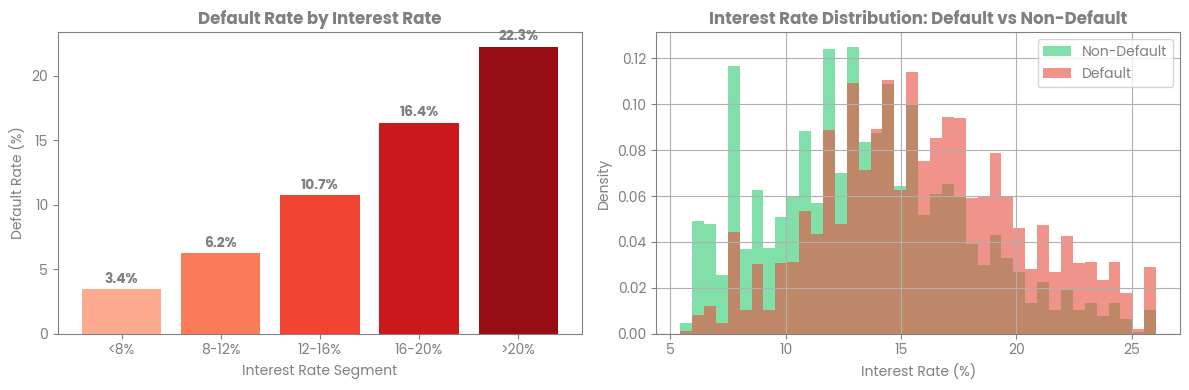

In [ ]:
# INTEREST RATE ANALYSIS
print("INTEREST RATE ANALYSIS")

df_risk['int_rate_segment'] = pd.cut(df_risk['int_rate'], bins=[0, 8, 12, 16, 20, 30], labels=['<8%', '8-12%', '12-16%', '16-20%', '>20%'])
int_rate_default = df_risk.groupby('int_rate_segment').agg(total_loans=('is_default', 'count'), default_rate=('is_default', 'mean')).round(4)

print("\nDefault Rate by Interest Rate Segment:")
print(int_rate_default)
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

colors_int = plt.cm.Reds(np.linspace(0.3, 0.9, len(int_rate_default)))
bars13 = axes[0].bar(int_rate_default.index.astype(str), int_rate_default['default_rate']*100, color=colors_int, linewidth=1)
axes[0].set_xlabel('Interest Rate Segment')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Interest Rate', fontweight='bold')
for bar, rate in zip(bars13, int_rate_default['default_rate']):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{rate*100:.1f}%', ha='center', fontsize=10, fontweight='bold', color='#808080')

# Distribution
df_risk[df_risk['is_default']==0]['int_rate'].hist(ax=axes[1], bins=40, alpha=0.6, label='Non-Default', color='#2ecc71', density=True)
df_risk[df_risk['is_default']==1]['int_rate'].hist(ax=axes[1], bins=40, alpha=0.6, label='Default', color='#e74c3c', density=True)
axes[1].set_xlabel('Interest Rate (%)')
axes[1].set_ylabel('Density')
axes[1].set_title('Interest Rate Distribution: Default vs Non-Default', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

DELINQUENCY & PUBLIC RECORDS ANALYSIS

Default Rate by Delinquencies:
             total_loans  default_rate
delinq_2yrs                           
0.0               377339        0.1093
1.0                55294        0.1076
2.0                15998        0.1125
3.0                 5568        0.1162
4.0                 2328        0.1048
5.0                 1212        0.1139
6.0                  615        0.1073
7.0                  335        0.1313
8.0                  171        0.0994
9.0                  109        0.1009
10.0                  64        0.1406
11.0                  40        0.0750
12.0                  38        0.2895
13.0                  24        0.1667
14.0                   7        0.1429
15.0                   7        0.1429
16.0                   5        0.0000
17.0                   3        0.3333
18.0                   6        0.1667
19.0                   3        0.0000
21.0                   2        0.5000
22.0                   2        0

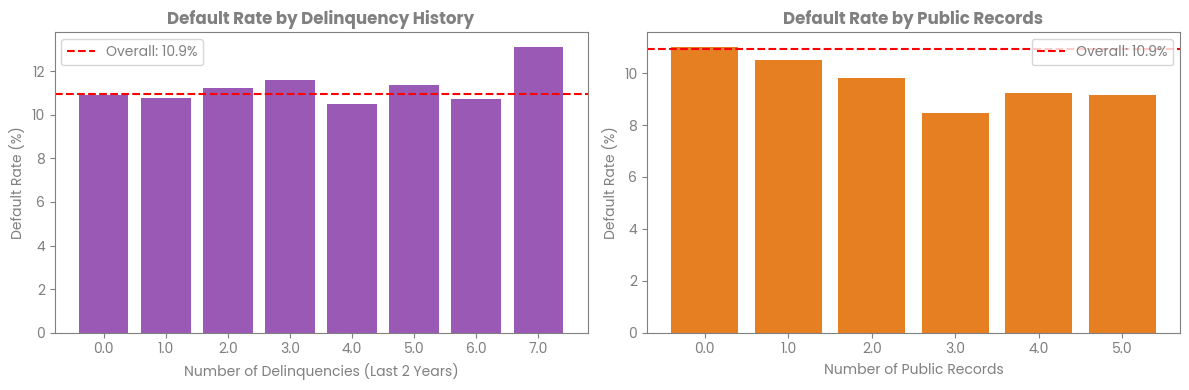

In [ ]:
# DELINQUENCY HISTORY ANALYSIS
print("DELINQUENCY & PUBLIC RECORDS ANALYSIS")

# Delinquencies in last 2 years
delinq_default = df_risk.groupby('delinq_2yrs').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean')
).round(4)

print("\nDefault Rate by Delinquencies:")
print(delinq_default)
print()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Delinquencies
delinq_plot = delinq_default[delinq_default['total_loans'] >= 50].head(8)
axes[0].bar(delinq_plot.index.astype(str), delinq_plot['default_rate']*100, color='#9b59b6', linewidth=1)
axes[0].set_xlabel('Number of Delinquencies (Last 2 Years)')
axes[0].set_ylabel('Default Rate (%)')
axes[0].set_title('Default Rate by Delinquency History', fontweight='bold')
axes[0].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[0].legend()

# Public records
pub_rec_default = df_risk.groupby('pub_rec').agg(
    total_loans=('is_default', 'count'),
    default_rate=('is_default', 'mean')
).round(4)
pub_rec_plot = pub_rec_default[pub_rec_default['total_loans'] >= 50].head(6)

axes[1].bar(pub_rec_plot.index.astype(str), pub_rec_plot['default_rate']*100, color='#e67e22', linewidth=1)
axes[1].set_xlabel('Number of Public Records')
axes[1].set_ylabel('Default Rate (%)')
axes[1].set_title('Default Rate by Public Records', fontweight='bold')
axes[1].axhline(y=df_risk['is_default'].mean()*100, color='red', linestyle='--', label=f'Overall: {df_risk["is_default"].mean()*100:.1f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

#### **Top Risk Factors**

* **Loan Grade** - Strongest predictor with Grade G (27.8% default) 7x riskier than Grade A (3.9%). Sub-grade G1 highest at 29.6%, showing accurate grading system but pricing premium needs review.

* **Interest Rate** - Highest correlation (0.176) with default. Rate > 20% yields 22.3% default vs < 8% only 3.4% (6.5x gap). High rates can be both cause & effect: risky borrowers get high rates, which then increases payment burden.

* **Loan Term** - 60-month loans default 48% higher than 36-month (14.3% vs 9.7%). Longer exposure increases risk window and uncertainty.

* **Income Level** - Clear inverse relationship: < 30K defaults at 14.7% vs > 150K only 7.1%. Each bracket increase reduces risk by 2-3%.

#### **High-Risk Segments**

* **Purpose with Highest Default:** - Small business (21.3%) - 2x average, vulnerable to market fluctuations

* **Geographic Risk:**
- **Highest**: Nevada (13.6%), Hawaii (12.7%), Florida (12.5%) - 20-25% above average

#### **Borrower Profile: Defaulter vs Non-Defaulter**

| Metric | Non-Defaulter | Defaulter | Difference |
|--------|---------------|-----------|-----------|
| **Interest Rate** | 13.5% | 16.0% | **+18%**  |
| **Annual Income** | $74K | $65K | **-12%**  |
| **DTI Ratio** | 17.1 | 18.4 | **+7.5%** |
| **Inquiries (6mo)** | 0.76 | 0.98 | **+29%**  |
| **Revol Utilization** | 55.7% | 59.7% | **+7%** |

**Key Pattern**: Defaulters have lower income but take loans with higher rates and higher DTI.

#### **Strategic Insights & Recommendations**

- Limit Grade F-G exposure or increase pricing +3-5% to cover risk
- Stricter criteria for 60-month loans - default rate 48% higher
- Flag small business loans - need additional screening (21% default vs 11% avg)
- Review DTI > 25% + Income < 50K - high-risk combination
- Limit exposure in NV, HI, FL - default 20-25% above average
- Additional underwriting for educational & renewable energy loans
- Prioritize credit card refinancing & car loans - lowest default rates
- Expand Grade A-B with 36-month term - default < 8%
- Target borrowers: mortgage holders + income > 75K - stable segment
- Strict income verification for < 50K with loan > 15K
- Dynamic pricing model for Grade E-G
- Purpose-based criteria for high-risk loan types
- Geographic concentration limits


### **2.5. Performance Metrics**

PAYMENT BEHAVIOR

Payment Summary by Loan Status:


loan_amnt total_pymnt  \
                                                         mean        mean   
loan_status                                                                 
Charged Off                                          14518.76     6657.34   
Current                                              15177.37     9591.12   
Default                                              15284.89     7782.17   
Does not meet the credit policy. Status:Charged Off   9527.23     4803.72   
Does not meet the credit policy. Status:Fully Paid    8853.23    10536.21   
Fully Paid                                           13214.39    15209.87   
In Grace Period                                      16128.29    10585.89   
Late (16-30 days)                                    15800.78    10004.61   
Late (31-120 days)                                   15553.76     8909.86   

                                                    payment_ratio profit_loss  \
                                                             mean        mean   
loan_status                                                                     
Charged Off                                                 46.83    -7861.42   
Current                                                     65.00    -5586.25   
Default                                                     52.15    -7502.71   
Does not meet the credit policy. Status:Charged Off         51.81    -4723.52   
Does not meet the credit policy. Status:Fully Paid         118.92     1682.98   
Fully Paid                                                 114.61     1995.48   
In Grace Period                                             67.20    -5542.40   
Late (16-30 days)                                           64.26    -5796.17   
Late (31-120 days)                                          58.50    -6643.90   

                                                                   
                                                              sum  
loan_status                                                        
Charged Off                                         -3.339138e+08  
Current                                             -1.252582e+09  
Default                                             -6.242256e+06  
Does not meet the credit policy. Status:Charged Off -3.594596e+06  
Does not meet the credit policy. Status:Fully Paid   3.345760e+06  
Fully Paid                                           3.686426e+08  
In Grace Period                                     -1.743638e+07  
Late (16-30 days)                                   -7.059731e+06  
Late (31-120 days)                                  -4.584291e+07


Portfolio Summary
- Total Funded: $6,675,931,775.00
- Total Received: $5,381,248,873.89
- Net Profit/Loss: $-1,294,682,901.11
- Overall ROI: -19.39%



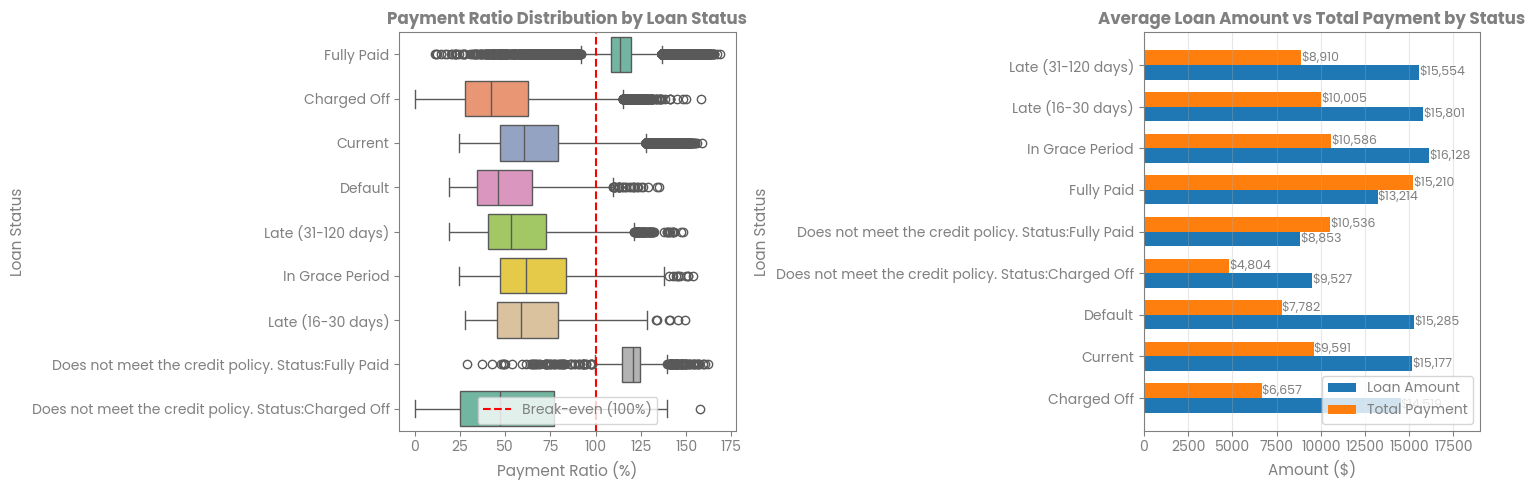

In [ ]:
# Payment Behavior: Total Payment vs Loan Amount
print("PAYMENT BEHAVIOR")

# Calculate payment ratio
df['payment_ratio'] = (df['total_pymnt'] / df['loan_amnt']) * 100
df['profit_loss'] = df['total_pymnt'] - df['loan_amnt']

# Summary statistics by loan status
payment_summary = df.groupby('loan_status').agg({
    'loan_amnt': 'mean',
    'total_pymnt': 'mean',
    'payment_ratio': 'mean',
    'profit_loss': ['mean', 'sum']
}).round(2)

print("\nPayment Summary by Loan Status:")
display(payment_summary)

# Calculate portfolio-level metrics
total_funded = df['loan_amnt'].sum()
total_received = df['total_pymnt'].sum()
net_profit = total_received - total_funded

print(f"\n{'Portfolio Summary':}")
print(f"- Total Funded: ${total_funded:,.2f}")
print(f"- Total Received: ${total_received:,.2f}")
print(f"- Net Profit/Loss: ${net_profit:,.2f}")
print(f"- Overall ROI: {(net_profit/total_funded)*100:.2f}%\n")

# Visualization: Payment Ratio Distribution by Loan Status (Horizontal)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Boxplot payment ratio by status (horizontal)
df_plot = df[df['payment_ratio'] <= 200]
sns.boxplot(data=df_plot, y='loan_status', x='payment_ratio', ax=axes[0], palette='Set2', orient='h')
axes[0].axvline(x=100, color='red', linestyle='--', linewidth=1.5, label='Break-even (100%)')
axes[0].set_title('Payment Ratio Distribution by Loan Status', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Payment Ratio (%)', fontsize=11)
axes[0].set_ylabel('Loan Status', fontsize=11)
axes[0].legend()

# Plot 2: Mean Payment vs Loan Amount (horizontal bars)
payment_comp = df.groupby('loan_status')[['loan_amnt', 'total_pymnt']].mean().reset_index()
y = np.arange(len(payment_comp))
height = 0.35

bars1 = axes[1].barh(y - height/2, payment_comp['loan_amnt'], height, label='Loan Amount')
bars2 = axes[1].barh(y + height/2, payment_comp['total_pymnt'], height, label='Total Payment')

axes[1].set_title('Average Loan Amount vs Total Payment by Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Loan Status', fontsize=11)
axes[1].set_xlabel('Amount ($)', fontsize=11)
axes[1].set_yticks(y)
axes[1].set_yticklabels(payment_comp['loan_status'])
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)
axes[1].set_xlim(0, 19_000)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        width_val = bar.get_width()
        axes[1].text(width_val, bar.get_y() + bar.get_height()/2., f'${width_val:,.0f}', va='center', ha='left', fontsize=9, color='#808080')

plt.tight_layout()
plt.show()

PORTFOLIO ROI ANALYSIS

ROI by GRADE:
        loan_amnt   total_pymnt   profit_loss  roi_pct
grade                                                 
B      1796514200  1.523161e+09 -2.733532e+08   -15.22
A      1003169825  8.253452e+08 -1.778247e+08   -17.73
F       243854875  1.996215e+08 -4.423334e+07   -18.14
G        68469050  5.494682e+07 -1.352223e+07   -19.75
C      1778854175  1.404783e+09 -3.740715e+08   -21.03
E       626974075  4.842444e+08 -1.427297e+08   -22.76
D      1158095575  8.891473e+08 -2.689483e+08   -23.22


ROI by TERM:
            loan_amnt   total_pymnt   profit_loss  roi_pct
term                                                      
36 months  4126074275  3.599104e+09 -5.269701e+08   -12.77
60 months  2549857500  1.782145e+09 -7.677128e+08   -30.11


ROI by PURPOSE:
                  loan_amnt   total_pymnt  profit_loss  roi_pct
purpose                                                        
wedding            24534575  2.625028e+07   1715705.73     6.99
educat

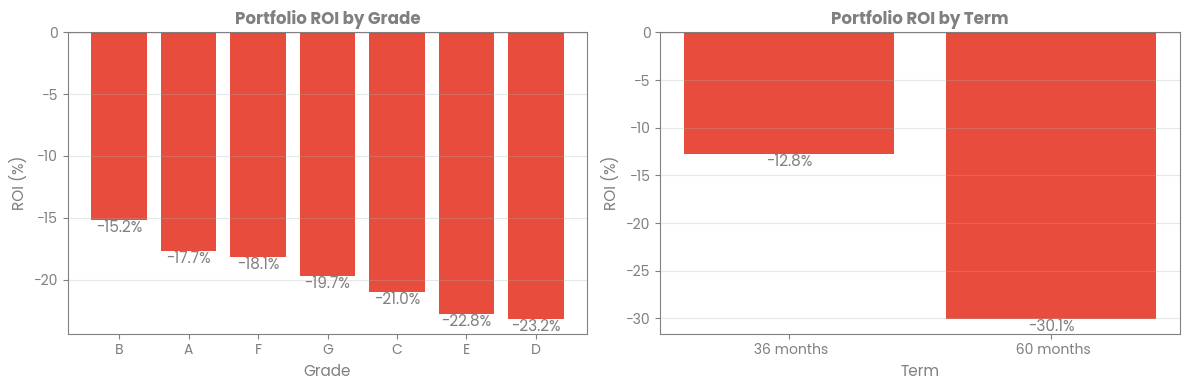

In [ ]:
# Portfolio ROI by Segments
print("PORTFOLIO ROI ANALYSIS")

# ROI by different segments
segments = ['grade', 'term', 'purpose', 'home_ownership']

for segment in segments:
    if segment in df.columns:
        roi_analysis = df.groupby(segment).agg({
            'loan_amnt': 'sum',
            'total_pymnt': 'sum',
            'profit_loss': 'sum'
        })
        roi_analysis['roi_pct'] = (roi_analysis['profit_loss'] / roi_analysis['loan_amnt']) * 100
        roi_analysis = roi_analysis.sort_values('roi_pct', ascending=False).head(10)

        print(f"\nROI by {segment.upper()}:")
        print(roi_analysis.round(2))
        print()

# Visualization: ROI by Grade and Term
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ROI by Grade
roi_grade = df.groupby('grade').agg({
    'loan_amnt': 'sum',
    'total_pymnt': 'sum'
})
roi_grade['roi_pct'] = ((roi_grade['total_pymnt'] - roi_grade['loan_amnt']) / roi_grade['loan_amnt']) * 100
roi_grade = roi_grade.sort_values('roi_pct', ascending=False)

colors = ['#27ae60' if x > 0 else '#e74c3c' for x in roi_grade['roi_pct']]
bars = axes[0].bar(roi_grade.index, roi_grade['roi_pct'], color=colors)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0].set_title('Portfolio ROI by Grade', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Grade', fontsize=11)
axes[0].set_ylabel('ROI (%)', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=11, color='#808080')

# ROI by Term
roi_term = df.groupby('term').agg({
    'loan_amnt': 'sum',
    'total_pymnt': 'sum'
})
roi_term['roi_pct'] = ((roi_term['total_pymnt'] - roi_term['loan_amnt']) / roi_term['loan_amnt']) * 100

colors = ['#27ae60' if x > 0 else '#e74c3c' for x in roi_term['roi_pct']]
bars = axes[1].bar(range(len(roi_term)), roi_term['roi_pct'], color=colors)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_title('Portfolio ROI by Term', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Term', fontsize=11)
axes[1].set_ylabel('ROI (%)', fontsize=11)
axes[1].set_xticks(range(len(roi_term)))
axes[1].set_xticklabels(roi_term.index)
axes[1].grid(axis='y', alpha=0.3)

for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom' if height > 0 else 'top', fontsize=11, color='#808080')

plt.tight_layout()
plt.show()

TIME-BASED PERFORMANCE

Yearly Performance:
            Total_Funded  Loan_Count  Total_Received    Net_Profit    ROI_pct
issue_year                                                                   
2007             4977475         603    4.721977e+06 -2.554981e+05  -5.133088
2008            21119250        2393    2.033502e+07 -7.842294e+05  -3.713339
2009            51928250        5281    5.592299e+07  3.994740e+06   7.692807
2010           131992550       12537    1.407670e+08  8.774418e+06   6.647662
2011           261683825       21721    2.836283e+08  2.194444e+07   8.385859
2012           718411025       53367    7.728728e+08  5.446173e+07   7.580859
2013          1981989225      134755    1.875260e+09 -1.067294e+08  -5.384965
2014          3503830175      235628    2.227741e+09 -1.276089e+09 -36.419832



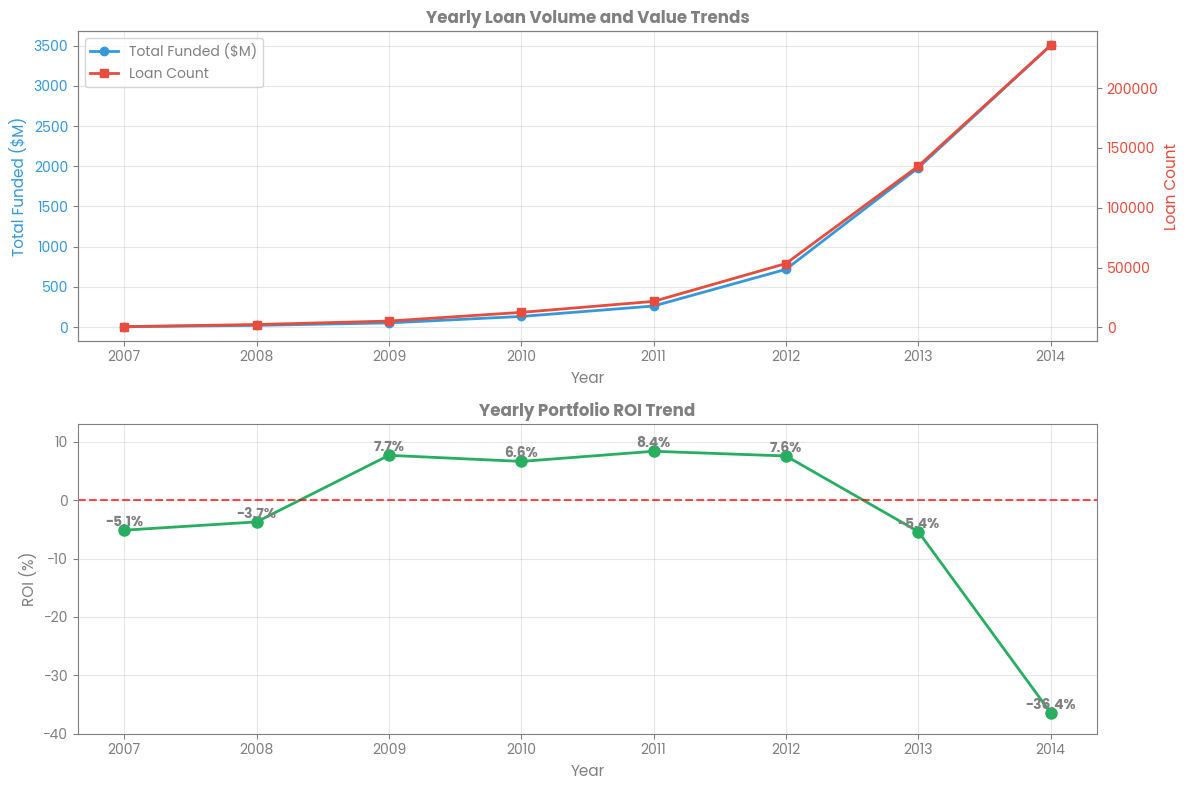

In [ ]:
# Time-based Performance
print("TIME-BASED PERFORMANCE")

# Convert issue_d to datetime
df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_year'] = df['issue_date'].dt.year
df['issue_quarter'] = df['issue_date'].dt.to_period('Q')

# Performance by year
yearly_perf = df.groupby('issue_year').agg({
    'loan_amnt': ['sum', 'count'],
    'total_pymnt': 'sum',
    'profit_loss': 'sum'
}).round(2)

yearly_perf.columns = ['Total_Funded', 'Loan_Count', 'Total_Received', 'Net_Profit']
yearly_perf['ROI_pct'] = (yearly_perf['Net_Profit'] / yearly_perf['Total_Funded']) * 100

print("\nYearly Performance:")
print(yearly_perf)
print()

# Visualization: Yearly trends
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot 1: Volume and Value trends
ax1 = axes[0]
ax2 = ax1.twinx()

line1 = ax1.plot(yearly_perf.index, yearly_perf['Total_Funded']/1e6, marker='o', linewidth=2, color='#3498db', label='Total Funded ($M)')
line2 = ax2.plot(yearly_perf.index, yearly_perf['Loan_Count'], marker='s', linewidth=2, color='#e74c3c', label='Loan Count')

ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Total Funded ($M)', fontsize=11, color='#3498db')
ax2.set_ylabel('Loan Count', fontsize=11, color='#e74c3c')
ax1.set_title('Yearly Loan Volume and Value Trends', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#3498db')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax1.grid(alpha=0.3)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Plot 2: ROI trends
axes[1].plot(yearly_perf.index, yearly_perf['ROI_pct'], marker='o', linewidth=2, color='#27ae60', markersize=8)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('ROI (%)', fontsize=11)
axes[1].set_ylim(-40, 13)
axes[1].set_title('Yearly Portfolio ROI Trend', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# Add value labels
for x, y in zip(yearly_perf.index, yearly_perf['ROI_pct']):
    axes[1].text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#808080')

plt.tight_layout()
plt.show()

#### **Payment Behavior by Status**

* **Fully Paid Loans** - Only profitable segment with 114.6% payment ratio (+\$369M profit). Represents healthy portfolio component.

* **Charged Off** - Worst performer with 46.8% recovery rate, losing \$7,861 per loan on average (-\$334M total). Major profit drain.

* **Current Loans** - Negative territory despite ongoing payments (65% ratio, -\$5,586 per loan). Indicates many will likely default before maturity.

* **Late Loans** - 31-120 days late showing 58.5% recovery with -\$6,644 average loss. Early intervention needed to prevent charge-offs.

**Key Finding**: Only 2 status categories (Fully Paid + Policy Exception Paid) generate profit. All others drain portfolio value.

#### **ROI by Risk Segments**

**Grade Performance:**
- Grade B least bad at -15.2% ROI despite highest volume (\$1.8B funded)
- Grade D worst at -23.2% ROI, Grade E at -22.8%
- Even Grade A losing -17.7% - indicates systemic underpricing across all grades
- Higher grades (A-B) show better relative performance but still unprofitable

**Loan Term Impact:**
- 36-month: -12.8% ROI (manageable loss)
- 60-month: -30.1% ROI (catastrophic)
- Long-term loans lose 2.4x more - extended exposure kills profitability

**Purpose Analysis:**
- Profitable: Wedding (+7.0%), Educational (+0.7%)
- Best Loss Minimization: House (-7.8%), Renewable Energy (-9.3%), Car (-10.2%)
- Worst: Medical (-15.5%), Other (-15.4%), Vacation (-14.4%), Small Business (-13.4%)
- Discretionary purposes perform worse than necessity-based loans

**Home Ownership:**
- NONE (+12.2%) and OTHER (+3.1%) surprisingly profitable but tiny volume
- Renters: -18.2% (large segment, moderate loss)
- Mortgage holders: -19.8% (largest segment at \$3.8B, heavy losses)
- Owners: -21.6% (worst performance, possible over-leverage)

#### **Time-Based Performance Trends**

**The 2013-2014 Collapse:**
- 2007-2012: Positive ROI ranging +6.6% to +8.4% (healthy portfolio)
- 2013: ROI dropped to -5.4% (warning sign)
- 2014: Catastrophic -36.4% ROI with -\$1.28B loss on \$3.5B funded
- 2014 alone accounts for 98% of total portfolio losses

**Volume vs Quality Trade-off:**
- Early years (2007-2012): Lower volume, positive returns
- 2013-2014: 5x volume increase, quality collapsed
- Aggressive growth without proper risk management destroyed profitability

#### **Strategic Insights & Recommendations**

- Stop 60-month term loans immediately, losing 30% ROI is unsustainable
- Reprice Grade D-G or exit segment, losses too severe to justify volume
- Focus on 36-month Grade A-C loans, still losing but manageable
- Investigate 2013-2014 underwriting changes, identify what caused quality collapse
- Expand wedding & educational loan products, only profitable purposes
- Limit small business, medical, vacation loans, consistent loss makers
- Target homeowners with caution, mortgage holders underperforming vs renters
- Implement stricter DTI limits for Current loans, many trending toward default
- Early intervention program for Late 16-30, prevent progression to charge-off
- Portfolio rebalancing: Shift from volume growth to profitability focus

### **2.6. Correlation Analysis**

In [ ]:
def cramers_v(x, y):
    tbl = pd.crosstab(x, y)
    chi2 = chi2_contingency(tbl)[0]
    n = tbl.sum().sum()
    k = min(tbl.shape) - 1
    return np.sqrt(chi2 / (n * k))

label_map = {'loan_amnt': 'Loan Amount', 'int_rate': 'Interest Rate', 'installment': 'Installment', 'annual_inc': 'Annual Income', 'dti': 'DTI', 'delinq_2yrs': 'Delinquency 2yrs', 'inq_last_6mths': 'Inquiries 6mo', 'open_acc': 'Open Accounts', 'pub_rec': 'Public Records', 'revol_bal': 'Revolving Balance', 'revol_util': 'Revolving Util', 'total_acc': 'Total Accounts', 'credit_history_years': 'Credit History', 'grade': 'Grade', 'sub_grade': 'Subgrade', 'emp_length': 'Employment Length', 'home_ownership': 'Home Ownership', 'verification_status': 'Verification', 'purpose': 'Purpose', 'term': 'Term'}
num_feats = ['loan_amnt','int_rate','installment','annual_inc','dti', 'delinq_2yrs','inq_last_6mths','open_acc','pub_rec', 'revol_bal','revol_util','total_acc','credit_history_years']
cat_feats = ['grade','sub_grade','emp_length','home_ownership', 'verification_status','purpose','term']

num_res = {}
for f in num_feats:
    if f in df_risk.columns:
        num_res[f] = df_risk[f].corr(df_risk['is_default'])

cat_res = {}
for f in cat_feats:
    if f in df_risk.columns:
        tmp = df_risk[[f, 'is_default']].dropna()
        if len(tmp):
            cat_res[f] = cramers_v(tmp[f], tmp['is_default'])

all_res = {}
for k, v in num_res.items():
    all_res[k + ' num'] = v
for k, v in cat_res.items():
    all_res[k + ' cat'] = v

all_res = {k: v for k, v in all_res.items() if not pd.isna(v)}
all_res = dict(sorted(all_res.items(), key=lambda x: abs(x[1]), reverse=False))

{'delinq_2yrs num': np.float64(0.0021730870293151603), 'open_acc num': np.float64(-0.0051321977361784375), 'pub_rec num': np.float64(-0.0089029706351914), 'loan_amnt num': np.float64(0.01443267951817258), 'installment num': np.float64(0.016438066768350166), 'revol_bal num': np.float64(-0.02093071107593183), 'emp_length cat': np.float64(0.021171468948658713), 'total_acc num': np.float64(-0.022447408240037818), 'credit_history_years num': np.float64(-0.045414927140034804), 'home_ownership cat': np.float64(0.04651686783104866), 'verification_status cat': np.float64(0.048014130259016685), 'annual_inc num': np.float64(-0.05036144603580176), 'dti num': np.float64(0.050645469201819844), 'revol_util num': np.float64(0.05183421927930353), 'purpose cat': np.float64(0.061341386789536316), 'inq_last_6mths num': np.float64(0.06532998977087222), 'term cat': np.float64(0.06599766292345155), 'grade cat': np.float64(0.16653898132712602), 'sub_grade cat': np.float64(0.1709094884840149), 'int_rate num': 

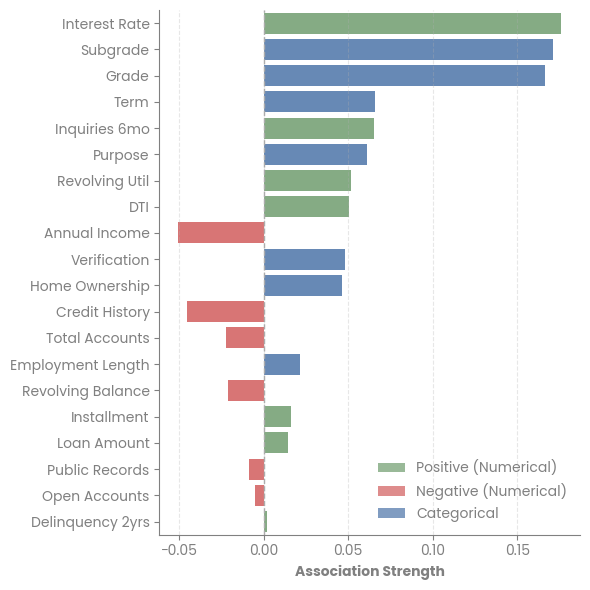

In [ ]:
keys = list(all_res.keys())
vals = list(all_res.values())
y_pos = np.arange(len(keys))

colors = []
for f, v in zip(keys, vals):
    if f.endswith('cat'):
        colors.append('#023a85')
    elif v > 0:
        colors.append('#347433')
    else:
        colors.append('#BF1A1A')

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.barh(y_pos, vals, color=colors, alpha=0.6)

ax.set_yticks(y_pos)
ax.set_yticklabels([label_map[f.replace(' num','').replace(' cat','')] for f in keys])
ax.set_xlabel('Association Strength', fontweight='bold')
ax.axvline(0, linestyle='--', color='#acacac', linewidth=1)
ax.grid(axis='x', linestyle='--', alpha=0.3)

legend_items = [ Patch(facecolor='#347433', alpha=0.5, label='Positive (Numerical)'), Patch(facecolor='#BF1A1A', alpha=0.5, label='Negative (Numerical)'), Patch(facecolor='#023a85', alpha=0.5, label='Categorical')]
ax.legend(handles=legend_items, frameon=False, loc='lower right')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(-0.5, len(keys) - 0.5)

plt.tight_layout()
plt.show()

#### **Top Predictors (Correlation > 0.15)**

- int_rate (0.176) - Strongest predictor, validates risk-based pricing
- sub_grade (0.171) - Granular risk classification
- grade (0.167) - Primary risk segmentation

**Key Finding**: Interest rate and grading system are most predictive. All show weak-to-moderate linear correlation (< 0.18), suggesting non-linear relationships.

#### **Moderate Predictors (0.05-0.15)**

**Positive Correlations (Higher = More Risk):**
- term (0.066) - longer terms riskier
- inq_last_6mths (0.065) - credit shopping signals distress
- purpose (0.061) - loan purpose matters
- revol_util (0.052) - high utilization = financial stress
- dti (0.051) - debt burden

**Negative Correlations (Higher = Less Risk):**
- annual_inc (-0.050) - higher income protective
- credit_history_years (-0.045) - longer history safer

#### **Surprising Weak Correlations**

- delinq_2yrs (0.002) - past delinquency barely predicts default
- pub_rec (-0.009) - negative correlation is counterintuitive
- loan_amnt (0.014) - loan size doesn't drive risk much
- emp_length (0.021) - employment tenure minimal impact

These suggest non-linear relationships.